In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from netCDF4 import Dataset
from netCDF4 import num2date
from mpl_toolkits.basemap import Basemap
import mpl_toolkits.basemap as basemap
import getpass
import gsw

# Benguela

## Leer datos crudos (ARGO)

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/ARGO/Benguela/Core/'

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/ARGO/Benguela/Core


In [ ]:
import datetime as dt
ds_final=pd.read_csv('df_T_S_final.csv',sep=',')
ds_final['Fecha']=pd.to_datetime(ds_final['Fecha'])
ds_final['Year']= ds_final['Fecha'].dt.year
ds_final['Month']= ds_final['Fecha'].dt.month
ds_final['Day']= ds_final['Fecha'].dt.day
print(ds_final.shape)
ds_final.head()

(4254725, 19)


Fecha     Lon     Lat  Pres  Pres_Adj       Temp   Temp_Adj  \
0 2002-05-13 04:26:31  14.162 -31.226  10.0      10.0  19.056000  19.056000   
1 2002-05-13 04:26:31  14.162 -31.226  20.0      20.0  19.007999  19.007999   
2 2002-05-13 04:26:31  14.162 -31.226  30.0      30.0  19.002001  19.002001   
3 2002-05-13 04:26:31  14.162 -31.226  40.0      40.0  18.996000  18.996000   
4 2002-05-13 04:26:31  14.162 -31.226  50.0      50.0  18.990000  18.990000   

         Sal    Sal_Adj  Ciclo       Id  time_x  Lon_x  Lat_x  Cyc_x  Id_x  \
0  35.703999  35.704460      1  5900134     NaN    NaN    NaN    NaN   NaN   
1  35.706001  35.706120      1  5900134     NaN    NaN    NaN    NaN   NaN   
2  35.708000  35.708099      1  5900134     NaN    NaN    NaN    NaN   NaN   
3  35.703999  35.704124      1  5900134     NaN    NaN    NaN    NaN   NaN   
4  35.706001  35.706116      1  5900134     NaN    NaN    NaN    NaN   NaN   

   Year  Month  Day  
0  2002      5   13  
1  2002      5   13  
2  2002      5   13  
3  2002      5   13  
4  2002      5   13

In [ ]:
print(ds_final.shape)
df_perfil= ds_final[['Fecha','Lon','Lat','Ciclo','Month']]
df_perfil = df_perfil.drop_duplicates(subset = ['Fecha','Lon','Lat','Ciclo','Month'])
print(df_perfil.shape)
df_perfil.head()

(4254725, 19)
(20555, 5)


Fecha     Lon        Lat  Ciclo  Month
0   2002-05-13 04:26:31  14.162 -31.226000      1      5
19  2002-05-23 05:32:30  13.777 -30.617001      2      5
50  2002-06-02 05:01:06  13.338 -29.870001      3      6
84  2002-06-12 06:06:35  13.683 -29.656000      4      6
118 2002-06-22 05:34:55  14.230 -29.997000      5      6

In [ ]:
for i in range(4):
  if i==0: # DJF
    mes= df_perfil[(df_perfil.Month == 12)|(df_perfil.Month == 1)|(df_perfil.Month == 2)]
    print('DJF: ', len(mes.Ciclo.unique()))
  elif i ==1: # MAM
    mes= df_perfil[(df_perfil.Month == 3)|(df_perfil.Month == 4)|(df_perfil.Month == 5)]
    print('MAM: ', len(mes.Ciclo.unique()))
  elif i ==2: # JJA
    mes= df_perfil[(df_perfil.Month == 6)|(df_perfil.Month == 7)|(df_perfil.Month == 8)]
    print('JJA: ', len(mes.Ciclo.unique()))
  else: # SON
    mes= df_perfil[(df_perfil.Month == 9)|(df_perfil.Month == 10)|(df_perfil.Month == 11)]
    print('SON: ', len(mes.Ciclo.unique()))

DJF:  329
MAM:  308
JJA:  297
SON:  298


In [ ]:
# Conteos por mes
for i in range(1,13,1):
  mes= df_perfil[df_perfil.Month == i]
  print('Mes: ',i, len(mes.Ciclo.unique()))

Mes:  1 266
Mes:  2 246
Mes:  3 255
Mes:  4 248
Mes:  5 246
Mes:  6 245
Mes:  7 251
Mes:  8 252
Mes:  9 257
Mes:  10 260
Mes:  11 265
Mes:  12 266


## Leer datos Producto reanalisis

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_VALIDACION_MLD/Benguela/'
reanal=xr.open_dataset('GLOBAL_REANALYSIS_PHY_MLD.nc')#.groupby("time.season").mean()
reanal=reanal.rename({'longitude': 'lon','latitude': 'lat'})
reanal

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_VALIDACION_MLD/Benguela


<xarray.Dataset>
Dimensions:  (lon: 81, lat: 121, depth: 40, month: 12)
Coordinates:
  * lon      (lon) float32 5.0 5.25 5.5 5.75 6.0 ... 24.0 24.25 24.5 24.75 25.0
  * lat      (lat) float32 -40.0 -39.75 -39.5 -39.25 ... -10.5 -10.25 -10.0
  * depth    (depth) float32 0.5058 1.556 2.668 3.856 ... 411.8 457.6 508.6
  * month    (month) int32 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    SA       (month, depth, lat, lon) float64 ...
    CT       (month, depth, lat, lon) float64 ...
    D        (month, depth, lat, lon) float64 ...

**Filtro de 0 -600 dbar** (ARGO)

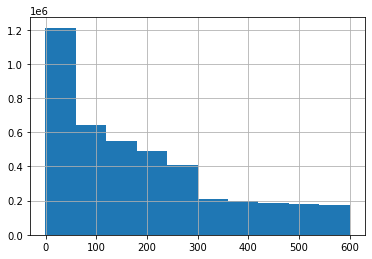

In [ ]:
ds_final = ds_final[ds_final['Pres_Adj']< 600]
ds_final.Pres_Adj.hist()

In [ ]:
# crear dataframes para cada mes a analizar, agrupar y sacar la media para evitar duplicados
lista_dfs=[]
for i in range(4): # 12
  if i ==0: # DJF
    mes_i= ds_final[(ds_final.Month ==12)|(ds_final.Month ==1)|(ds_final.Month ==2)]
    mes_i=mes_i[['Lon','Lat','Pres_Adj','Temp_Adj','Sal_Adj','Ciclo','Id']].groupby(by=['Lon','Lat','Ciclo','Pres_Adj','Id']).mean()
    mes_i=mes_i.reset_index()
    # Calculo de salinidad absoluta
    mes_i['SA']=gsw.SA_from_SP(SP=mes_i.Sal_Adj,p=mes_i.Pres_Adj, lon=mes_i.Lon,lat=mes_i.Lat)
    # Calculo Temperatura potencial
    mes_i['PT']=gsw.pt_from_t(SA=mes_i.SA.values, t= mes_i.Temp_Adj.values,p=mes_i.Pres_Adj.values,p_ref= 10.1325)
    # Calculo de Temperatura conservativa
    mes_i['CT']=gsw.CT_from_pt(SA= mes_i.SA,pt=mes_i.PT)
    # Calcular la densidad potencial
    mes_i['D']= gsw.density.rho(SA=mes_i.SA.values, CT=mes_i.CT.values,p= 10.25)-1000
    print('DJF: ', '- Dimension:',mes_i.shape)
    lista_dfs.append(mes_i)
  elif i ==1: # MAM
    mes_i= ds_final[(ds_final.Month ==3)|(ds_final.Month ==4)|(ds_final.Month ==5)]
    mes_i=mes_i[['Lon','Lat','Pres_Adj','Temp_Adj','Sal_Adj','Ciclo','Id']].groupby(by=['Lon','Lat','Ciclo','Pres_Adj','Id']).mean()
    mes_i=mes_i.reset_index()
    # Calculo de salinidad absoluta
    mes_i['SA']=gsw.SA_from_SP(SP=mes_i.Sal_Adj,p=mes_i.Pres_Adj, lon=mes_i.Lon,lat=mes_i.Lat)
    # Calculo Temperatura potencial
    mes_i['PT']=gsw.pt_from_t(SA=mes_i.SA.values, t= mes_i.Temp_Adj.values,p=mes_i.Pres_Adj.values,p_ref= 10.1325)
    # Calculo de Temperatura conservativa
    mes_i['CT']=gsw.CT_from_pt(SA= mes_i.SA,pt=mes_i.PT)
    # Calcular la densidad potencial
    mes_i['D']= gsw.density.rho(SA=mes_i.SA.values, CT=mes_i.CT.values,p= 10.25)-1000
    print('MAM: ', '- Dimension:',mes_i.shape)
    lista_dfs.append(mes_i)
  elif i ==2: # JJA
    mes_i= ds_final[(ds_final.Month ==6)|(ds_final.Month ==7)|(ds_final.Month ==8)]
    mes_i=mes_i[['Lon','Lat','Pres_Adj','Temp_Adj','Sal_Adj','Ciclo','Id']].groupby(by=['Lon','Lat','Ciclo','Pres_Adj','Id']).mean()
    mes_i=mes_i.reset_index()
    # Calculo de salinidad absoluta
    mes_i['SA']=gsw.SA_from_SP(SP=mes_i.Sal_Adj,p=mes_i.Pres_Adj, lon=mes_i.Lon,lat=mes_i.Lat)
    # Calculo Temperatura potencial
    mes_i['PT']=gsw.pt_from_t(SA=mes_i.SA.values, t= mes_i.Temp_Adj.values,p=mes_i.Pres_Adj.values,p_ref= 10.1325)
    # Calculo de Temperatura conservativa
    mes_i['CT']=gsw.CT_from_pt(SA= mes_i.SA,pt=mes_i.PT)
    # Calcular la densidad potencial
    mes_i['D']= gsw.density.rho(SA=mes_i.SA.values, CT=mes_i.CT.values,p= 10.25)-1000
    print('JJA: ', '- Dimension:',mes_i.shape)
    lista_dfs.append(mes_i)
  else: #SON
    mes_i= ds_final[(ds_final.Month ==9)|(ds_final.Month ==10)|(ds_final.Month ==11)]
    mes_i=mes_i[['Lon','Lat','Pres_Adj','Temp_Adj','Sal_Adj','Ciclo','Id']].groupby(by=['Lon','Lat','Ciclo','Pres_Adj','Id']).mean()
    mes_i=mes_i.reset_index()
    # Calculo de salinidad absoluta
    mes_i['SA']=gsw.SA_from_SP(SP=mes_i.Sal_Adj,p=mes_i.Pres_Adj, lon=mes_i.Lon,lat=mes_i.Lat)
    # Calculo Temperatura potencial
    mes_i['PT']=gsw.pt_from_t(SA=mes_i.SA.values, t= mes_i.Temp_Adj.values,p=mes_i.Pres_Adj.values,p_ref= 10.1325)
    # Calculo de Temperatura conservativa
    mes_i['CT']=gsw.CT_from_pt(SA= mes_i.SA,pt=mes_i.PT)
    # Calcular la densidad potencial
    mes_i['D']= gsw.density.rho(SA=mes_i.SA.values, CT=mes_i.CT.values,p= 10.25)-1000
    print('SON: ', '- Dimension:',mes_i.shape)
    lista_dfs.append(mes_i)
print(len(lista_dfs))

DJF:  - Dimension: (770537, 11)
MAM:  - Dimension: (702579, 11)
JJA:  - Dimension: (884544, 11)
SON:  - Dimension: (807738, 11)
4


In [ ]:
# Funcion para sacar el numero de perfiles por cada mes
import numpy as np
import matplotlib.pyplot as plt
def cantidad_perfiles_mes(data):
  x = data.Lon;y = data.Lat;
  # Creacion de la grilla
  gridx = np.arange(5,25+1,1) # valores de lon
  #print(gridx.shape);print(gridx);
  gridy = np.arange(-40,-10+1,1)
  #print(gridy.shape);print(gridy);
  grid, _, _ = np.histogram2d(x, y, bins=[gridx, gridy]);
  #print(grid.shape)
  # Ponerlo en el mismo sentido para que quede alineado con Chile
  grid1=np.flip(grid.T, axis=0) # Izquierda°-85W , derecha -70°W, arriba -15°S, abajo -45°S
  x1= np.arange(5+0.5, 25+0.5,1);y1= list(np.arange(-40+0.5,-10+0.5,1));y1=y1[::-1];y1= np.array(y1);
  #print(x1.shape);print(y1.shape)
  # Reemplazar 0 por nan
  grid1[grid1 == 0] = np.nan
  return grid1

In [ ]:
lista_conteos=[]
for i in range(len(lista_dfs)):
  lista_conteos.append(cantidad_perfiles_mes(lista_dfs[i]))

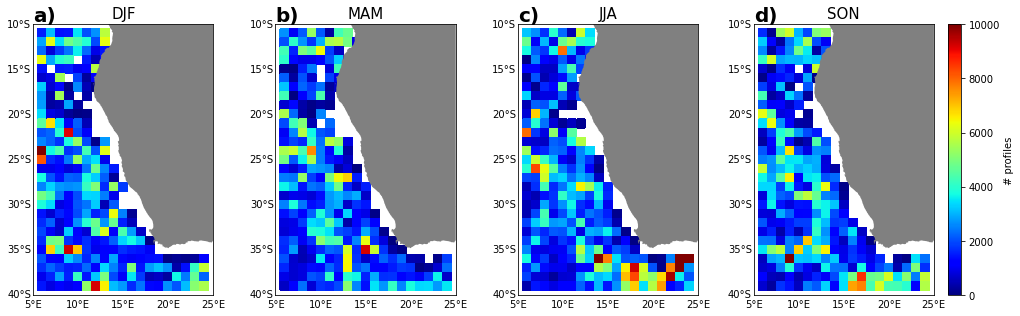

In [ ]:
import string
ticks= np.array([0,2000, 4000, 6000, 8000, 10000]) #labels para el colorbar
x1= np.arange(5+0.5, 25+0.5,1);y1= list(np.arange(-40+0.5,-10+0.5,1));y1=y1[::-1];y1= np.array(y1);
w=0.23;h=0.17
meses=['DJF','MAM','JJA','SON']
# atributos [left, bottom, width,height] en escala (0,1)
#list_o=[[0,0.9,w,h],[0.2,0.9,w,h],[0.4,0.9,w,h],[0.6,0.9,w,h],
#        [0,0.65,w,h],[0.2,0.65,w,h],[0.4,0.65,w,h],[0.6,0.65,w,h],
#        [0,0.4,w,h],[0.2,0.4,w,h],[0.4,0.4,w,h],[0.6,0.4,w,h],]
list_o =[[0,0.9,w,h],[0.2,0.9,w,h],[0.4,0.9,w,h],[0.6,0.9,w,h]]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
for i,j in zip(list_o,range(len(lista_conteos))):
  ax = plt.axes(i)
  ax.text(0.,1.01,string.ascii_lowercase[j]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=15)
  m=Basemap(projection='cyl',llcrnrlon=5,llcrnrlat=-40,urcrnrlon=25,urcrnrlat=-10, resolution ='h')
  x, y = m(x1, y1)
  z= lista_conteos[j]
  cmap= plt.get_cmap("jet")
  cs=m.pcolormesh(x1, y1, z,cmap='jet',shading='flat',latlon=True,vmin=0, vmax=10000)
  m.drawcoastlines(color='white',zorder=0)
  m.fillcontinents(color='grey',lake_color='grey')
  m.drawparallels(np.arange(-40,-9,5.),labels=[1,0,0,0],linewidth=0.0)
  m.drawmeridians([5,10,15,20,25],labels=[0,0,0,1],linewidth=0.0)
  if j in [3,7,11]:
    cbar=plt.colorbar(ticks=ticks)
    cbar.set_label('# profiles', rotation=90)

## Filtro si hay menos de 1000 perfiles

In [ ]:
lista_cont_fin=[]
for j in range(len(lista_conteos)):
  data= lista_conteos[j]
  data[data <1000]=np.nan
  lista_cont_fin.append(data)

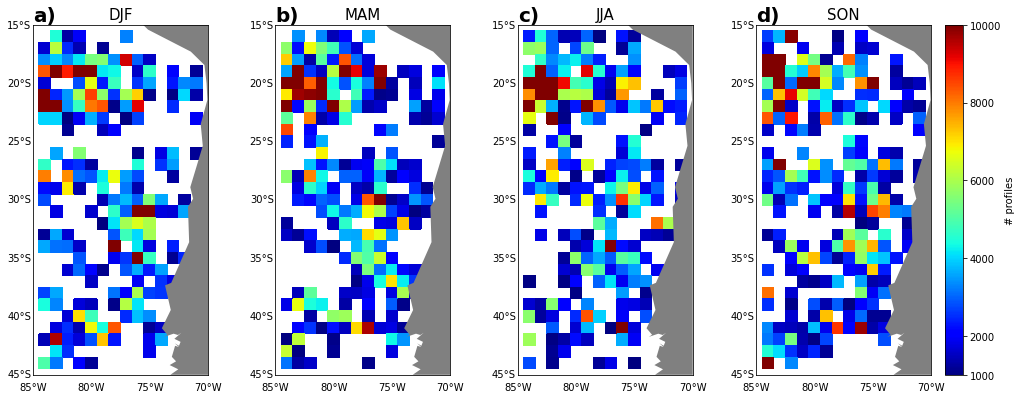

In [ ]:
import string
ticks= np.array([1000,2000, 4000, 6000, 8000, 10000]) #labels para el colorbar
x1= np.arange(-85+0.5, -70+0.5,1);y1= list(np.arange(-45+0.5,-15+0.5,1));y1=y1[::-1];y1= np.array(y1);
w=0.23;h=0.22
meses=['DJF','MAM','JJA','SON']
# atributos [left, bottom, width,height] en escala (0,1)
#list_o=[[0,0.9,w,h],[0.2,0.9,w,h],[0.4,0.9,w,h],[0.6,0.9,w,h],
#        [0,0.65,w,h],[0.2,0.65,w,h],[0.4,0.65,w,h],[0.6,0.65,w,h],
#        [0,0.4,w,h],[0.2,0.4,w,h],[0.4,0.4,w,h],[0.6,0.4,w,h],]
list_o =[[0,0.9,w,h],[0.2,0.9,w,h],[0.4,0.9,w,h],[0.6,0.9,w,h]]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
for i,j in zip(list_o,range(len(lista_conteos))):
  ax = plt.axes(i)
  ax.text(0.,1.01,string.ascii_lowercase[j]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=15)
  m=Basemap(projection='cyl',llcrnrlon=-85,llcrnrlat=-45,urcrnrlon=-70,urcrnrlat=-15, resolution ='c')
  x, y = m(x1, y1)
  z= lista_cont_fin[j]
  cmap= plt.get_cmap("jet")
  cs=m.pcolormesh(x1, y1, z,cmap='jet',shading='flat',latlon=True,vmin=1000, vmax=10000)
  m.drawcoastlines(color='white',zorder=0)
  m.fillcontinents(color='grey',lake_color='grey')
  m.drawparallels(np.arange(-45,-14,5.),labels=[1,0,0,0],linewidth=0.0)
  m.drawmeridians([-85,-80,-75,-70],labels=[0,0,0,1],linewidth=0.0)
  if j in [3,7,11]:
    cbar=plt.colorbar(ticks=ticks)
    cbar.set_label('# profiles', rotation=90)

In [ ]:
# filtro DJF
DJF_filter= np.isnan(lista_cont_fin[0])
MAM_filter= np.isnan(lista_cont_fin[1])
JJA_filter= np.isnan(lista_cont_fin[2])
SON_filter= np.isnan(lista_cont_fin[3])

## Ejemplo de prueba para un mes (Interpolacion vertical Akima)

------------------------------------
Id : 3900224
Ciclo 144 ......................... Check
Ciclo 146 ......................... Check
Ciclo 147 ......................... Check
Ciclo 111 ......................... Check
Ciclo 148 ......................... Check
Ciclo 150 ......................... Check
Ciclo 149 ......................... Check
Ciclo 110 ......................... Check
Ciclo 109 ......................... Check
Ciclo 32 ......................... Check
Ciclo 31 ......................... Check
Ciclo 33 ......................... Check
Ciclo 34 ......................... Check
Ciclo 108 ......................... Check
Ciclo 30 ......................... Check
Ciclo 29 ......................... Check
Ciclo 188 ......................... Check
Ciclo 35 ......................... Check
Ciclo 28 ......................... Check
Ciclo 187 ......................... Check
Ciclo 27 ......................... Check
Ciclo 107 ......................... Check
Ciclo 186 .........................

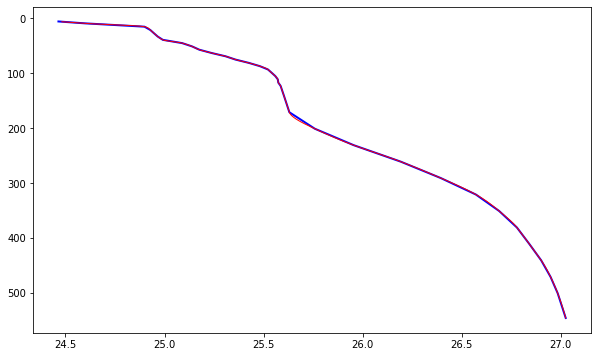

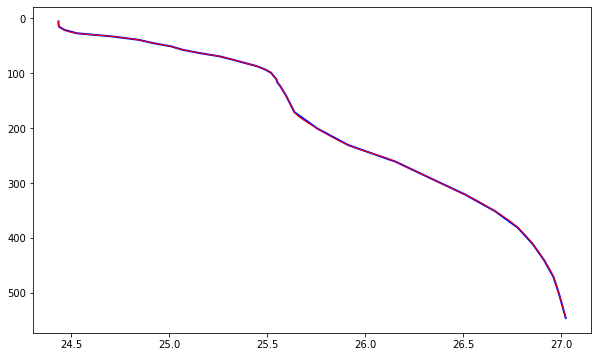

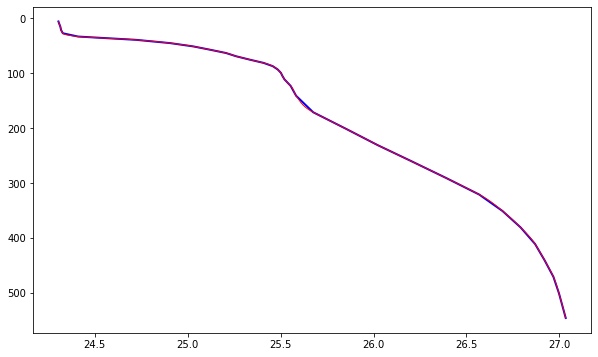

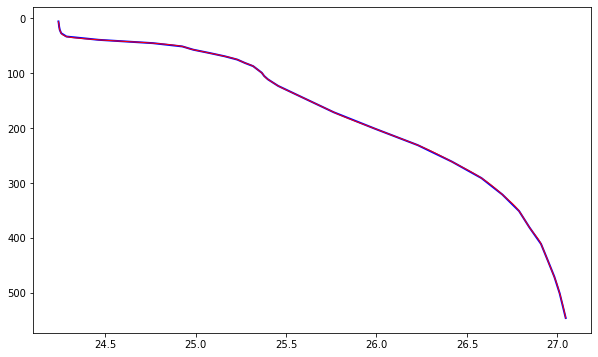

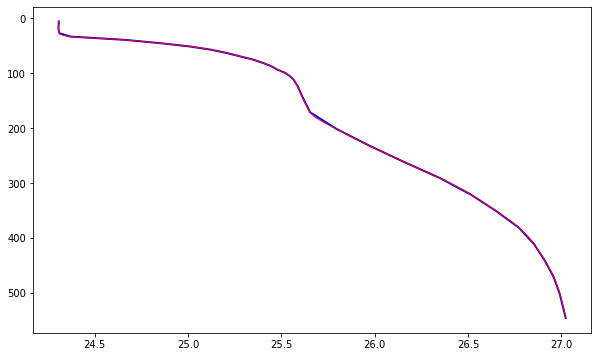

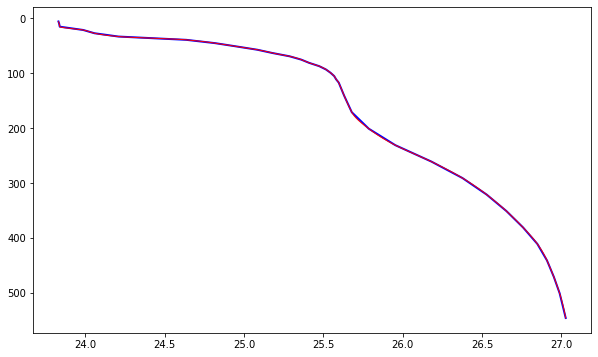

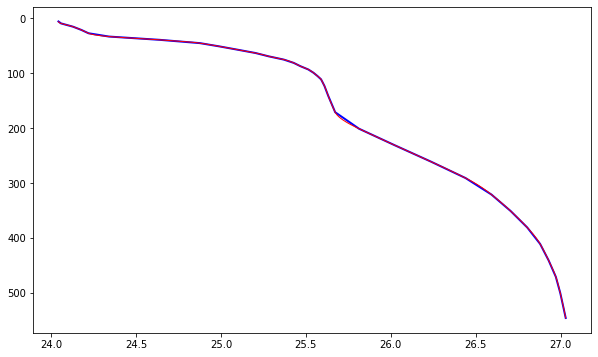

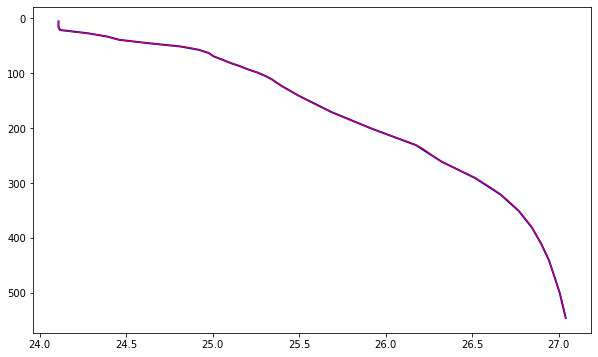

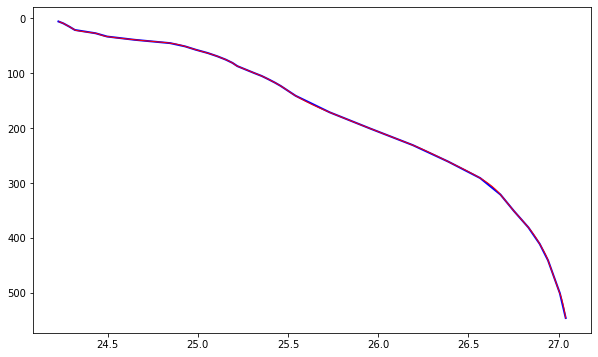

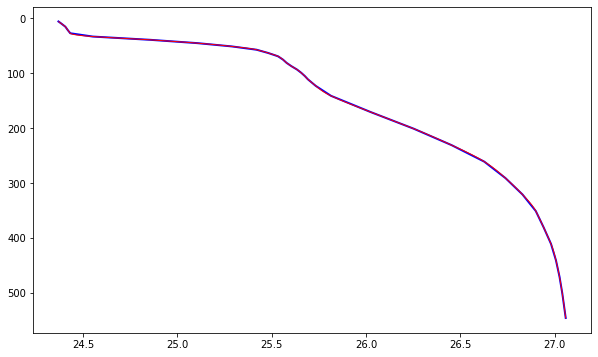

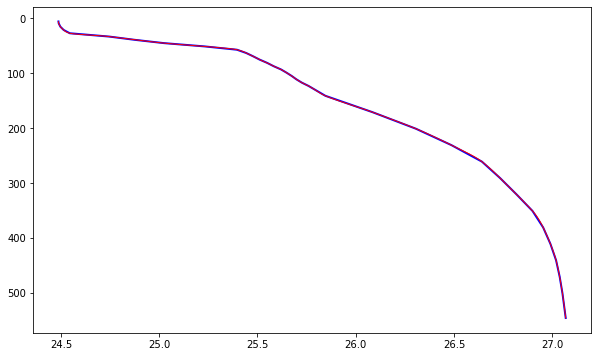

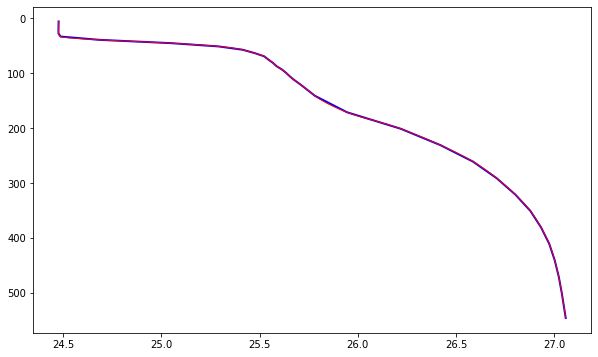

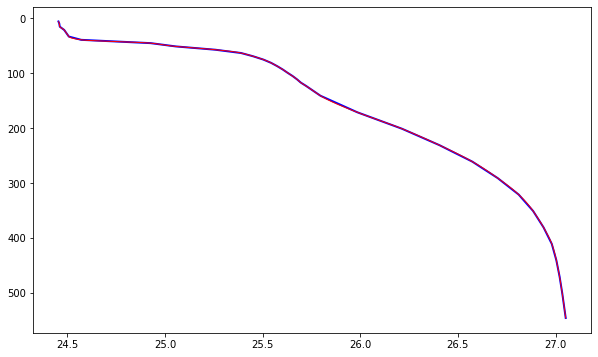

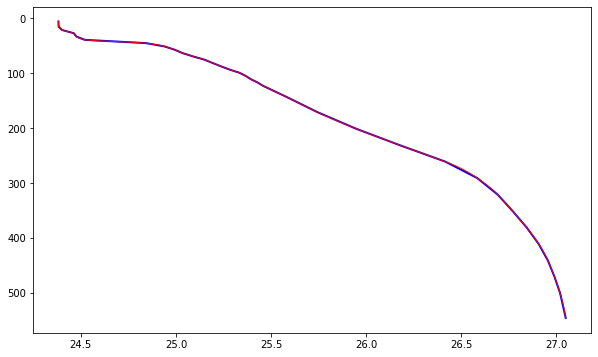

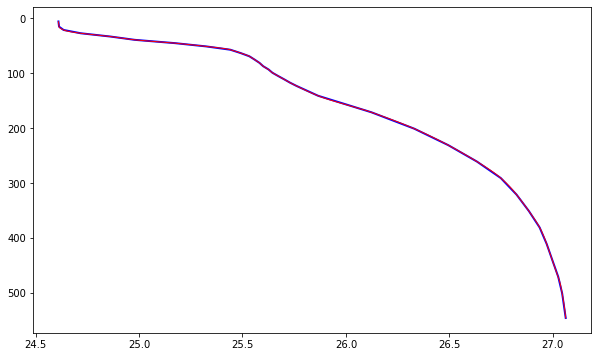

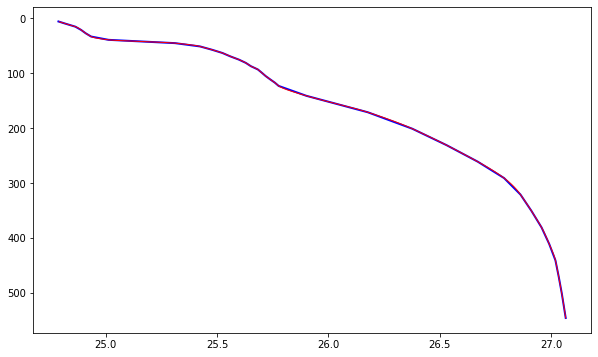

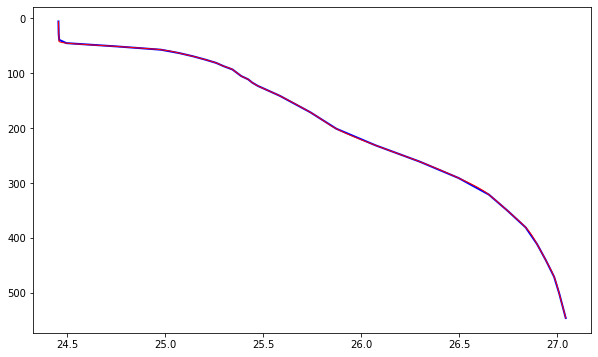

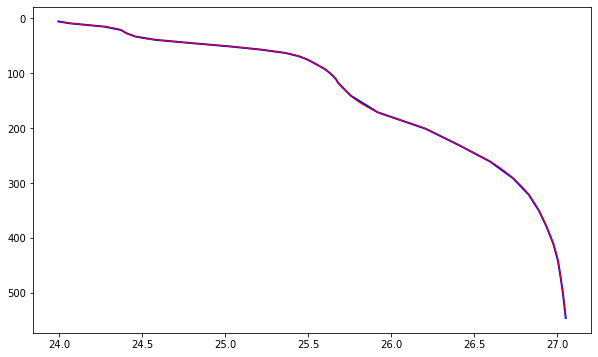

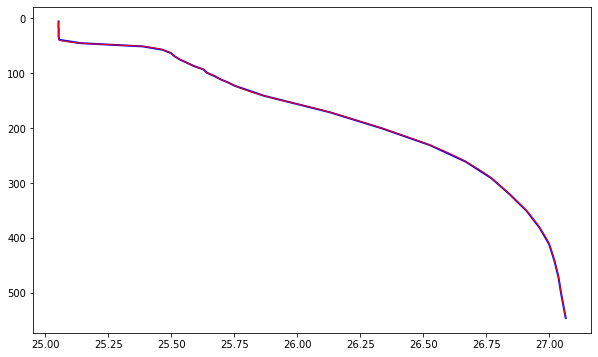

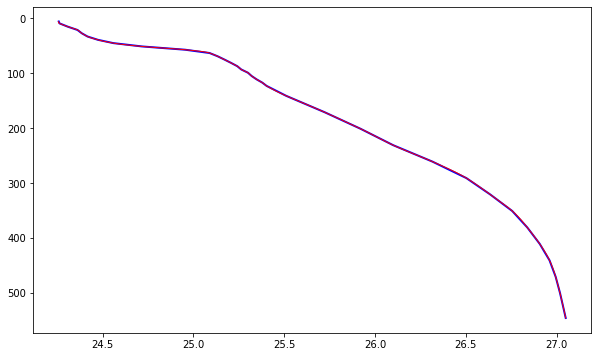

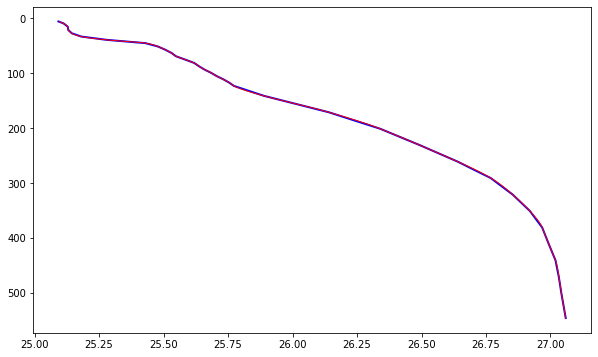

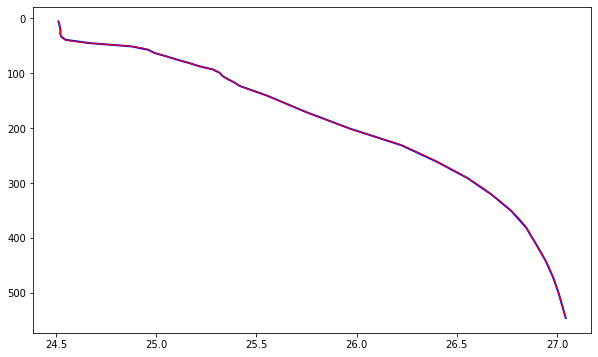

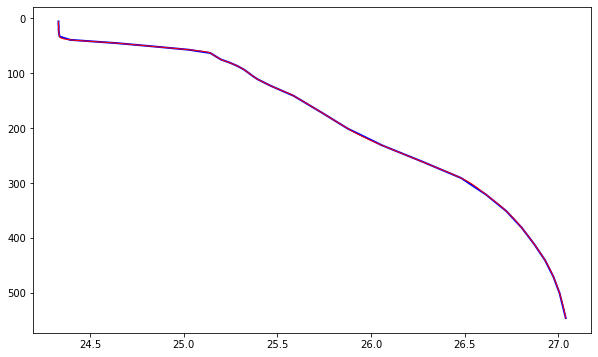

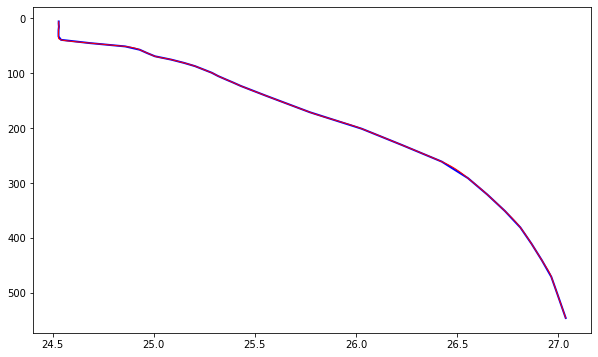

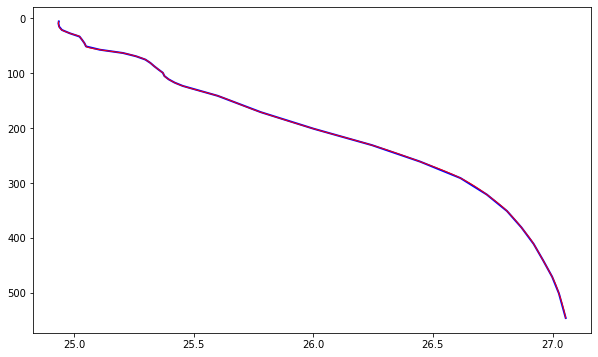

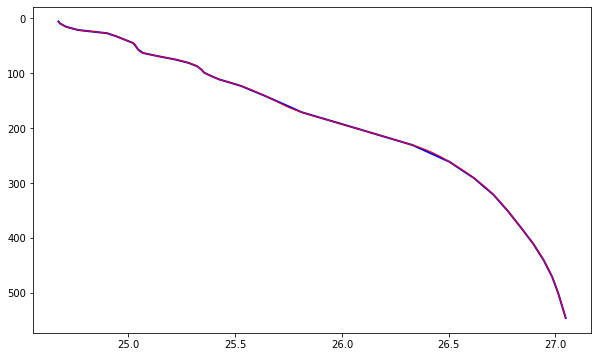

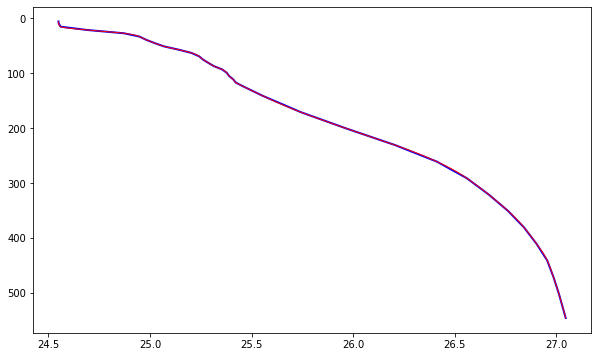

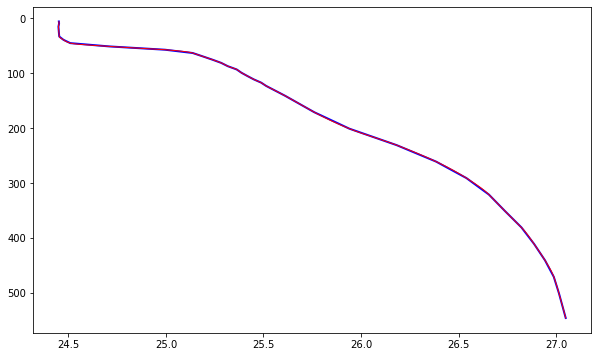

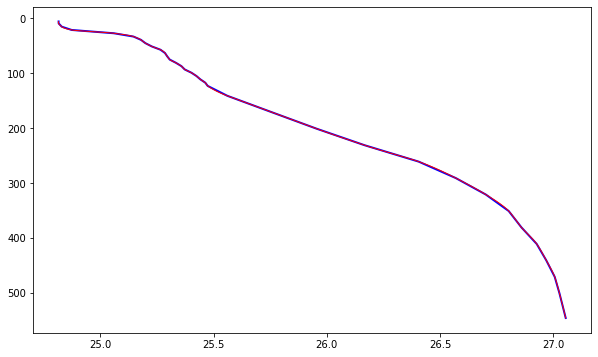

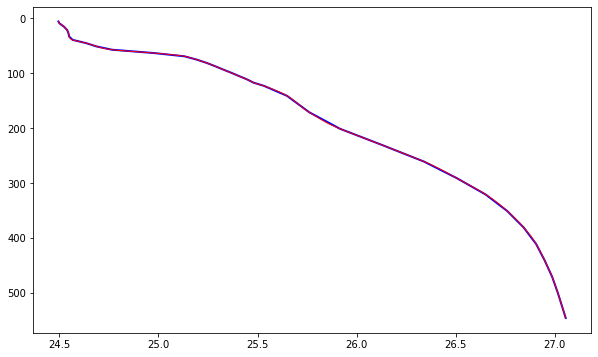

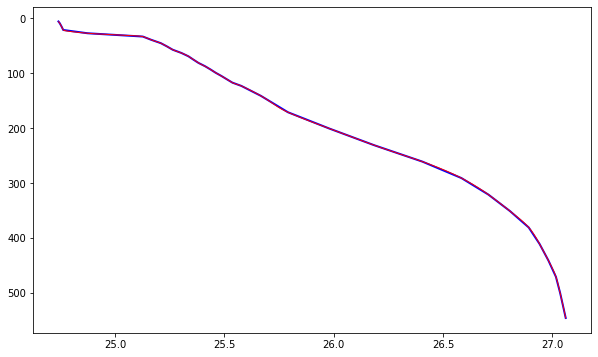

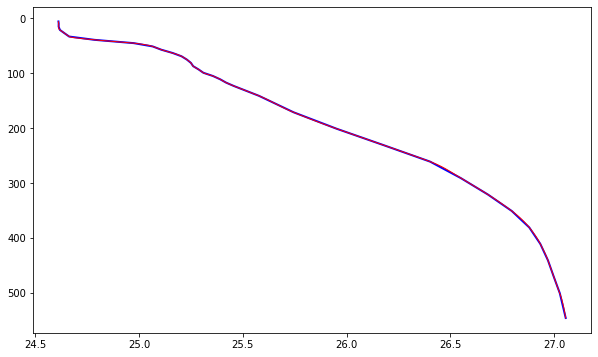

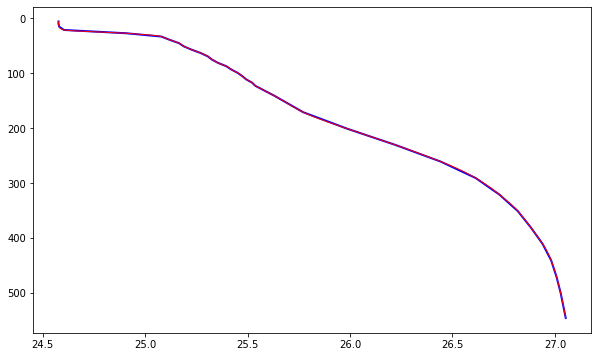

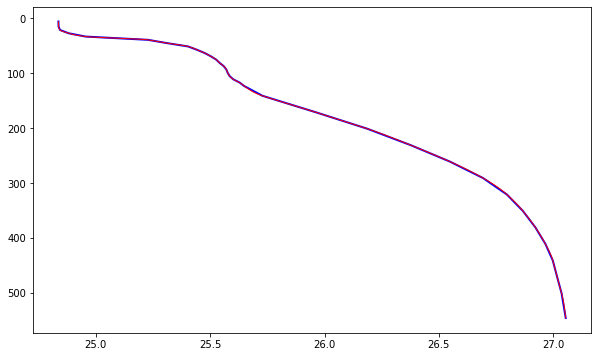

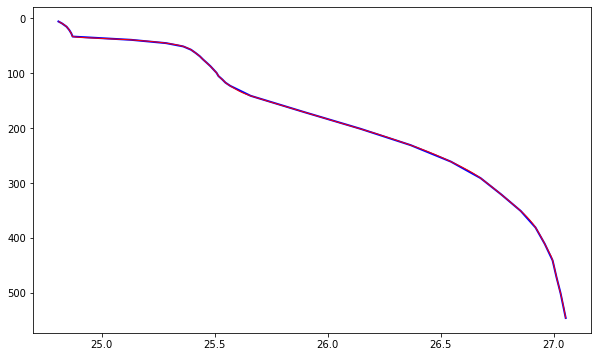

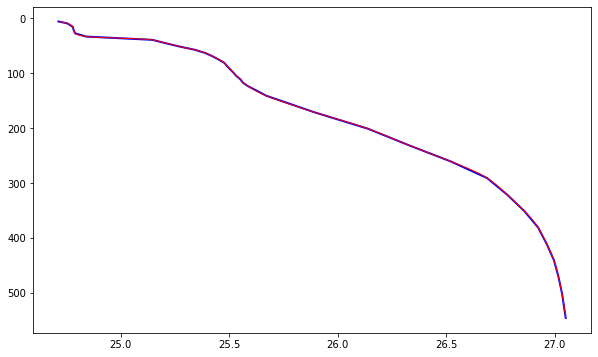

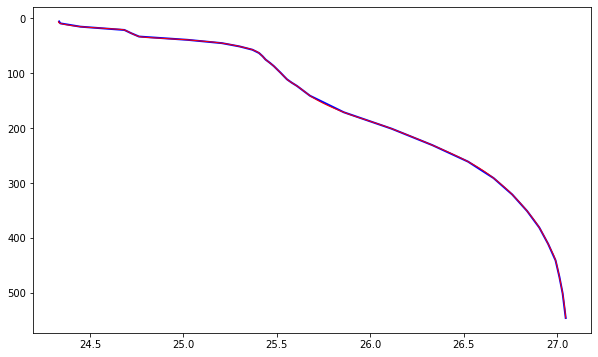

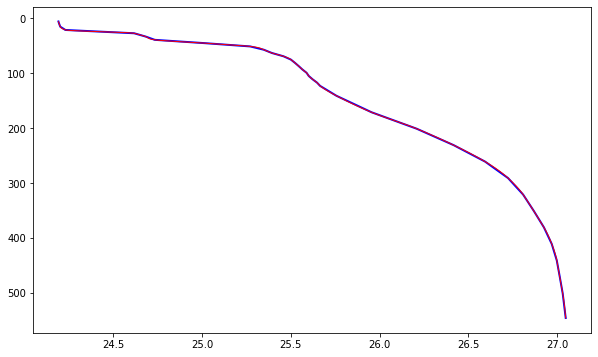

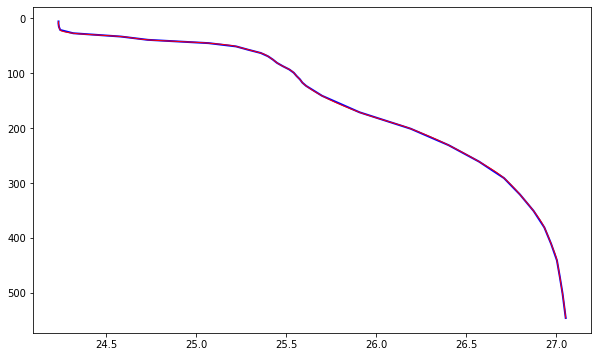

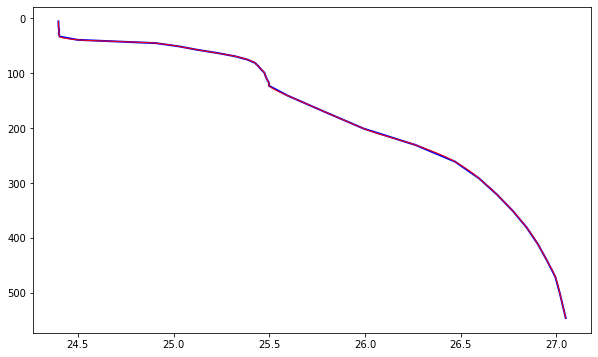

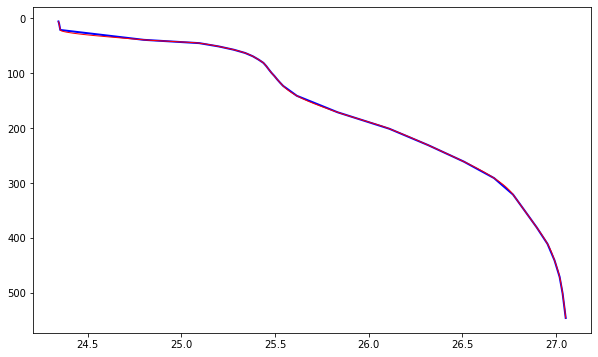

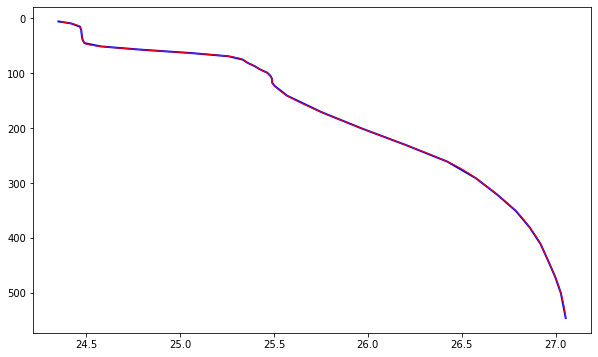

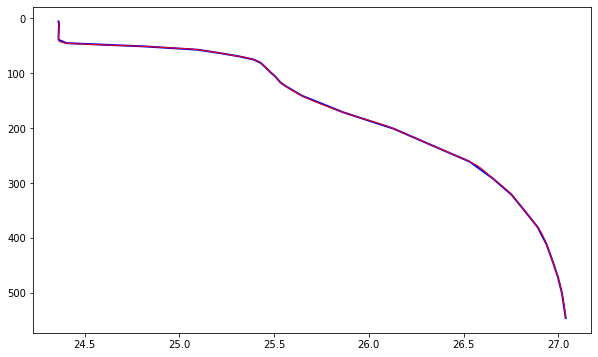

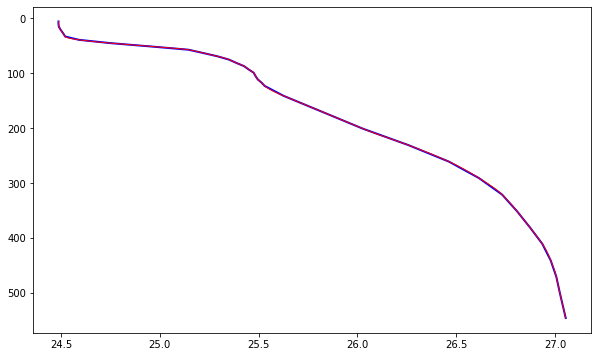

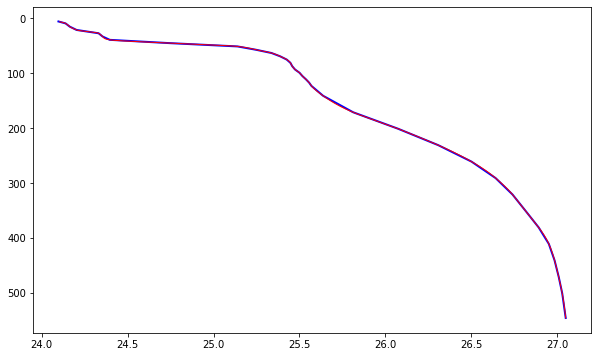

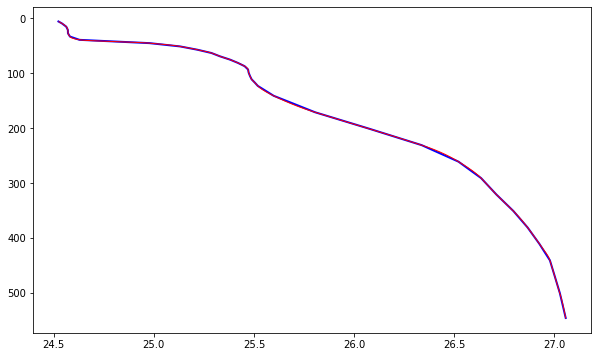

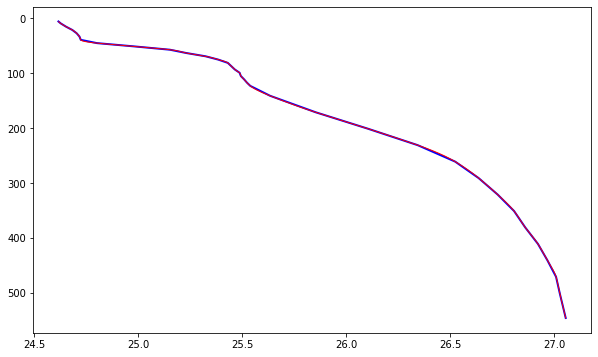

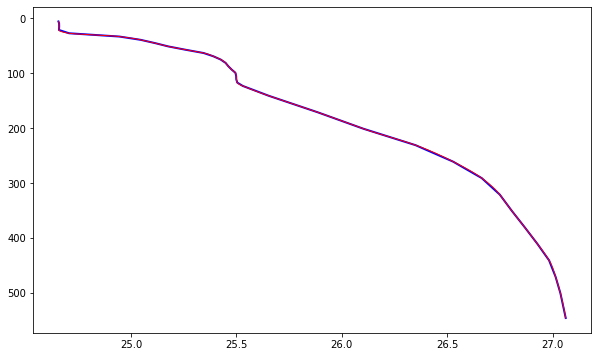

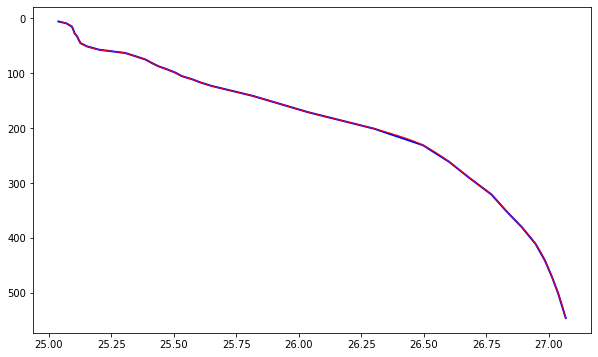

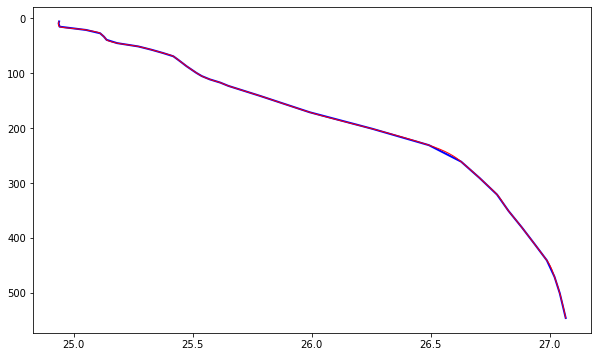

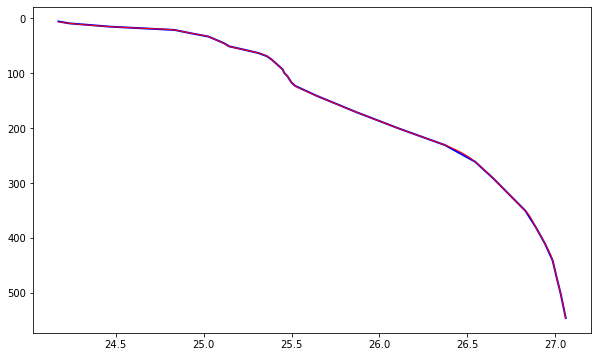

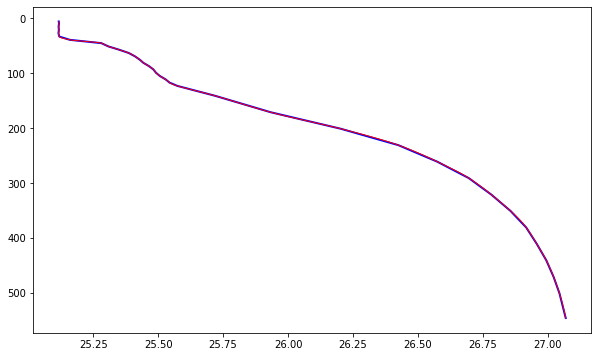

In [ ]:
import scipy.interpolate
from scipy.interpolate import interp1d
from scipy.interpolate import Akima1DInterpolator
import math
import warnings
from itertools import repeat
warnings.filterwarnings("ignore") # Ignorar warnings
enero= lista_dfs[0]
############################################################################################################33
ids= list(enero.Id.unique()) # Ids unicos del dataframe
ciclos= list(enero.Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids[0:1]: # Iterar solo el primer elemento (al final seria 0:len(ids))
  print('------------------------------------')
  print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=enero[enero['Id']==i].Ciclo.unique()
  for j in ciclos:
    print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= enero[(enero['Id']==i) & (enero['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=600)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; D= ds.D; # Variables locales otra vez
    # Objetos interpoladores de Salinidad y Temperatura
    # Caso 1: Spline (Espero que de mejor)
    spline_D= Akima1DInterpolator(pres,D) # Mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres));max_pres= math.ceil(np.max(pres))
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    # Interpolar T y S con (Metodo: Splines)
    D_new=spline_D(pres_new)
    #################################################################
    # Nueva grafica
    plt.figure(figsize=(10,6))
    plt.plot(ds.D,ds.Pres_Adj,color='b',linewidth=2)
    plt.plot(D_new,pres_new,color='r',linewidth=1)
    plt.gca().invert_yaxis()
    #################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 2000 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,600+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],601);df_ts['Lat']= np.repeat(lat_0[0],601)
    df_ts['Id']= np.repeat(id_0[0],601);df_ts['Ciclo']= np.repeat(ciclo_0[0],601);
    df_ts['D_interp']=np.nan; df_ts['D_interp'][min_pres:max_pres+1]= D_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

## Creacion de funcion para generalizar

In [ ]:
import scipy.interpolate
from scipy.interpolate import interp1d
from scipy.interpolate import Akima1DInterpolator
import math
import warnings
from itertools import repeat
warnings.filterwarnings("ignore") # Ignorar warnings
def interpolador_capas(dataframe, max_depth, intervalo):
  '''
  dataframe= pandas dataframe con columnas Lon, Lat,ciclo, Pres_adj, Id, Variable
  max_depth= valor entero de profundidad maxima a interpolar
  intervalo= intervalo de profundidad en m para interpolacion
  '''
  # Enfocarme en estas profundidades
  lista_prof = list(np.arange(0,max_depth+1,intervalo)) # Intervalos de 5m para extraer capas
  ############################################################################################################33
  ds_3D_m=dataframe
  ids= list(ds_3D_m.Id.unique()) # Ids unicos del dataframe
  ciclos= list(ds_3D_m.Ciclo.unique()) # ciclos unicos del dataframe
  dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
  for i in ids: 
    # Iterar solo el primer elemento (al final seria 0:len(ids))
    #print('------------------------------------')
    #print('Id :',i,'................... Check')
    #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
    ciclos=ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()
    for j in ciclos:
      #print('Ciclo',j,'......................... Check')
      # Filtro del id y ciclo respectivo
      ds= ds_3D_m[(ds_3D_m['Id']==i) & (ds_3D_m['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
      # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
      ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=max_depth)] # Importante para que todos los valores queden entre 0 y 2000 dbar
      # Extraer presion, temperatura y salinidad
      pres= ds.Pres_Adj;D= ds.D;T=ds.Temp_Adj;S=ds.Sal_Adj # Variables locales otra vez
      # Objetos interpoladores de Salinidad y Temperatura
      # Caso 1: Spline (Espero que de mejor)
      try:
        spline_D= Akima1DInterpolator(pres,D) # Mejor metodo que encontre
        spline_T= Akima1DInterpolator(pres,T) # Mejor metodo que encontre
        spline_S= Akima1DInterpolator(pres,S) # Mejor metodo que encontre
        # Ahora se hace la interpolacion entre el rango de valores de presion:
        min_pres= math.floor(np.min(pres));max_pres= math.ceil(np.max(pres))
        # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
        pres_new= np.arange(min_pres,max_pres+1,1)
        D_new=spline_D(pres_new)# Interpolar T y S con (Metodo: Splines)
        T_new=spline_T(pres_new)# Interpolar T y S con (Metodo: Splines)
        S_new=spline_S(pres_new)# Interpolar T y S con (Metodo: Splines)
        df_ts=pd.DataFrame();# Crear el dataframe para cada perfil
        # Agregar lat y lon, id y ciclo automatica
        lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
        df_ts['Presion_interp']=np.arange(0,max_depth+1,1)
        df_ts['Lon']= np.repeat(lon_0[0],max_depth+1);df_ts['Lat']= np.repeat(lat_0[0],max_depth+1)
        df_ts['Id']= np.repeat(id_0[0],max_depth+1);df_ts['Ciclo']= np.repeat(ciclo_0[0],max_depth+1);
        df_ts['D_interp']=np.nan;df_ts['D_interp'][min_pres:max_pres+1]= D_new;
        df_ts['T_interp']=np.nan;df_ts['T_interp'][min_pres:max_pres+1]= T_new;
        df_ts['S_interp']=np.nan;df_ts['S_interp'][min_pres:max_pres+1]= S_new;
        # Hacer el subset a las profundidades deseadas
        df_ts= df_ts[df_ts['Presion_interp'].isin(lista_prof)]
        dfs.append(df_ts)# Concatenar todos los dataframes en dfs
      except:
        #print('Intento fallido en Id:',i, 'Ciclo',j)
        pass
  # Interpolar para llenar la capa superficial
  dfs_final=[]
  for i in dfs:
    try:
      data_f= i.interpolate(method='spline', order=1,limit_direction='backward')
      dfs_final.append(data_f)# Agregar los dataframes
    except:
      dfs_final.append(i)
  print('Tamaño de los dataframes generados :',len(dfs_final))
  df_final= pd.concat(dfs_final)
  # Agrupar por cada Lat, Lon y Presion sacando la media que no tiene en cuenta los nan
  df_final=df_final[['Presion_interp','Lon','Lat','D_interp','T_interp','S_interp']].groupby(by=['Lon','Lat','Presion_interp']).mean().reset_index()
  print(df_final.shape)
  return df_final

## Validacion-DJF

In [ ]:
DJF= interpolador_capas(dataframe= lista_dfs[0], max_depth= 600, intervalo=1)
DJF

Tamaño de los dataframes generados : 4867
(2925067, 6)


Lon     Lat  Presion_interp   D_interp   T_interp   S_interp
0         5.001 -38.867               0  26.062034  14.588759  34.848557
1         5.001 -38.867               1  26.064120  14.574822  34.848140
2         5.001 -38.867               2  26.066206  14.560885  34.847722
3         5.001 -38.867               3  26.068291  14.546949  34.847304
4         5.001 -38.867               4  26.070377  14.533012  34.846887
...         ...     ...             ...        ...        ...        ...
2925062  24.988 -38.318             596        NaN        NaN        NaN
2925063  24.988 -38.318             597        NaN        NaN        NaN
2925064  24.988 -38.318             598        NaN        NaN        NaN
2925065  24.988 -38.318             599        NaN        NaN        NaN
2925066  24.988 -38.318             600        NaN        NaN        NaN

[2925067 rows x 6 columns]

In [ ]:
import scipy
from scipy.interpolate import griddata
ds_final= DJF #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_jan_D = []
datos_jan_T = []
datos_jan_S = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(5+0.5,25+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-40+0.5, -10+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values_D=np.array(capa_x['D_interp'])
  values_T=np.array(capa_x['T_interp'])
  values_S=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0_D=griddata(points,values_D, (grid_x,grid_y),method='linear')
  grid_z0_T=griddata(points,values_T, (grid_x,grid_y),method='linear')
  grid_z0_S=griddata(points,values_S, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur-Norte
  grid_z0_1_D=np.flip(grid_z0_D, axis=0)
  grid_z0_1_T=np.flip(grid_z0_T, axis=0)
  grid_z0_1_S=np.flip(grid_z0_S, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_jan_D.append(grid_z0_1_D);datos_jan_T.append(grid_z0_1_T);datos_jan_S.append(grid_z0_1_S)
datos_D = np.stack(datos_jan_D);datos_T = np.stack(datos_jan_T);datos_S = np.stack(datos_jan_S)

In [ ]:
print(datos_D.shape,datos_T.shape,datos_S.shape)

(600, 30, 20) (600, 30, 20) (600, 30, 20)


In [ ]:
# Modelo data
T_DJF=np.mean(reanal.where(((reanal.month==1)|(reanal.month==2)|(reanal.month==12)), drop=True).CT.values,axis=0)
S_DJF=np.mean(reanal.where(((reanal.month==1)|(reanal.month==2)|(reanal.month==12)), drop=True).SA.values,axis=0)
D_DJF=np.mean(reanal.where(((reanal.month==1)|(reanal.month==2)|(reanal.month==12)), drop=True).D.values,axis=0)
print(T_DJF.shape, S_DJF.shape, D_DJF.shape)

(40, 121, 81) (40, 121, 81) (40, 121, 81)


In [ ]:
# Interpolar a todas las capas para la misma grilla
x1= np.arange(5+0.5, 25+0.5,1)
y1= list(np.arange(-40+0.5, -10+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
dat_D = []
dat_T = []
dat_S = []
for i in range(T_DJF.shape[0]):
  T_X=basemap.interp(datain=np.flipud(T_DJF[i,:,:]), xin=reanal.lon.values,
                       yin=reanal.lat.values,xout=X_t, yout=Y_t, order=1, masked= True)
  D_X=basemap.interp(datain=np.flipud(D_DJF[i,:,:]), xin=reanal.lon.values,
                       yin=reanal.lat.values,xout=X_t, yout=Y_t, order=1, masked= True)
  S_X=basemap.interp(datain=np.flipud(S_DJF[i,:,:]), xin=reanal.lon.values,
                       yin=reanal.lat.values,xout=X_t, yout=Y_t, order=1, masked= True)
  dat_D.append(D_X);dat_T.append(T_X);dat_S.append(S_X)
M_D = np.stack(dat_D);M_T = np.stack(dat_T);M_S = np.stack(dat_S)
print(M_D.shape, M_T.shape, M_S.shape)

(40, 30, 20) (40, 30, 20) (40, 30, 20)


<xarray.Dataset>
Dimensions:  (depth: 40, lat: 30, lon: 20)
Coordinates:
  * lon      (lon) float64 5.5 6.5 7.5 8.5 9.5 10.5 ... 20.5 21.5 22.5 23.5 24.5
  * lat      (lat) float64 -39.5 -38.5 -37.5 -36.5 ... -13.5 -12.5 -11.5 -10.5
  * depth    (depth) float32 0.5058 1.556 2.668 3.856 ... 411.8 457.6 508.6
Data variables:
    T        (depth, lat, lon) float64 14.9 14.89 15.17 15.47 ... nan nan nan
    S        (depth, lat, lon) float64 34.81 34.84 34.93 35.06 ... nan nan nan
    D        (depth, lat, lon) float64 25.76 25.79 25.8 25.83 ... nan nan nan

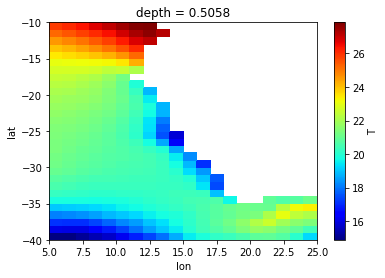

In [ ]:
M_final=dt=xr.Dataset(data_vars={"T":(['depth',"lat","lon"],M_T),"S":(['depth',"lat","lon"],M_S),"D":(['depth',"lat","lon"],M_D)}, 
                coords={"lon": np.arange(5+0.5, 25+0.5,1), 
                        "lat": np.arange(-40+0.5, -10+0.5,1), 
                        "depth": reanal.depth.values})
M_final.T.sel(depth=M_final.depth.values[0]).plot(cmap='jet')
M_final

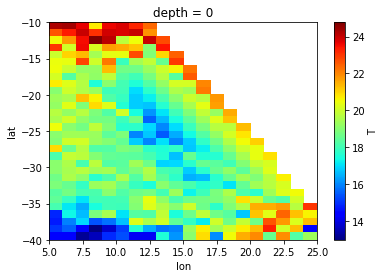

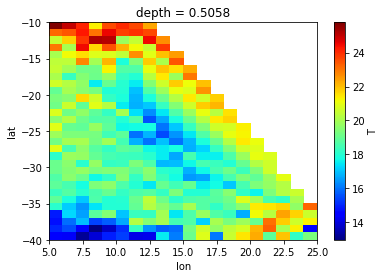

<xarray.Dataset>
Dimensions:  (depth: 40, lat: 30, lon: 20)
Coordinates:
  * lon      (lon) float64 5.5 6.5 7.5 8.5 9.5 10.5 ... 20.5 21.5 22.5 23.5 24.5
  * lat      (lat) float64 -10.5 -11.5 -12.5 -13.5 ... -36.5 -37.5 -38.5 -39.5
  * depth    (depth) float32 0.5058 1.556 2.668 3.856 ... 411.8 457.6 508.6
Data variables:
    T        (depth, lat, lon) float64 25.79 25.0 24.16 ... 12.99 10.23 9.047
    S        (depth, lat, lon) float64 36.1 36.02 35.8 ... 35.19 34.81 34.72
    D        (depth, lat, lon) float64 24.81 24.79 25.47 ... 26.59 26.81 26.89

In [ ]:
A_no_interp=xr.Dataset(data_vars={"T":(['depth',"lat","lon"],datos_T),"S":(['depth',"lat","lon"],datos_S),"D":(['depth',"lat","lon"],datos_D)}, 
                coords={"lon": np.arange(5+0.5, 25+0.5,1), 
                        "lat": np.array(list(np.arange(-40+0.5, -10+0.5,1))[::-1]), 
                        "depth": np.arange(0,600,1)})
A_final=xr.Dataset(data_vars={"T":(['depth',"lat","lon"],datos_T),"S":(['depth',"lat","lon"],datos_S),"D":(['depth',"lat","lon"],datos_D)}, 
                coords={"lon": np.arange(5+0.5, 25+0.5,1), 
                        "lat": np.array(list(np.arange(-40+0.5, -10+0.5,1))[::-1]), 
                        "depth": np.arange(0,600,1)}).interp(depth=reanal.depth.values)
A_no_interp.T.sel(depth=A_no_interp.depth.values[0]).plot(cmap='jet')
plt.show()
A_final.T.sel(depth=A_final.depth.values[0]).plot(cmap='jet')
plt.show()
A_final

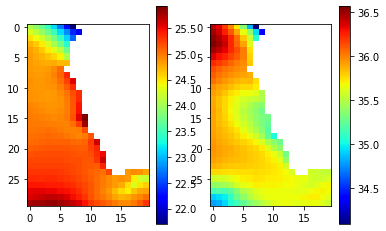

In [ ]:
plt.subplot(121)
plt.imshow(np.flipud(M_D[0,:,:]),cmap='jet')
plt.colorbar()
plt.subplot(122)
plt.imshow(np.flipud(M_S[0,:,:]),cmap='jet')
plt.colorbar()
#plt.subplot(133)
#plt.imshow(np.flipud(M_S[0,:,:]),cmap='jet')
#plt.colorbar()

### Graficos transectas pruebas

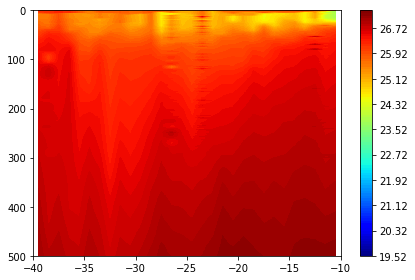

In [ ]:
prof= np.arange(0,600,1) # profundidades 
xts1=X_t[0,:]
yt1=Y_t[:,0]
tran_lat1=datos_D[:,:,0]# 0:-84.5 , 1: -83.5 ,......
plt.contourf(yt1,prof, tran_lat1,cmap='jet',levels=100)
#plt.contour(yt1,prof, tran_lat1,cmap='jet',levels=100)
plt.colorbar()
plt.ylim([0,500])
plt.xlim([-40,-10])
plt.tight_layout()
plt.margins(x=0)
plt.gca().invert_yaxis()

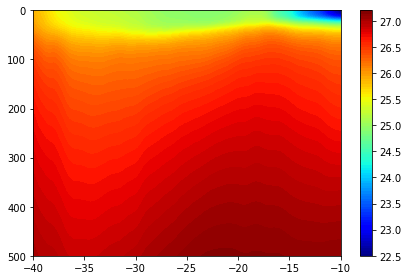

In [ ]:
D_M=reanal.D.sel(lon=10.5).where((reanal.month==1)|(reanal.month==2)|(reanal.month==12), drop=True).mean('month').values
prof_M= reanal.depth.values # profundidades 
plt.contourf(reanal.lat.values,prof_M,D_M,cmap='jet',levels=100)
#plt.contour(yt1,prof, tran_lat1,cmap='jet',levels=100)
plt.colorbar()
plt.ylim([0,500])
plt.xlim([-40,-10])
plt.tight_layout()
plt.margins(x=0)
plt.gca().invert_yaxis()

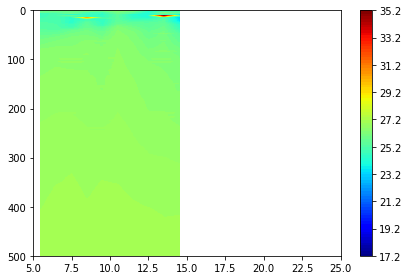

In [ ]:
tran_lat2=datos_D[:,5,:]# 0:-15.5 , 1: -16.5 ,......
plt.contourf(xts1,prof, tran_lat2,cmap='jet',levels=100)
#plt.contour(yt1,prof, tran_lat1,cmap='jet',levels=100)
plt.colorbar()
plt.ylim([0,500])
plt.xlim([5,25])
plt.tight_layout()
plt.margins(x=0)
plt.gca().invert_yaxis()

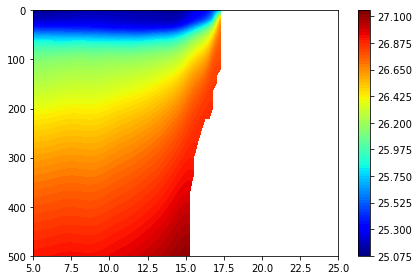

In [ ]:
D_M=reanal.D.sel(lat=-30.5).where((reanal.month==1)|(reanal.month==2)|(reanal.month==12), drop=True).mean('month').values
prof_M= reanal.depth.values # profundidades 
plt.contourf(reanal.lon.values,prof_M,D_M,cmap='jet',levels=100)
#plt.contour(yt1,prof, tran_lat1,cmap='jet',levels=100)
plt.colorbar()
plt.ylim([0,500])
plt.xlim([5,25])
plt.tight_layout()
plt.margins(x=0)
plt.gca().invert_yaxis()

### Graficas finales transectas

### Latitudinales

In [ ]:
lista_ARGO_LAT_D=[]; lista_ARGO_LAT_S=[]; lista_ARGO_LAT_T=[]
lista_MODEL_LAT_D=[];lista_MODEL_LAT_S=[];lista_MODEL_LAT_T=[]
lista_ARGOX_LAT_D=[]; lista_ARGOX_LAT_S=[]; lista_ARGOX_LAT_T=[]
# datos_D, datos_S, datos_T = datos reales de argo con 600 niveles
lon_Y= [6.5,9.5,14.5,17.5]
for i in range(4):
  tran_lat_d=A_final.sel(lon=lon_Y[i]).D.values;tran_lat_s=A_final.sel(lon=lon_Y[i]).S.values;tran_lat_t=A_final.sel(lon=lon_Y[i]).T.values;
  tran_lat_M_d= M_final.sel(lon=lon_Y[i]).D.values
  tran_lat_M_s= M_final.sel(lon=lon_Y[i]).S.values
  tran_lat_M_t= M_final.sel(lon=lon_Y[i]).T.values
  tran_lat_dx=A_final.sel(lon=lon_Y[i]).D.values;tran_lat_sx=A_final.sel(lon=lon_Y[i]).S.values;tran_lat_tx=A_final.sel(lon=lon_Y[i]).T.values;
  lista_ARGO_LAT_D.append(tran_lat_d);lista_MODEL_LAT_D.append(np.flip(tran_lat_M_d,axis=1));lista_ARGOX_LAT_D.append(np.flip((M_final.sel(lon=lon_Y[i]).D-A_final.sel(lon=lon_Y[i]).D).values,axis=1))
  lista_ARGO_LAT_S.append(tran_lat_s);lista_MODEL_LAT_S.append(np.flip(tran_lat_M_s,axis=1));lista_ARGOX_LAT_S.append(np.flip((M_final.sel(lon=lon_Y[i]).S-A_final.sel(lon=lon_Y[i]).S).values,axis=1))
  lista_ARGO_LAT_T.append(tran_lat_t);lista_MODEL_LAT_T.append(np.flip(tran_lat_M_t,axis=1));lista_ARGOX_LAT_T.append(np.flip((M_final.sel(lon=lon_Y[i]).T-A_final.sel(lon=lon_Y[i]).T).values,axis=1))
lista_final_D= lista_ARGO_LAT_D+lista_MODEL_LAT_D + lista_ARGOX_LAT_D# acoplar las tres listas 
lista_final_S= lista_ARGO_LAT_S+lista_MODEL_LAT_S+ lista_ARGOX_LAT_S # acoplar las tres listas 
lista_final_T= lista_ARGO_LAT_T+lista_MODEL_LAT_T + lista_ARGOX_LAT_T# acoplar las tres listas 
print(len(lista_final_D),len(lista_final_T),len(lista_final_S))

12 12 12


**Densidad**

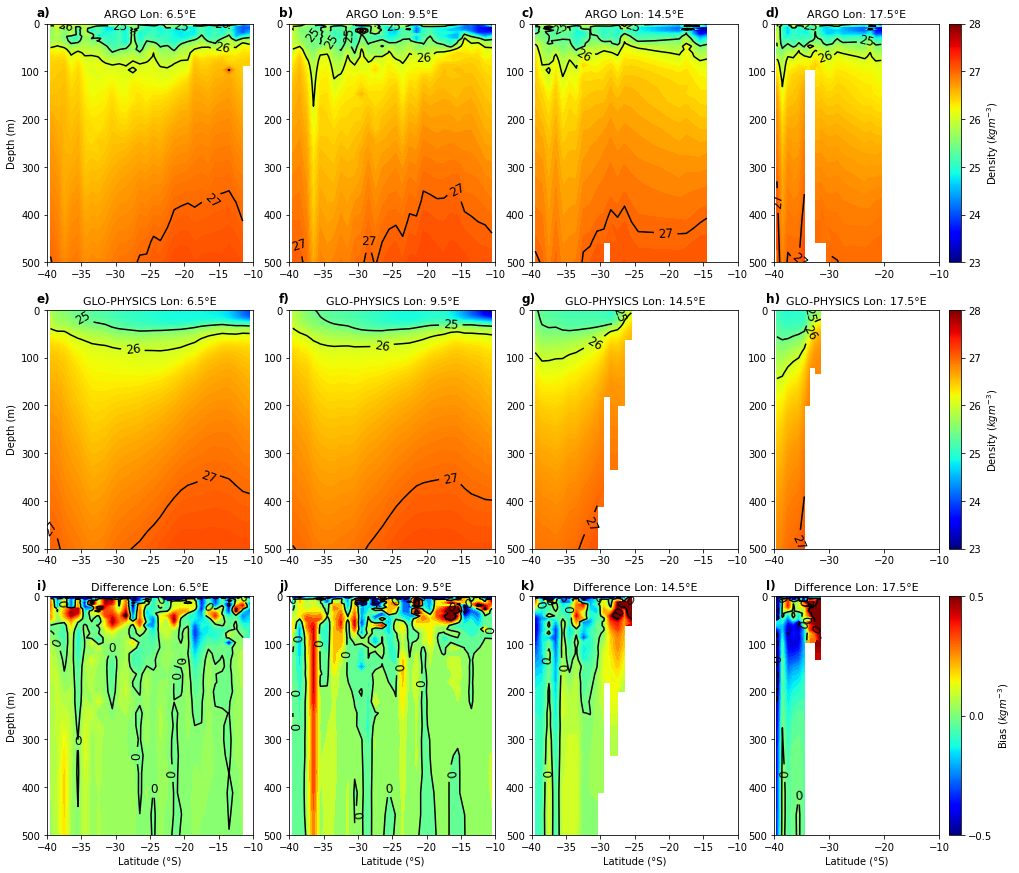

In [ ]:
import string
vmins= [23]*8 + [-0.5]*4 #limites inferiores replicados
vmaxs= [28]*8 + [0.5]*4 #limites superiores replicados
levelsx=[[25.4,26,27]]*8 +[[-0.5,0,0.5]]*4 #niveles a mostrar en el colorbar
ticks= np.array([23,24,25,26,27,28]) #labels para el colorbar de datos
ticks_dif= np.array([-0.5,0,0.5]) # ticks para colorbar de diferencia
prof= np.arange(0,600,1) # profundidades argo
prof_M= reanal.depth.values # profundidades modelo
lista_prof_ARGO=[prof_M]*4;lista_prof_ARGOX=[prof_M]*4;lista_prof_M=[prof_M]*4
lista_profs = lista_prof_ARGO + lista_prof_M +lista_prof_ARGOX
xts1=X_t[0,:]; yt1=Y_t[:,0] # coordenadas
lista_yt_ARGO= [yt1]*4;lista_yt_ARGOX= [yt1]*4;lista_yt_M= [yt1]*4
lista_yts=lista_yt_ARGO + lista_yt_M + lista_yt_ARGOX # agregar las tres listas
w=0.17;h=0.15
meses=['ARGO Lon: 6.5°E','ARGO Lon: 9.5°E','ARGO Lon: 14.5°E','ARGO Lon: 17.5°E',
       'GLO-PHYSICS Lon: 6.5°E','GLO-PHYSICS Lon: 9.5°E','GLO-PHYSICS Lon: 14.5°E','GLO-PHYSICS Lon: 17.5°E',
       'Difference Lon: 6.5°E','Difference Lon: 9.5°E','Difference Lon: 14.5°E','Difference Lon: 17.5°E']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.83,w,h],[0.2,0.83,w,h],[0.4,0.83,w,h],[0.6,0.83,w,h],
        [0,0.65,w,h],[0.2,0.65,w,h],[0.4,0.65,w,h],[0.6,0.65,w,h],
        [0,0.47,w,h],[0.2,0.47,w,h],[0.4,0.47,w,h],[0.6,0.47,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
##############################################################################################
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(-0.05,1.03,string.ascii_lowercase[j]+')',fontsize=12, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=11)
  # para la barra de colores
  cbar=ax.pcolormesh(lista_yts[j],lista_profs[j],lista_final_D[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], shading='flat')
  # para generar los contornos suavizados
  ax.contourf(lista_yts[j],lista_profs[j],lista_final_D[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], levels=100)
  cs=ax.contour(lista_yts[j],lista_profs[j],lista_final_D[j], levels=levelsx[j],colors='k')
  plt.clabel(cs,inline=True, fmt='%1.0f',fontsize=12, colors='k')
  ax.set_ylim([0,500]);ax.set_xlim([-40,-10]);plt.margins(x=0)
  plt.gca().invert_yaxis()
  if j==0:ax.set_ylabel('Depth (m)')
  elif j==3:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Density ($kg m^{-3}$)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==4:ax.set_ylabel('Depth (m)')
  elif j==7:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Density ($kg m^{-3}$)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==8:ax.set_ylabel('Depth (m)');ax.set_xlabel('Latitude (°S)')
  elif j in [9,10]:ax.set_xlabel('Latitude (°S)')
  elif j==11: ax.set_xlabel('Latitude (°S)');cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks_dif);cbar1.set_label('Bias ($kg m^{-3}$)', rotation=90)
plt.tight_layout()

**Temperatura**

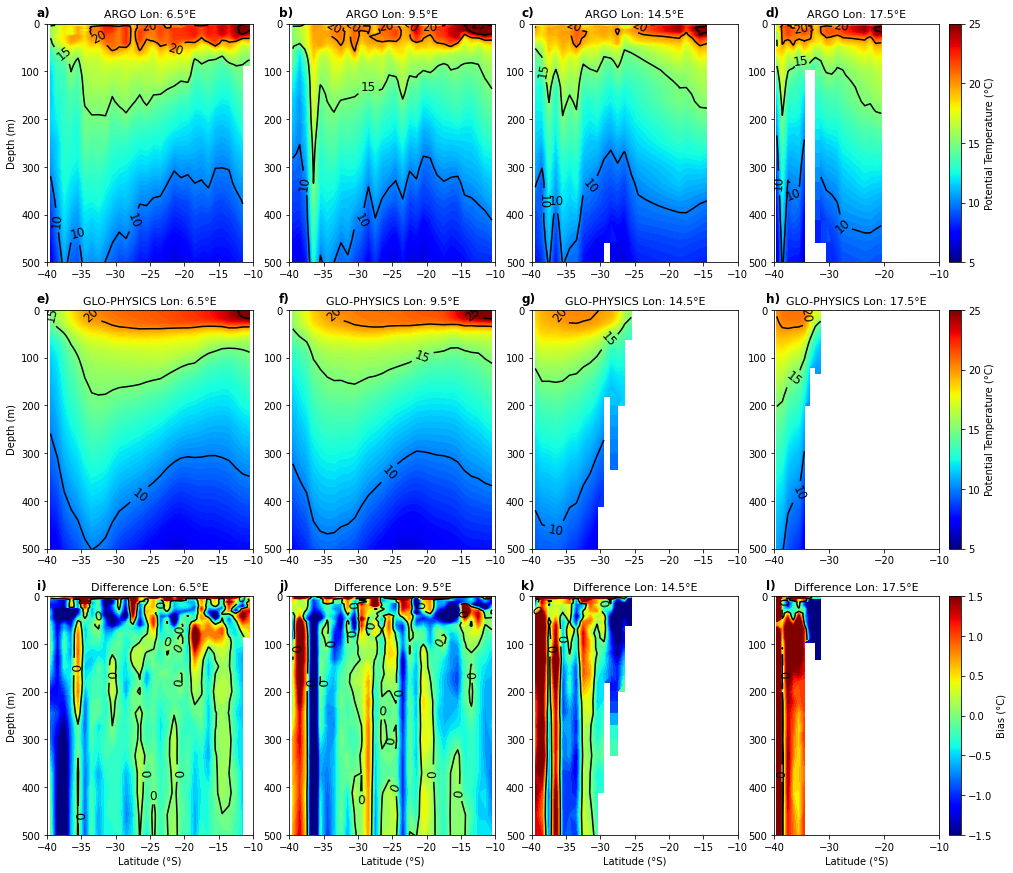

In [ ]:
import string
vmins= [5]*8 + [-1.5]*4 #limites inferiores replicados
vmaxs= [25]*8 + [1.5]*4 #limites superiores replicados
levelsx=[[5,10,15,20,25]]*8 +[[0]]*4 #niveles a mostrar en el colorbar
ticks= np.array([5,10,15,20,25]) #labels para el colorbar de datos
ticks_dif= np.array([-1.5,-1,-0.5,0,0.5,1,1.5]) # ticks para colorbar de diferencia
prof= np.arange(0,600,1) # profundidades argo
prof_M= reanal.depth.values # profundidades modelo
lista_prof_ARGO=[prof_M]*4;lista_prof_ARGOX=[prof_M]*4;lista_prof_M=[prof_M]*4
lista_profs = lista_prof_ARGO + lista_prof_M +lista_prof_ARGOX
xts1=X_t[0,:]; yt1=Y_t[:,0] # coordenadas
lista_yt_ARGO= [yt1]*4;lista_yt_ARGOX= [yt1]*4;lista_yt_M= [yt1]*4
lista_yts=lista_yt_ARGO + lista_yt_M + lista_yt_ARGOX # agregar las tres listas
w=0.17;h=0.15
meses=['ARGO Lon: 6.5°E','ARGO Lon: 9.5°E','ARGO Lon: 14.5°E','ARGO Lon: 17.5°E',
       'GLO-PHYSICS Lon: 6.5°E','GLO-PHYSICS Lon: 9.5°E','GLO-PHYSICS Lon: 14.5°E','GLO-PHYSICS Lon: 17.5°E',
       'Difference Lon: 6.5°E','Difference Lon: 9.5°E','Difference Lon: 14.5°E','Difference Lon: 17.5°E']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.83,w,h],[0.2,0.83,w,h],[0.4,0.83,w,h],[0.6,0.83,w,h],
        [0,0.65,w,h],[0.2,0.65,w,h],[0.4,0.65,w,h],[0.6,0.65,w,h],
        [0,0.47,w,h],[0.2,0.47,w,h],[0.4,0.47,w,h],[0.6,0.47,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
##############################################################################################
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(-0.05,1.03,string.ascii_lowercase[j]+')',fontsize=12, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=11)
  # para la barra de colores
  cbar=ax.pcolormesh(lista_yts[j],lista_profs[j],lista_final_T[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], shading='flat')
  # para generar los contornos suavizados
  ax.contourf(lista_yts[j],lista_profs[j],lista_final_T[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], levels=100)
  cs=ax.contour(lista_yts[j],lista_profs[j],lista_final_T[j], levels=levelsx[j],colors='k')
  plt.clabel(cs,inline=True, fmt='%1.0f',fontsize=12, colors='k')
  ax.set_ylim([0,500]);ax.set_xlim([-40,-10]);plt.margins(x=0)
  plt.gca().invert_yaxis()
  if j==0:ax.set_ylabel('Depth (m)')
  elif j==3:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Potential Temperature (°C)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==4:ax.set_ylabel('Depth (m)')
  elif j==7:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Potential Temperature (°C)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==8:ax.set_ylabel('Depth (m)');ax.set_xlabel('Latitude (°S)')
  elif j in [9,10]:ax.set_xlabel('Latitude (°S)')
  elif j==11: ax.set_xlabel('Latitude (°S)');cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks_dif);cbar1.set_label('Bias (°C)', rotation=90)
plt.tight_layout()

**Salinidad**

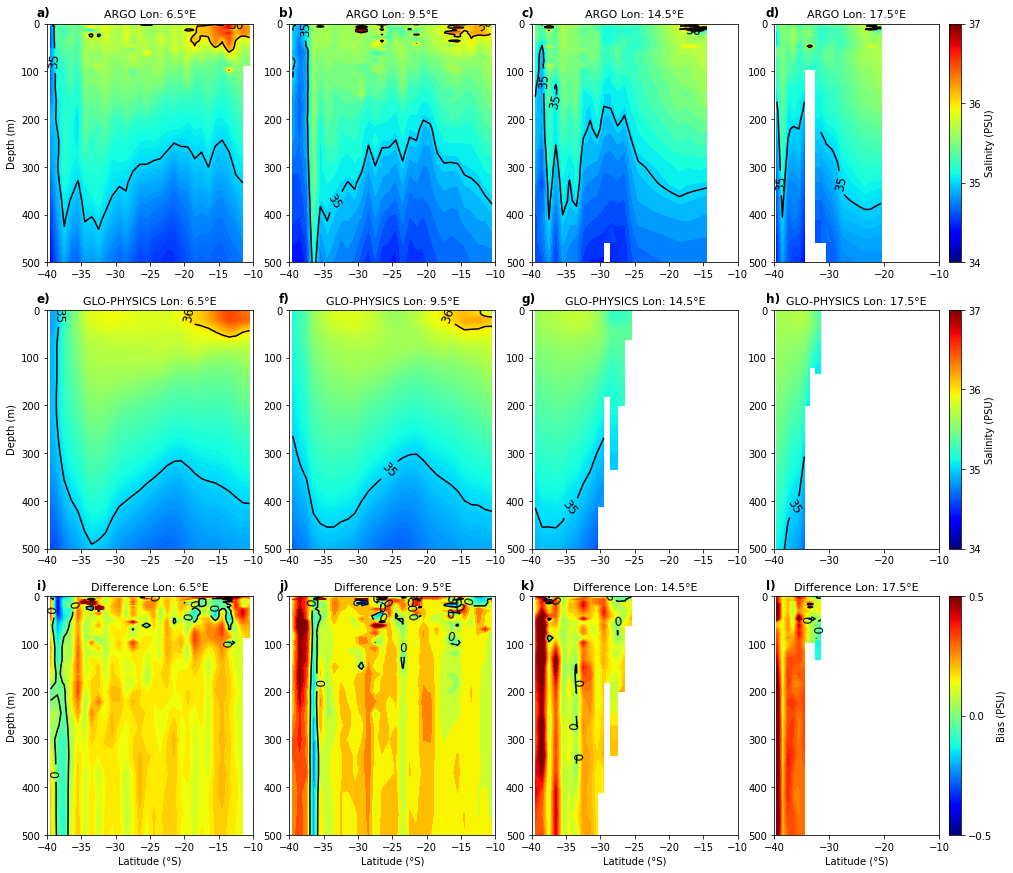

In [ ]:
import string
vmins= [34]*8 + [-0.5]*4 #limites inferiores replicados
vmaxs= [37]*8 + [0.5]*4 #limites superiores replicados
levelsx=[[33,34,35,36]]*8 +[[0]]*4 #niveles a mostrar en el colorbar
ticks= np.array([34,35,36,37]) #labels para el colorbar de datos
ticks_dif= np.array([-0.5,0,0.5]) # ticks para colorbar de diferencia
prof= np.arange(0,600,1) # profundidades argo
prof_M= reanal.depth.values # profundidades modelo
lista_prof_ARGO=[prof_M]*4;lista_prof_ARGOX=[prof_M]*4;lista_prof_M=[prof_M]*4
lista_profs = lista_prof_ARGO + lista_prof_M +lista_prof_ARGOX
xts1=X_t[0,:]; yt1=Y_t[:,0] # coordenadas
lista_yt_ARGO= [yt1]*4;lista_yt_ARGOX= [yt1]*4;lista_yt_M= [yt1]*4
lista_yts=lista_yt_ARGO + lista_yt_M + lista_yt_ARGOX # agregar las tres listas
w=0.17;h=0.15
meses=['ARGO Lon: 6.5°E','ARGO Lon: 9.5°E','ARGO Lon: 14.5°E','ARGO Lon: 17.5°E',
       'GLO-PHYSICS Lon: 6.5°E','GLO-PHYSICS Lon: 9.5°E','GLO-PHYSICS Lon: 14.5°E','GLO-PHYSICS Lon: 17.5°E',
       'Difference Lon: 6.5°E','Difference Lon: 9.5°E','Difference Lon: 14.5°E','Difference Lon: 17.5°E']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.83,w,h],[0.2,0.83,w,h],[0.4,0.83,w,h],[0.6,0.83,w,h],
        [0,0.65,w,h],[0.2,0.65,w,h],[0.4,0.65,w,h],[0.6,0.65,w,h],
        [0,0.47,w,h],[0.2,0.47,w,h],[0.4,0.47,w,h],[0.6,0.47,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
##############################################################################################
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(-0.05,1.03,string.ascii_lowercase[j]+')',fontsize=12, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=11)
  # para la barra de colores
  cbar=ax.pcolormesh(lista_yts[j],lista_profs[j],lista_final_S[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], shading='flat')
  # para generar los contornos suavizados
  ax.contourf(lista_yts[j],lista_profs[j],lista_final_S[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], levels=100)
  cs=ax.contour(lista_yts[j],lista_profs[j],lista_final_S[j], levels=levelsx[j],colors='k')
  plt.clabel(cs,inline=True, fmt='%1.0f',fontsize=12, colors='k')
  ax.set_ylim([0,500]);ax.set_xlim([-40,-10]);plt.margins(x=0)
  plt.gca().invert_yaxis()
  if j==0:ax.set_ylabel('Depth (m)')
  elif j==3:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Salinity (PSU)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==4:ax.set_ylabel('Depth (m)')
  elif j==7:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Salinity (PSU)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==8:ax.set_ylabel('Depth (m)');ax.set_xlabel('Latitude (°S)')
  elif j in [9,10]:ax.set_xlabel('Latitude (°S)')
  elif j==11: ax.set_xlabel('Latitude (°S)');cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks_dif);cbar1.set_label('Bias (PSU)', rotation=90)
plt.tight_layout()

### Longitudinales

In [ ]:
lista_ARGO_LAT_D=[]; lista_ARGO_LAT_S=[]; lista_ARGO_LAT_T=[]
lista_MODEL_LAT_D=[];lista_MODEL_LAT_S=[];lista_MODEL_LAT_T=[]
lista_ARGOX_LAT_D=[]; lista_ARGOX_LAT_S=[]; lista_ARGOX_LAT_T=[]
# datos_D, datos_S, datos_T = datos reales de argo con 600 niveles
lat_Y= [-11.5,-20.5,-29.5,-38.5]
for i in range(4):
  tran_lat_d=A_final.sel(lat=lat_Y[i]).D.values;tran_lat_s=A_final.sel(lat=lat_Y[i]).S.values;tran_lat_t=A_final.sel(lat=lat_Y[i]).T.values;
  tran_lat_M_d= M_final.sel(lat=lat_Y[i]).D.values
  tran_lat_M_s= M_final.sel(lat=lat_Y[i]).S.values
  tran_lat_M_t= M_final.sel(lat=lat_Y[i]).T.values
  tran_lat_dx=A_final.sel(lat=lat_Y[i]).D.values;tran_lat_sx=A_final.sel(lat=lat_Y[i]).S.values;tran_lat_tx=A_final.sel(lat=lat_Y[i]).T.values;
  lista_ARGO_LAT_D.append(tran_lat_d);lista_MODEL_LAT_D.append(tran_lat_M_d);lista_ARGOX_LAT_D.append((M_final.sel(lat=lat_Y[i]).D-A_final.sel(lat=lat_Y[i]).D).values)
  lista_ARGO_LAT_S.append(tran_lat_s);lista_MODEL_LAT_S.append(tran_lat_M_s);lista_ARGOX_LAT_S.append((M_final.sel(lat=lat_Y[i]).S-A_final.sel(lat=lat_Y[i]).S).values)
  lista_ARGO_LAT_T.append(tran_lat_t);lista_MODEL_LAT_T.append(tran_lat_M_t);lista_ARGOX_LAT_T.append((M_final.sel(lat=lat_Y[i]).T-A_final.sel(lat=lat_Y[i]).T).values)
lista_final_D= lista_ARGO_LAT_D+lista_MODEL_LAT_D + lista_ARGOX_LAT_D# acoplar las tres listas 
lista_final_D[0][lista_final_D[0]>27.10728928778205]= 27.10728928778205-0.2
lista_final_S= lista_ARGO_LAT_S+lista_MODEL_LAT_S+ lista_ARGOX_LAT_S # acoplar las tres listas 
lista_final_S[0][lista_final_S[0]>36]= 36-0.4
lista_final_T= lista_ARGO_LAT_T+lista_MODEL_LAT_T + lista_ARGOX_LAT_T# acoplar las tres listas 
print(len(lista_final_D),len(lista_final_T),len(lista_final_S))

12 12 12


**Densidad**

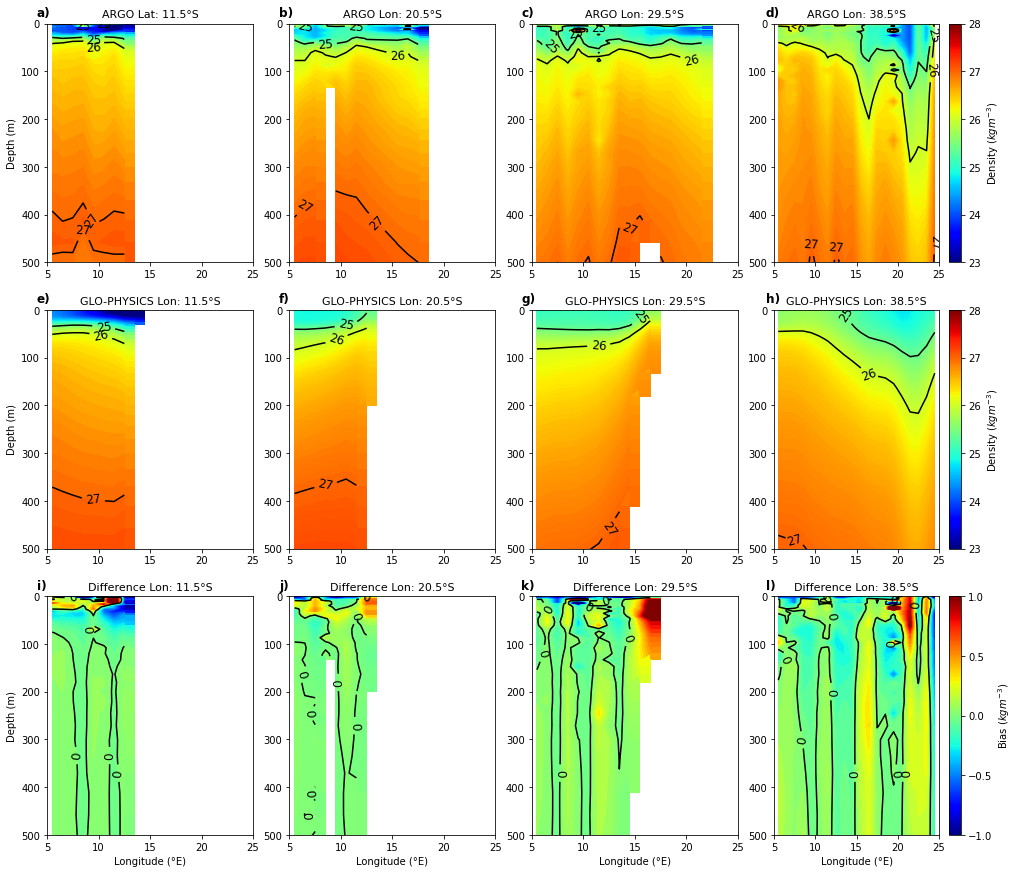

In [ ]:
import string
vmins= [23]*8 + [-1]*4 #limites inferiores replicados
vmaxs= [28]*8 + [1]*4 #limites superiores replicados
levelsx=[[25.4,26,27]]*8 +[[0]]*4 #niveles a mostrar en el colorbar
ticks= np.array([23,24,25,26,27,28]) #labels para el colorbar de datos
ticks_dif= np.array([-1,-0.5,0,0.5,1]) # ticks para colorbar de diferencia
prof= np.arange(0,600,1) # profundidades argo
prof_M= reanal.depth.values # profundidades modelo
lista_prof_ARGO=[prof_M]*4;lista_prof_ARGOX=[prof_M]*4;lista_prof_M=[prof_M]*4
lista_profs = lista_prof_ARGO + lista_prof_M +lista_prof_ARGOX
xts1=X_t[0,:]; yt1=Y_t[:,0] # coordenadas
lista_yt_ARGO= [xts1]*4;lista_yt_ARGOX= [xts1]*4;lista_yt_M= [xts1]*4
lista_yts=lista_yt_ARGO + lista_yt_M + lista_yt_ARGOX # agregar las tres listas
w=0.17;h=0.15
meses=['ARGO Lat: 11.5°S','ARGO Lon: 20.5°S','ARGO Lon: 29.5°S','ARGO Lon: 38.5°S',
       'GLO-PHYSICS Lon: 11.5°S','GLO-PHYSICS Lon: 20.5°S','GLO-PHYSICS Lon: 29.5°S','GLO-PHYSICS Lon: 38.5°S',
       'Difference Lon: 11.5°S','Difference Lon: 20.5°S','Difference Lon: 29.5°S','Difference Lon: 38.5°S']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.83,w,h],[0.2,0.83,w,h],[0.4,0.83,w,h],[0.6,0.83,w,h],
        [0,0.65,w,h],[0.2,0.65,w,h],[0.4,0.65,w,h],[0.6,0.65,w,h],
        [0,0.47,w,h],[0.2,0.47,w,h],[0.4,0.47,w,h],[0.6,0.47,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
##############################################################################################
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(-0.05,1.03,string.ascii_lowercase[j]+')',fontsize=12, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=11)
  # para la barra de colores
  cbar=ax.pcolormesh(lista_yts[j],lista_profs[j],lista_final_D[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], shading='flat')
  # para generar los contornos suavizados
  ax.contourf(lista_yts[j],lista_profs[j],lista_final_D[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], levels=100)
  cs=ax.contour(lista_yts[j],lista_profs[j],lista_final_D[j], levels=levelsx[j],colors='k')
  plt.clabel(cs,inline=True, fmt='%1.0f',fontsize=12, colors='k')
  ax.set_ylim([0,500]);ax.set_xlim([5,25]);plt.margins(x=0)
  plt.gca().invert_yaxis()
  if j==0:ax.set_ylabel('Depth (m)')
  elif j==3:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Density ($kg m^{-3}$)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==4:ax.set_ylabel('Depth (m)')
  elif j==7:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Density ($kg m^{-3}$)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==8:ax.set_ylabel('Depth (m)');ax.set_xlabel('Longitude (°E)')
  elif j in [9,10]:ax.set_xlabel('Longitude (°E)')
  elif j==11: ax.set_xlabel('Longitude (°E)');cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks_dif);cbar1.set_label('Bias ($kg m^{-3}$)', rotation=90)
plt.tight_layout()

**Temperatura**

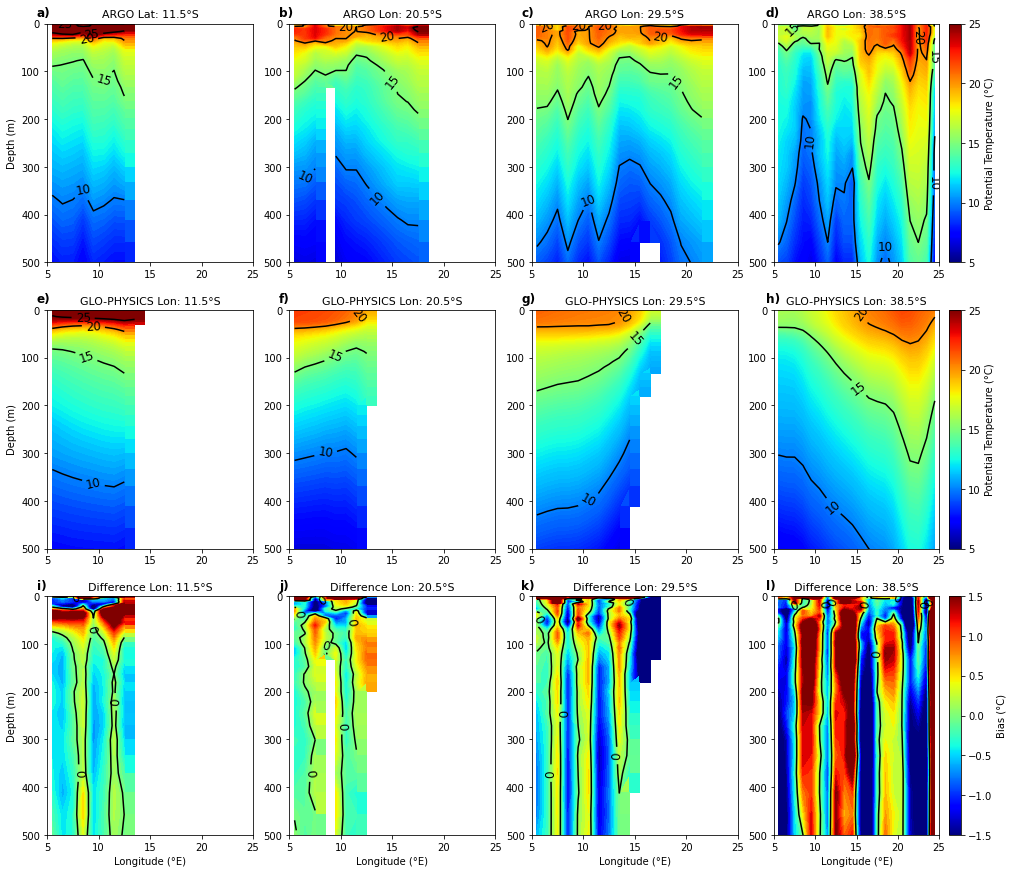

In [ ]:
import string
vmins= [5]*8 + [-1.5]*4 #limites inferiores replicados
vmaxs= [25]*8 + [1.5]*4 #limites superiores replicados
levelsx=[[5,10,15,20,25]]*8 +[[0]]*4 #niveles a mostrar en el colorbar
ticks= np.array([5,10,15,20,25]) #labels para el colorbar de datos
ticks_dif= np.array([-1.5,-1,-0.5,0,0.5,1,1.5]) # ticks para colorbar de diferencia
prof= np.arange(0,600,1) # profundidades argo
prof_M= reanal.depth.values # profundidades modelo
lista_prof_ARGO=[prof_M]*4;lista_prof_ARGOX=[prof_M]*4;lista_prof_M=[prof_M]*4
lista_profs = lista_prof_ARGO + lista_prof_M +lista_prof_ARGOX
xts1=X_t[0,:]; yt1=Y_t[:,0] # coordenadas
lista_yt_ARGO= [xts1]*4;lista_yt_ARGOX= [xts1]*4;lista_yt_M= [xts1]*4
lista_yts=lista_yt_ARGO + lista_yt_M + lista_yt_ARGOX # agregar las tres listas
w=0.17;h=0.15
meses=['ARGO Lat: 11.5°S','ARGO Lon: 20.5°S','ARGO Lon: 29.5°S','ARGO Lon: 38.5°S',
       'GLO-PHYSICS Lon: 11.5°S','GLO-PHYSICS Lon: 20.5°S','GLO-PHYSICS Lon: 29.5°S','GLO-PHYSICS Lon: 38.5°S',
       'Difference Lon: 11.5°S','Difference Lon: 20.5°S','Difference Lon: 29.5°S','Difference Lon: 38.5°S']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.83,w,h],[0.2,0.83,w,h],[0.4,0.83,w,h],[0.6,0.83,w,h],
        [0,0.65,w,h],[0.2,0.65,w,h],[0.4,0.65,w,h],[0.6,0.65,w,h],
        [0,0.47,w,h],[0.2,0.47,w,h],[0.4,0.47,w,h],[0.6,0.47,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
##############################################################################################
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(-0.05,1.03,string.ascii_lowercase[j]+')',fontsize=12, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=11)
  # para la barra de colores
  cbar=ax.pcolormesh(lista_yts[j],lista_profs[j],lista_final_T[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], shading='flat')
  # para generar los contornos suavizados
  ax.contourf(lista_yts[j],lista_profs[j],lista_final_T[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], levels=100)
  cs=ax.contour(lista_yts[j],lista_profs[j],lista_final_T[j], levels=levelsx[j],colors='k')
  plt.clabel(cs,inline=True, fmt='%1.0f',fontsize=12, colors='k')
  ax.set_ylim([0,500]);ax.set_xlim([5,25]);plt.margins(x=0)
  plt.gca().invert_yaxis()
  if j==0:ax.set_ylabel('Depth (m)')
  elif j==3:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Potential Temperature (°C)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==4:ax.set_ylabel('Depth (m)')
  elif j==7:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Potential Temperature (°C)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==8:ax.set_ylabel('Depth (m)');ax.set_xlabel('Longitude (°E)')
  elif j in [9,10]:ax.set_xlabel('Longitude (°E)')
  elif j==11: ax.set_xlabel('Longitude (°E)');cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks_dif);cbar1.set_label('Bias (°C)', rotation=90)
plt.tight_layout()

**Salinidad**

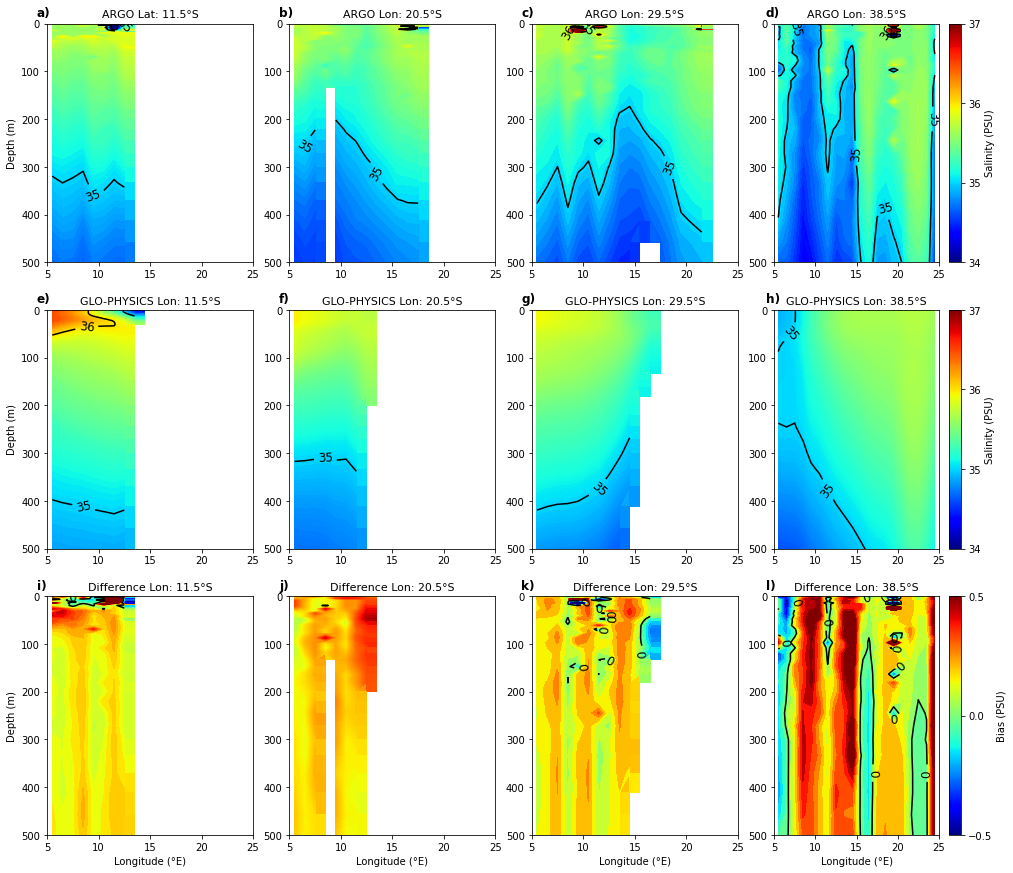

In [ ]:
import string
vmins= [34]*8 + [-0.5]*4 #limites inferiores replicados
vmaxs= [37]*8 + [0.5]*4 #limites superiores replicados
levelsx=[[33,34,35,36]]*8 +[[0]]*4 #niveles a mostrar en el colorbar
ticks= np.array([34,35,36,37]) #labels para el colorbar de datos
ticks_dif= np.array([-0.5,0,0.5]) # ticks para colorbar de diferencia
prof= np.arange(0,600,1) # profundidades argo
prof_M= reanal.depth.values # profundidades modelo
lista_prof_ARGO=[prof_M]*4;lista_prof_ARGOX=[prof_M]*4;lista_prof_M=[prof_M]*4
lista_profs = lista_prof_ARGO + lista_prof_M +lista_prof_ARGOX
xts1=X_t[0,:]; yt1=Y_t[:,0] # coordenadas
lista_yt_ARGO= [xts1]*4;lista_yt_ARGOX= [xts1]*4;lista_yt_M= [xts1]*4
lista_yts=lista_yt_ARGO + lista_yt_M + lista_yt_ARGOX # agregar las tres listas
w=0.17;h=0.15
meses=['ARGO Lat: 11.5°S','ARGO Lon: 20.5°S','ARGO Lon: 29.5°S','ARGO Lon: 38.5°S',
       'GLO-PHYSICS Lon: 11.5°S','GLO-PHYSICS Lon: 20.5°S','GLO-PHYSICS Lon: 29.5°S','GLO-PHYSICS Lon: 38.5°S',
       'Difference Lon: 11.5°S','Difference Lon: 20.5°S','Difference Lon: 29.5°S','Difference Lon: 38.5°S']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.83,w,h],[0.2,0.83,w,h],[0.4,0.83,w,h],[0.6,0.83,w,h],
        [0,0.65,w,h],[0.2,0.65,w,h],[0.4,0.65,w,h],[0.6,0.65,w,h],
        [0,0.47,w,h],[0.2,0.47,w,h],[0.4,0.47,w,h],[0.6,0.47,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
##############################################################################################
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(-0.05,1.03,string.ascii_lowercase[j]+')',fontsize=12, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=11)
  # para la barra de colores
  cbar=ax.pcolormesh(lista_yts[j],lista_profs[j],lista_final_S[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], shading='flat')
  # para generar los contornos suavizados
  ax.contourf(lista_yts[j],lista_profs[j],lista_final_S[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], levels=100)
  cs=ax.contour(lista_yts[j],lista_profs[j],lista_final_S[j], levels=levelsx[j],colors='k')
  plt.clabel(cs,inline=True, fmt='%1.0f',fontsize=12, colors='k')
  ax.set_ylim([0,500]);ax.set_xlim([5,25]);plt.margins(x=0)
  plt.gca().invert_yaxis()
  if j==0:ax.set_ylabel('Depth (m)')
  elif j==3:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Salinity (PSU)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==4:ax.set_ylabel('Depth (m)')
  elif j==7:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Salinity (PSU)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==8:ax.set_ylabel('Depth (m)');ax.set_xlabel('Longitude (°E)')
  elif j in [9,10]:ax.set_xlabel('Longitude (°E)')
  elif j==11: ax.set_xlabel('Longitude (°E)');cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks_dif);cbar1.set_label('Bias (PSU)', rotation=90)
plt.tight_layout()

### Diagramas de Taylor

In [ ]:
STD_D=[];CORRCOEF_D=[];RMSE_D=[]
STD_S=[];CORRCOEF_S=[];RMSE_S=[]
STD_T=[];CORRCOEF_T=[];RMSE_T=[]
for i in range(40):
  ###### DEN ######
  modelo= np.flipud(M_final.D.values[i,:,:]).flatten()
  satelite= A_final.D.values[i,:,:].flatten() # aplicar media en dimension tiempo
  IND = np.invert(np.isnan(satelite) | np.isnan(modelo)) # Sacar los indices que comparten en el espacio
  P = modelo[IND] # Modelo
  A = satelite[IND] # Referencia Era
  DD = np.ma.std(A.ravel()) # Desviacion estandar Referencia
  P = P/DD # Normalizacion por Std referencia
  A = A/DD 
  STD_D.append(np.ma.std(P.ravel()))
  CORRCOEF_D.append(np.ma.corrcoef(P.ravel(), A.ravel()).data[0,1])
  RMSE_D.append(np.sqrt(np.mean((P-A)**2)))
  ###### SAL ######
  modelo= np.flipud(M_final.S.values[i,:,:]).flatten()
  satelite= A_final.S.values[i,:,:].flatten() # aplicar media en dimension tiempo
  IND = np.invert(np.isnan(satelite) | np.isnan(modelo)) # Sacar los indices que comparten en el espacio
  P = modelo[IND] # Modelo
  A = satelite[IND] # Referencia Era
  DD = np.ma.std(A.ravel()) # Desviacion estandar Referencia
  P = P/DD # Normalizacion por Std referencia
  A = A/DD 
  STD_S.append(np.ma.std(P.ravel()))
  CORRCOEF_S.append(np.ma.corrcoef(P.ravel(), A.ravel()).data[0,1])
  RMSE_S.append(np.sqrt(np.mean((P-A)**2)))
  ###### TEMP ######
  modelo= np.flipud(M_final.T.values[i,:,:]).flatten()
  satelite= A_final.T.values[i,:,:].flatten() # aplicar media en dimension tiempo
  IND = np.invert(np.isnan(satelite) | np.isnan(modelo)) # Sacar los indices que comparten en el espacio
  P = modelo[IND] # Modelo
  A = satelite[IND] # Referencia Era
  DD = np.ma.std(A.ravel()) # Desviacion estandar Referencia
  P = P/DD # Normalizacion por Std referencia
  A = A/DD 
  STD_T.append(np.ma.std(P.ravel()))
  CORRCOEF_T.append(np.ma.corrcoef(P.ravel(), A.ravel()).data[0,1])
  RMSE_T.append(np.sqrt(np.mean((P-A)**2)))

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM


Text(1.0, 0.21, 'RMSE')

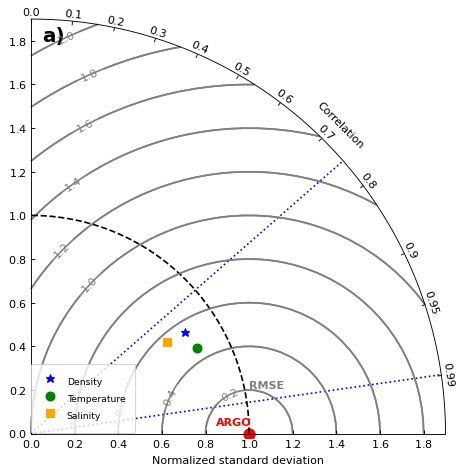

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/'
from taylorDiagram_mod import TaylorDiagram as TaDiM
import numpy as NP
figID_Taylor = plt.figure(num=11, dpi=80)
figID_Taylor.set_size_inches(7., 7.)
TayDia = TaDiM(1, fig=figID_Taylor, rect=111, srange=(0., 1.9), label='ARGO')
pp=[]
ttt=TayDia.add_sample(np.mean(STD_D), np.mean(CORRCOEF_D)+0.1, marker="*", linestyle='None', color='blue', ms=8);pp.append(ttt)
ttt=TayDia.add_sample(np.mean(STD_T), np.mean(CORRCOEF_T)+0.1, marker="o", linestyle='None', color='green', ms=8);pp.append(ttt)
ttt=TayDia.add_sample(np.mean(STD_S), np.mean(CORRCOEF_S)+0.1, marker="s", linestyle='None', color='orange', ms=8);pp.append(ttt)
contours = TayDia.add_contours(levels=10, colors='0.5')
contours = TayDia.add_contours(levels=10, colors='0.5')
plt.plot([0,NP.sqrt(1.9**2 -1.25**2)],[0,1.25], color='blue',linestyle=':') # correlacion 0.75
plt.plot([0,NP.sqrt(1.9**2 -0.27**2)],[0,0.27], color='blue',linestyle=':') # correlacion 0.99
TayDia.ax.clabel(contours, inline=1, fontsize=10, fmt='%.1f')
plt.legend(pp, ['Density','Temperature','Salinity'],  prop=dict(size='small'), loc='lower left', borderpad=1.0, ncol=1,handleheight=2.4, labelspacing=0.05) # numpoints=1,
plt.text(0.85,0.04,'ARGO', color='red',weight='bold')
#plt.text(0.85,0.35,'MMM', color='red',weight='bold')
plt.text(0.05,1.8,'a)', color='black',weight='bold', fontsize=18)
plt.text(1.00,0.21,'RMSE', color='gray',weight='bold')

## Validacion -MAM

In [ ]:
MAM= interpolador_capas(dataframe= lista_dfs[1], max_depth= 600, intervalo=1)
MAM

Tamaño de los dataframes generados : 4729
(2842129, 6)


Lon     Lat  Presion_interp   D_interp   T_interp   S_interp
0         4.99978 -15.232               0  26.021811  22.198760  35.719817
1         4.99978 -15.232               1  26.024333  22.130119  35.717474
2         4.99978 -15.232               2  25.017339  22.988001  36.363823
3         4.99978 -15.232               3  25.016557  22.991925  36.364226
4         4.99978 -15.232               4  25.017623  22.988115  36.364080
...           ...     ...             ...        ...        ...        ...
2842124  24.99200 -37.532             596  27.109959   5.449646  34.284912
2842125  24.99200 -37.532             597  27.110697   5.433501  34.283407
2842126  24.99200 -37.532             598  27.111233   5.419186  34.281914
2842127  24.99200 -37.532             599  27.111404   5.410448  34.280802
2842128  24.99200 -37.532             600        NaN        NaN        NaN

[2842129 rows x 6 columns]

In [ ]:
import scipy
from scipy.interpolate import griddata
ds_final= MAM #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_jan_D = []
datos_jan_T = []
datos_jan_S = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(5+0.5,25+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-40+0.5, -10+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values_D=np.array(capa_x['D_interp'])
  values_T=np.array(capa_x['T_interp'])
  values_S=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0_D=griddata(points,values_D, (grid_x,grid_y),method='linear')
  grid_z0_T=griddata(points,values_T, (grid_x,grid_y),method='linear')
  grid_z0_S=griddata(points,values_S, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur-Norte
  grid_z0_1_D=np.flip(grid_z0_D, axis=0)
  grid_z0_1_T=np.flip(grid_z0_T, axis=0)
  grid_z0_1_S=np.flip(grid_z0_S, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_jan_D.append(grid_z0_1_D);datos_jan_T.append(grid_z0_1_T);datos_jan_S.append(grid_z0_1_S)
datos_D = np.stack(datos_jan_D);datos_T = np.stack(datos_jan_T);datos_S = np.stack(datos_jan_S)

In [ ]:
print(datos_D.shape,datos_T.shape,datos_S.shape)

(600, 30, 20) (600, 30, 20) (600, 30, 20)


In [ ]:
# Modelo data
T_DJF=np.mean(reanal.where(((reanal.month==3)|(reanal.month==4)|(reanal.month==5)), drop=True).CT.values,axis=0)
S_DJF=np.mean(reanal.where(((reanal.month==3)|(reanal.month==4)|(reanal.month==5)), drop=True).SA.values,axis=0)
D_DJF=np.mean(reanal.where(((reanal.month==3)|(reanal.month==4)|(reanal.month==5)), drop=True).D.values,axis=0)
print(T_DJF.shape, S_DJF.shape, D_DJF.shape)

(40, 121, 81) (40, 121, 81) (40, 121, 81)


In [ ]:
# Interpolar a todas las capas para la misma grilla
x1= np.arange(5+0.5, 25+0.5,1)
y1= list(np.arange(-40+0.5, -10+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
dat_D = []
dat_T = []
dat_S = []
for i in range(T_DJF.shape[0]):
  T_X=basemap.interp(datain=np.flipud(T_DJF[i,:,:]), xin=reanal.lon.values,
                       yin=reanal.lat.values,xout=X_t, yout=Y_t, order=1, masked= True)
  D_X=basemap.interp(datain=np.flipud(D_DJF[i,:,:]), xin=reanal.lon.values,
                       yin=reanal.lat.values,xout=X_t, yout=Y_t, order=1, masked= True)
  S_X=basemap.interp(datain=np.flipud(S_DJF[i,:,:]), xin=reanal.lon.values,
                       yin=reanal.lat.values,xout=X_t, yout=Y_t, order=1, masked= True)
  dat_D.append(D_X);dat_T.append(T_X);dat_S.append(S_X)
M_D = np.stack(dat_D);M_T = np.stack(dat_T);M_S = np.stack(dat_S)
print(M_D.shape, M_T.shape, M_S.shape)

(40, 30, 20) (40, 30, 20) (40, 30, 20)


<xarray.Dataset>
Dimensions:  (depth: 40, lat: 30, lon: 20)
Coordinates:
  * lon      (lon) float64 5.5 6.5 7.5 8.5 9.5 10.5 ... 20.5 21.5 22.5 23.5 24.5
  * lat      (lat) float64 -39.5 -38.5 -37.5 -36.5 ... -13.5 -12.5 -11.5 -10.5
  * depth    (depth) float32 0.5058 1.556 2.668 3.856 ... 411.8 457.6 508.6
Data variables:
    T        (depth, lat, lon) float64 14.77 14.9 15.25 15.38 ... nan nan nan
    S        (depth, lat, lon) float64 34.82 34.88 34.98 35.07 ... nan nan nan
    D        (depth, lat, lon) float64 25.8 25.82 25.82 25.85 ... nan nan nan

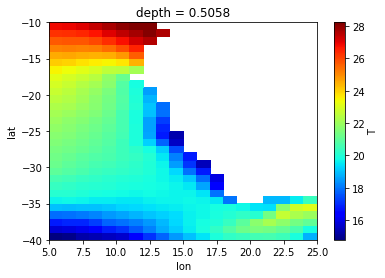

In [ ]:
M_final=dt=xr.Dataset(data_vars={"T":(['depth',"lat","lon"],M_T),"S":(['depth',"lat","lon"],M_S),"D":(['depth',"lat","lon"],M_D)}, 
                coords={"lon": np.arange(5+0.5, 25+0.5,1), 
                        "lat": np.arange(-40+0.5, -10+0.5,1), 
                        "depth": reanal.depth.values})
M_final.T.sel(depth=M_final.depth.values[0]).plot(cmap='jet')
M_final

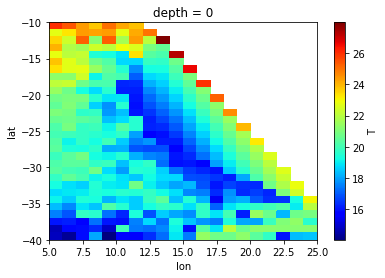

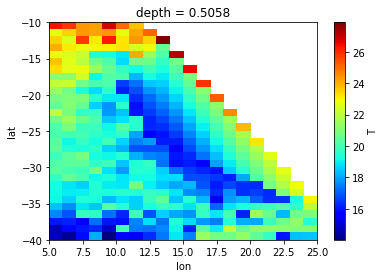

<xarray.Dataset>
Dimensions:  (depth: 40, lat: 30, lon: 20)
Coordinates:
  * lon      (lon) float64 5.5 6.5 7.5 8.5 9.5 10.5 ... 20.5 21.5 22.5 23.5 24.5
  * lat      (lat) float64 -10.5 -11.5 -12.5 -13.5 ... -36.5 -37.5 -38.5 -39.5
  * depth    (depth) float32 0.5058 1.556 2.668 3.856 ... 411.8 457.6 508.6
Data variables:
    T        (depth, lat, lon) float64 26.34 25.87 24.39 ... 8.044 10.46 9.304
    S        (depth, lat, lon) float64 36.1 35.98 35.73 ... 34.58 34.86 34.74
    D        (depth, lat, lon) float64 25.06 25.26 25.8 ... 26.98 26.79 26.9

In [ ]:
A_no_interp=xr.Dataset(data_vars={"T":(['depth',"lat","lon"],datos_T),"S":(['depth',"lat","lon"],datos_S),"D":(['depth',"lat","lon"],datos_D)}, 
                coords={"lon": np.arange(5+0.5, 25+0.5,1), 
                        "lat": np.array(list(np.arange(-40+0.5, -10+0.5,1))[::-1]), 
                        "depth": np.arange(0,600,1)})
A_final=xr.Dataset(data_vars={"T":(['depth',"lat","lon"],datos_T),"S":(['depth',"lat","lon"],datos_S),"D":(['depth',"lat","lon"],datos_D)}, 
                coords={"lon": np.arange(5+0.5, 25+0.5,1), 
                        "lat": np.array(list(np.arange(-40+0.5, -10+0.5,1))[::-1]), 
                        "depth": np.arange(0,600,1)}).interp(depth=reanal.depth.values)
A_no_interp.T.sel(depth=A_no_interp.depth.values[0]).plot(cmap='jet')
plt.show()
A_final.T.sel(depth=A_final.depth.values[0]).plot(cmap='jet')
plt.show()
A_final

### Graficas finales transectas

### Latitudinales

In [ ]:
lista_ARGO_LAT_D=[]; lista_ARGO_LAT_S=[]; lista_ARGO_LAT_T=[]
lista_MODEL_LAT_D=[];lista_MODEL_LAT_S=[];lista_MODEL_LAT_T=[]
lista_ARGOX_LAT_D=[]; lista_ARGOX_LAT_S=[]; lista_ARGOX_LAT_T=[]
# datos_D, datos_S, datos_T = datos reales de argo con 600 niveles
lon_Y= [6.5,9.5,14.5,17.5]
for i in range(4):
  tran_lat_d=A_final.sel(lon=lon_Y[i]).D.values;tran_lat_s=A_final.sel(lon=lon_Y[i]).S.values;tran_lat_t=A_final.sel(lon=lon_Y[i]).T.values;
  tran_lat_M_d= M_final.sel(lon=lon_Y[i]).D.values
  tran_lat_M_s= M_final.sel(lon=lon_Y[i]).S.values
  tran_lat_M_t= M_final.sel(lon=lon_Y[i]).T.values
  tran_lat_dx=A_final.sel(lon=lon_Y[i]).D.values;tran_lat_sx=A_final.sel(lon=lon_Y[i]).S.values;tran_lat_tx=A_final.sel(lon=lon_Y[i]).T.values;
  lista_ARGO_LAT_D.append(tran_lat_d);lista_MODEL_LAT_D.append(np.flip(tran_lat_M_d,axis=1));lista_ARGOX_LAT_D.append(np.flip((M_final.sel(lon=lon_Y[i]).D-A_final.sel(lon=lon_Y[i]).D).values,axis=1))
  lista_ARGO_LAT_S.append(tran_lat_s);lista_MODEL_LAT_S.append(np.flip(tran_lat_M_s,axis=1));lista_ARGOX_LAT_S.append(np.flip((M_final.sel(lon=lon_Y[i]).S-A_final.sel(lon=lon_Y[i]).S).values,axis=1))
  lista_ARGO_LAT_T.append(tran_lat_t);lista_MODEL_LAT_T.append(np.flip(tran_lat_M_t,axis=1));lista_ARGOX_LAT_T.append(np.flip((M_final.sel(lon=lon_Y[i]).T-A_final.sel(lon=lon_Y[i]).T).values,axis=1))
lista_final_D= lista_ARGO_LAT_D+lista_MODEL_LAT_D + lista_ARGOX_LAT_D# acoplar las tres listas 
lista_final_S= lista_ARGO_LAT_S+lista_MODEL_LAT_S+ lista_ARGOX_LAT_S # acoplar las tres listas 
lista_final_T= lista_ARGO_LAT_T+lista_MODEL_LAT_T + lista_ARGOX_LAT_T# acoplar las tres listas 
print(len(lista_final_D),len(lista_final_T),len(lista_final_S))

12 12 12


**Densidad**

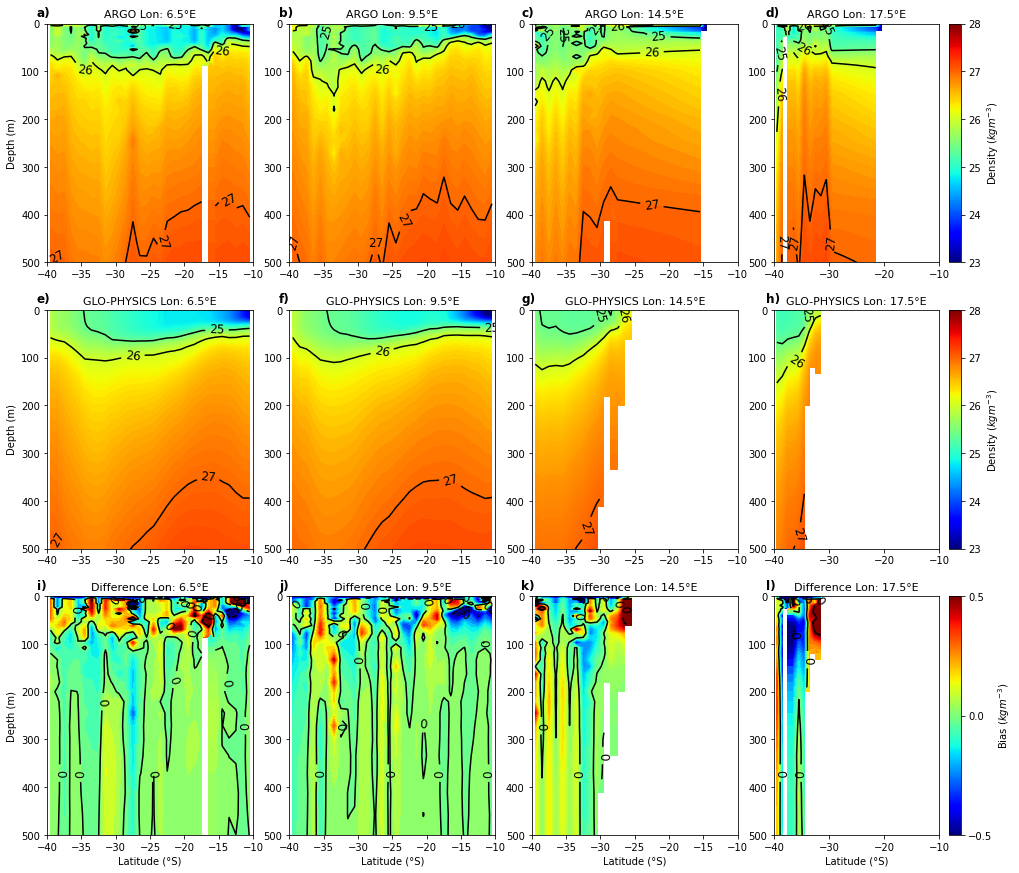

In [ ]:
import string
vmins= [23]*8 + [-0.5]*4 #limites inferiores replicados
vmaxs= [28]*8 + [0.5]*4 #limites superiores replicados
levelsx=[[25.4,26,27]]*8 +[[-0.5,0,0.5]]*4 #niveles a mostrar en el colorbar
ticks= np.array([23,24,25,26,27,28]) #labels para el colorbar de datos
ticks_dif= np.array([-0.5,0,0.5]) # ticks para colorbar de diferencia
prof= np.arange(0,600,1) # profundidades argo
prof_M= reanal.depth.values # profundidades modelo
lista_prof_ARGO=[prof_M]*4;lista_prof_ARGOX=[prof_M]*4;lista_prof_M=[prof_M]*4
lista_profs = lista_prof_ARGO + lista_prof_M +lista_prof_ARGOX
xts1=X_t[0,:]; yt1=Y_t[:,0] # coordenadas
lista_yt_ARGO= [yt1]*4;lista_yt_ARGOX= [yt1]*4;lista_yt_M= [yt1]*4
lista_yts=lista_yt_ARGO + lista_yt_M + lista_yt_ARGOX # agregar las tres listas
w=0.17;h=0.15
meses=['ARGO Lon: 6.5°E','ARGO Lon: 9.5°E','ARGO Lon: 14.5°E','ARGO Lon: 17.5°E',
       'GLO-PHYSICS Lon: 6.5°E','GLO-PHYSICS Lon: 9.5°E','GLO-PHYSICS Lon: 14.5°E','GLO-PHYSICS Lon: 17.5°E',
       'Difference Lon: 6.5°E','Difference Lon: 9.5°E','Difference Lon: 14.5°E','Difference Lon: 17.5°E']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.83,w,h],[0.2,0.83,w,h],[0.4,0.83,w,h],[0.6,0.83,w,h],
        [0,0.65,w,h],[0.2,0.65,w,h],[0.4,0.65,w,h],[0.6,0.65,w,h],
        [0,0.47,w,h],[0.2,0.47,w,h],[0.4,0.47,w,h],[0.6,0.47,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
##############################################################################################
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(-0.05,1.03,string.ascii_lowercase[j]+')',fontsize=12, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=11)
  # para la barra de colores
  cbar=ax.pcolormesh(lista_yts[j],lista_profs[j],lista_final_D[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], shading='flat')
  # para generar los contornos suavizados
  ax.contourf(lista_yts[j],lista_profs[j],lista_final_D[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], levels=100)
  cs=ax.contour(lista_yts[j],lista_profs[j],lista_final_D[j], levels=levelsx[j],colors='k')
  plt.clabel(cs,inline=True, fmt='%1.0f',fontsize=12, colors='k')
  ax.set_ylim([0,500]);ax.set_xlim([-40,-10]);plt.margins(x=0)
  plt.gca().invert_yaxis()
  if j==0:ax.set_ylabel('Depth (m)')
  elif j==3:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Density ($kg m^{-3}$)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==4:ax.set_ylabel('Depth (m)')
  elif j==7:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Density ($kg m^{-3}$)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==8:ax.set_ylabel('Depth (m)');ax.set_xlabel('Latitude (°S)')
  elif j in [9,10]:ax.set_xlabel('Latitude (°S)')
  elif j==11: ax.set_xlabel('Latitude (°S)');cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks_dif);cbar1.set_label('Bias ($kg m^{-3}$)', rotation=90)
plt.tight_layout()

**Temperatura**

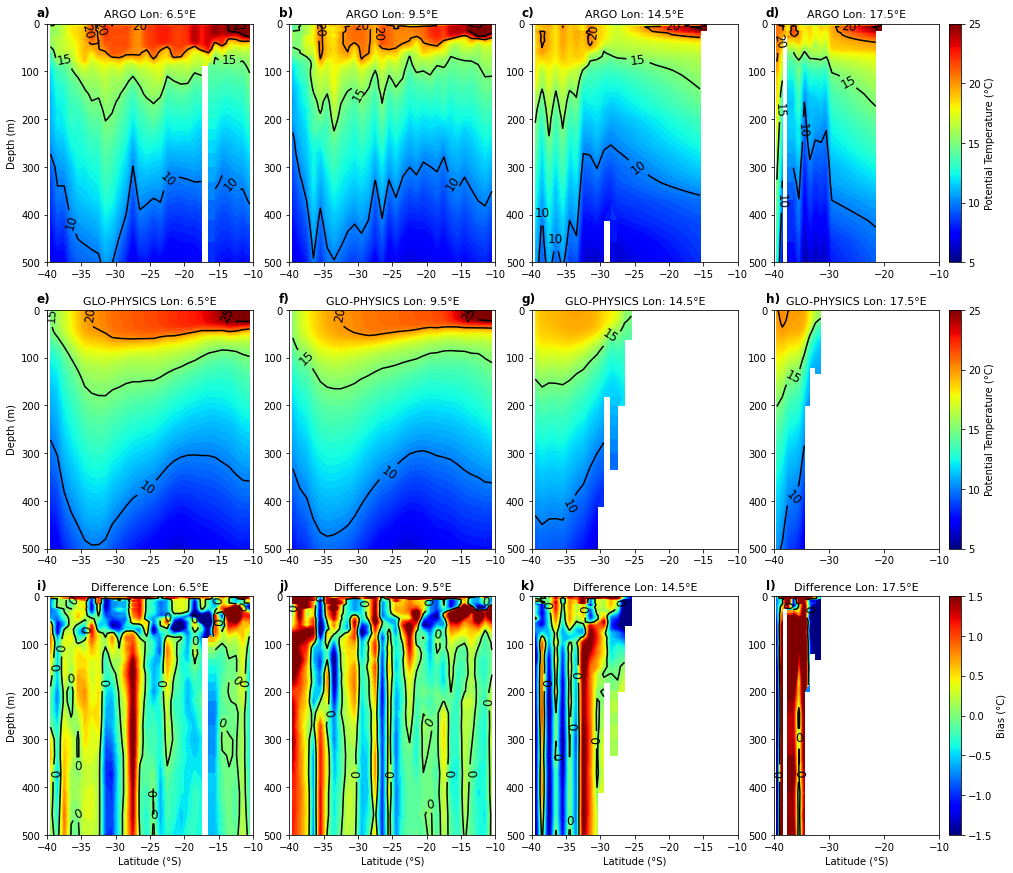

In [ ]:
import string
vmins= [5]*8 + [-1.5]*4 #limites inferiores replicados
vmaxs= [25]*8 + [1.5]*4 #limites superiores replicados
levelsx=[[5,10,15,20,25]]*8 +[[0]]*4 #niveles a mostrar en el colorbar
ticks= np.array([5,10,15,20,25]) #labels para el colorbar de datos
ticks_dif= np.array([-1.5,-1,-0.5,0,0.5,1,1.5]) # ticks para colorbar de diferencia
prof= np.arange(0,600,1) # profundidades argo
prof_M= reanal.depth.values # profundidades modelo
lista_prof_ARGO=[prof_M]*4;lista_prof_ARGOX=[prof_M]*4;lista_prof_M=[prof_M]*4
lista_profs = lista_prof_ARGO + lista_prof_M +lista_prof_ARGOX
xts1=X_t[0,:]; yt1=Y_t[:,0] # coordenadas
lista_yt_ARGO= [yt1]*4;lista_yt_ARGOX= [yt1]*4;lista_yt_M= [yt1]*4
lista_yts=lista_yt_ARGO + lista_yt_M + lista_yt_ARGOX # agregar las tres listas
w=0.17;h=0.15
meses=['ARGO Lon: 6.5°E','ARGO Lon: 9.5°E','ARGO Lon: 14.5°E','ARGO Lon: 17.5°E',
       'GLO-PHYSICS Lon: 6.5°E','GLO-PHYSICS Lon: 9.5°E','GLO-PHYSICS Lon: 14.5°E','GLO-PHYSICS Lon: 17.5°E',
       'Difference Lon: 6.5°E','Difference Lon: 9.5°E','Difference Lon: 14.5°E','Difference Lon: 17.5°E']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.83,w,h],[0.2,0.83,w,h],[0.4,0.83,w,h],[0.6,0.83,w,h],
        [0,0.65,w,h],[0.2,0.65,w,h],[0.4,0.65,w,h],[0.6,0.65,w,h],
        [0,0.47,w,h],[0.2,0.47,w,h],[0.4,0.47,w,h],[0.6,0.47,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
##############################################################################################
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(-0.05,1.03,string.ascii_lowercase[j]+')',fontsize=12, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=11)
  # para la barra de colores
  cbar=ax.pcolormesh(lista_yts[j],lista_profs[j],lista_final_T[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], shading='flat')
  # para generar los contornos suavizados
  ax.contourf(lista_yts[j],lista_profs[j],lista_final_T[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], levels=100)
  cs=ax.contour(lista_yts[j],lista_profs[j],lista_final_T[j], levels=levelsx[j],colors='k')
  plt.clabel(cs,inline=True, fmt='%1.0f',fontsize=12, colors='k')
  ax.set_ylim([0,500]);ax.set_xlim([-40,-10]);plt.margins(x=0)
  plt.gca().invert_yaxis()
  if j==0:ax.set_ylabel('Depth (m)')
  elif j==3:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Potential Temperature (°C)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==4:ax.set_ylabel('Depth (m)')
  elif j==7:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Potential Temperature (°C)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==8:ax.set_ylabel('Depth (m)');ax.set_xlabel('Latitude (°S)')
  elif j in [9,10]:ax.set_xlabel('Latitude (°S)')
  elif j==11: ax.set_xlabel('Latitude (°S)');cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks_dif);cbar1.set_label('Bias (°C)', rotation=90)
plt.tight_layout()

**Salinidad**

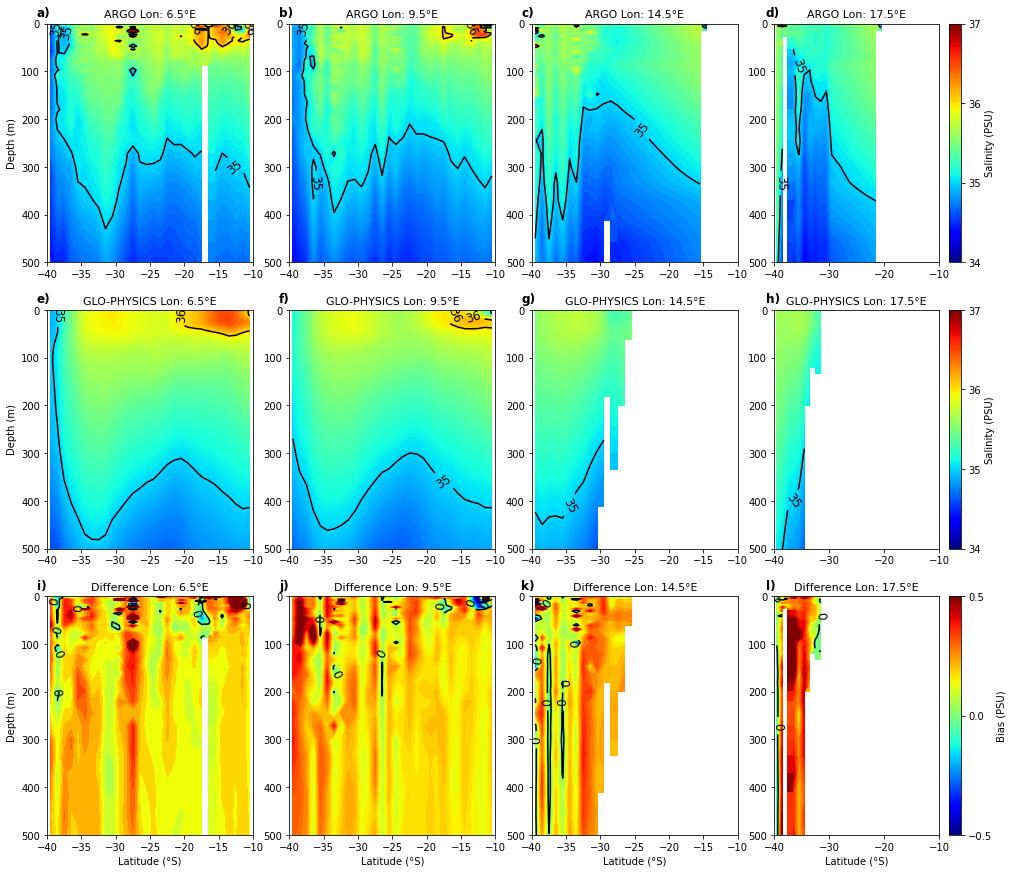

In [ ]:
import string
vmins= [34]*8 + [-0.5]*4 #limites inferiores replicados
vmaxs= [37]*8 + [0.5]*4 #limites superiores replicados
levelsx=[[33,34,35,36]]*8 +[[0]]*4 #niveles a mostrar en el colorbar
ticks= np.array([34,35,36,37]) #labels para el colorbar de datos
ticks_dif= np.array([-0.5,0,0.5]) # ticks para colorbar de diferencia
prof= np.arange(0,600,1) # profundidades argo
prof_M= reanal.depth.values # profundidades modelo
lista_prof_ARGO=[prof_M]*4;lista_prof_ARGOX=[prof_M]*4;lista_prof_M=[prof_M]*4
lista_profs = lista_prof_ARGO + lista_prof_M +lista_prof_ARGOX
xts1=X_t[0,:]; yt1=Y_t[:,0] # coordenadas
lista_yt_ARGO= [yt1]*4;lista_yt_ARGOX= [yt1]*4;lista_yt_M= [yt1]*4
lista_yts=lista_yt_ARGO + lista_yt_M + lista_yt_ARGOX # agregar las tres listas
w=0.17;h=0.15
meses=['ARGO Lon: 6.5°E','ARGO Lon: 9.5°E','ARGO Lon: 14.5°E','ARGO Lon: 17.5°E',
       'GLO-PHYSICS Lon: 6.5°E','GLO-PHYSICS Lon: 9.5°E','GLO-PHYSICS Lon: 14.5°E','GLO-PHYSICS Lon: 17.5°E',
       'Difference Lon: 6.5°E','Difference Lon: 9.5°E','Difference Lon: 14.5°E','Difference Lon: 17.5°E']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.83,w,h],[0.2,0.83,w,h],[0.4,0.83,w,h],[0.6,0.83,w,h],
        [0,0.65,w,h],[0.2,0.65,w,h],[0.4,0.65,w,h],[0.6,0.65,w,h],
        [0,0.47,w,h],[0.2,0.47,w,h],[0.4,0.47,w,h],[0.6,0.47,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
##############################################################################################
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(-0.05,1.03,string.ascii_lowercase[j]+')',fontsize=12, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=11)
  # para la barra de colores
  cbar=ax.pcolormesh(lista_yts[j],lista_profs[j],lista_final_S[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], shading='flat')
  # para generar los contornos suavizados
  ax.contourf(lista_yts[j],lista_profs[j],lista_final_S[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], levels=100)
  cs=ax.contour(lista_yts[j],lista_profs[j],lista_final_S[j], levels=levelsx[j],colors='k')
  plt.clabel(cs,inline=True, fmt='%1.0f',fontsize=12, colors='k')
  ax.set_ylim([0,500]);ax.set_xlim([-40,-10]);plt.margins(x=0)
  plt.gca().invert_yaxis()
  if j==0:ax.set_ylabel('Depth (m)')
  elif j==3:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Salinity (PSU)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==4:ax.set_ylabel('Depth (m)')
  elif j==7:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Salinity (PSU)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==8:ax.set_ylabel('Depth (m)');ax.set_xlabel('Latitude (°S)')
  elif j in [9,10]:ax.set_xlabel('Latitude (°S)')
  elif j==11: ax.set_xlabel('Latitude (°S)');cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks_dif);cbar1.set_label('Bias (PSU)', rotation=90)
plt.tight_layout()

### Longitudinales

In [ ]:
lista_ARGO_LAT_D=[]; lista_ARGO_LAT_S=[]; lista_ARGO_LAT_T=[]
lista_MODEL_LAT_D=[];lista_MODEL_LAT_S=[];lista_MODEL_LAT_T=[]
lista_ARGOX_LAT_D=[]; lista_ARGOX_LAT_S=[]; lista_ARGOX_LAT_T=[]
# datos_D, datos_S, datos_T = datos reales de argo con 600 niveles
lat_Y= [-11.5,-20.5,-29.5,-38.5]
for i in range(4):
  tran_lat_d=A_final.sel(lat=lat_Y[i]).D.values;tran_lat_s=A_final.sel(lat=lat_Y[i]).S.values;tran_lat_t=A_final.sel(lat=lat_Y[i]).T.values;
  tran_lat_M_d= M_final.sel(lat=lat_Y[i]).D.values
  tran_lat_M_s= M_final.sel(lat=lat_Y[i]).S.values
  tran_lat_M_t= M_final.sel(lat=lat_Y[i]).T.values
  tran_lat_dx=A_final.sel(lat=lat_Y[i]).D.values;tran_lat_sx=A_final.sel(lat=lat_Y[i]).S.values;tran_lat_tx=A_final.sel(lat=lat_Y[i]).T.values;
  lista_ARGO_LAT_D.append(tran_lat_d);lista_MODEL_LAT_D.append(tran_lat_M_d);lista_ARGOX_LAT_D.append((M_final.sel(lat=lat_Y[i]).D-A_final.sel(lat=lat_Y[i]).D).values)
  lista_ARGO_LAT_S.append(tran_lat_s);lista_MODEL_LAT_S.append(tran_lat_M_s);lista_ARGOX_LAT_S.append((M_final.sel(lat=lat_Y[i]).S-A_final.sel(lat=lat_Y[i]).S).values)
  lista_ARGO_LAT_T.append(tran_lat_t);lista_MODEL_LAT_T.append(tran_lat_M_t);lista_ARGOX_LAT_T.append((M_final.sel(lat=lat_Y[i]).T-A_final.sel(lat=lat_Y[i]).T).values)
lista_final_D= lista_ARGO_LAT_D+lista_MODEL_LAT_D + lista_ARGOX_LAT_D# acoplar las tres listas 
lista_final_D[0][lista_final_D[0]>27.10728928778205]= 27.10728928778205-0.2
lista_final_S= lista_ARGO_LAT_S+lista_MODEL_LAT_S+ lista_ARGOX_LAT_S # acoplar las tres listas 
lista_final_S[0][lista_final_S[0]>36]= 36-0.4
lista_final_T= lista_ARGO_LAT_T+lista_MODEL_LAT_T + lista_ARGOX_LAT_T# acoplar las tres listas 
print(len(lista_final_D),len(lista_final_T),len(lista_final_S))

12 12 12


**Densidad**

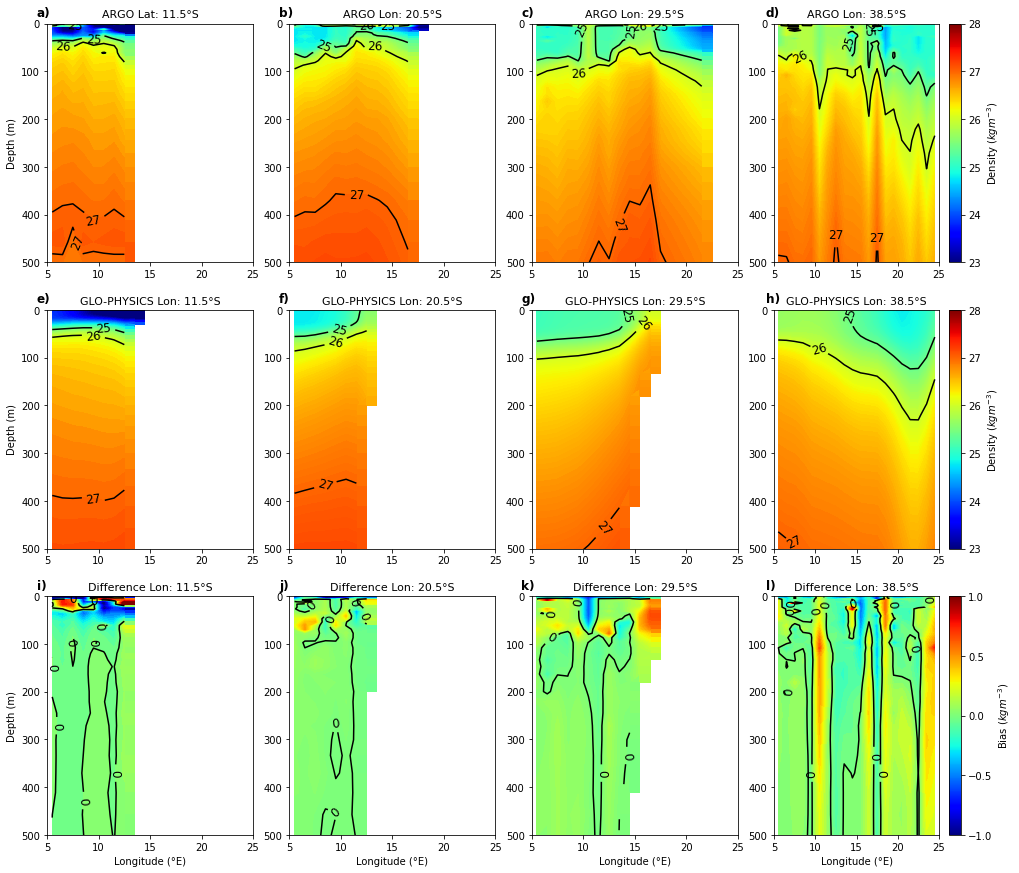

In [ ]:
import string
vmins= [23]*8 + [-1]*4 #limites inferiores replicados
vmaxs= [28]*8 + [1]*4 #limites superiores replicados
levelsx=[[25.4,26,27]]*8 +[[0]]*4 #niveles a mostrar en el colorbar
ticks= np.array([23,24,25,26,27,28]) #labels para el colorbar de datos
ticks_dif= np.array([-1,-0.5,0,0.5,1]) # ticks para colorbar de diferencia
prof= np.arange(0,600,1) # profundidades argo
prof_M= reanal.depth.values # profundidades modelo
lista_prof_ARGO=[prof_M]*4;lista_prof_ARGOX=[prof_M]*4;lista_prof_M=[prof_M]*4
lista_profs = lista_prof_ARGO + lista_prof_M +lista_prof_ARGOX
xts1=X_t[0,:]; yt1=Y_t[:,0] # coordenadas
lista_yt_ARGO= [xts1]*4;lista_yt_ARGOX= [xts1]*4;lista_yt_M= [xts1]*4
lista_yts=lista_yt_ARGO + lista_yt_M + lista_yt_ARGOX # agregar las tres listas
w=0.17;h=0.15
meses=['ARGO Lat: 11.5°S','ARGO Lon: 20.5°S','ARGO Lon: 29.5°S','ARGO Lon: 38.5°S',
       'GLO-PHYSICS Lon: 11.5°S','GLO-PHYSICS Lon: 20.5°S','GLO-PHYSICS Lon: 29.5°S','GLO-PHYSICS Lon: 38.5°S',
       'Difference Lon: 11.5°S','Difference Lon: 20.5°S','Difference Lon: 29.5°S','Difference Lon: 38.5°S']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.83,w,h],[0.2,0.83,w,h],[0.4,0.83,w,h],[0.6,0.83,w,h],
        [0,0.65,w,h],[0.2,0.65,w,h],[0.4,0.65,w,h],[0.6,0.65,w,h],
        [0,0.47,w,h],[0.2,0.47,w,h],[0.4,0.47,w,h],[0.6,0.47,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
##############################################################################################
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(-0.05,1.03,string.ascii_lowercase[j]+')',fontsize=12, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=11)
  # para la barra de colores
  cbar=ax.pcolormesh(lista_yts[j],lista_profs[j],lista_final_D[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], shading='flat')
  # para generar los contornos suavizados
  ax.contourf(lista_yts[j],lista_profs[j],lista_final_D[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], levels=100)
  cs=ax.contour(lista_yts[j],lista_profs[j],lista_final_D[j], levels=levelsx[j],colors='k')
  plt.clabel(cs,inline=True, fmt='%1.0f',fontsize=12, colors='k')
  ax.set_ylim([0,500]);ax.set_xlim([5,25]);plt.margins(x=0)
  plt.gca().invert_yaxis()
  if j==0:ax.set_ylabel('Depth (m)')
  elif j==3:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Density ($kg m^{-3}$)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==4:ax.set_ylabel('Depth (m)')
  elif j==7:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Density ($kg m^{-3}$)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==8:ax.set_ylabel('Depth (m)');ax.set_xlabel('Longitude (°E)')
  elif j in [9,10]:ax.set_xlabel('Longitude (°E)')
  elif j==11: ax.set_xlabel('Longitude (°E)');cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks_dif);cbar1.set_label('Bias ($kg m^{-3}$)', rotation=90)
plt.tight_layout()

**Temperatura**

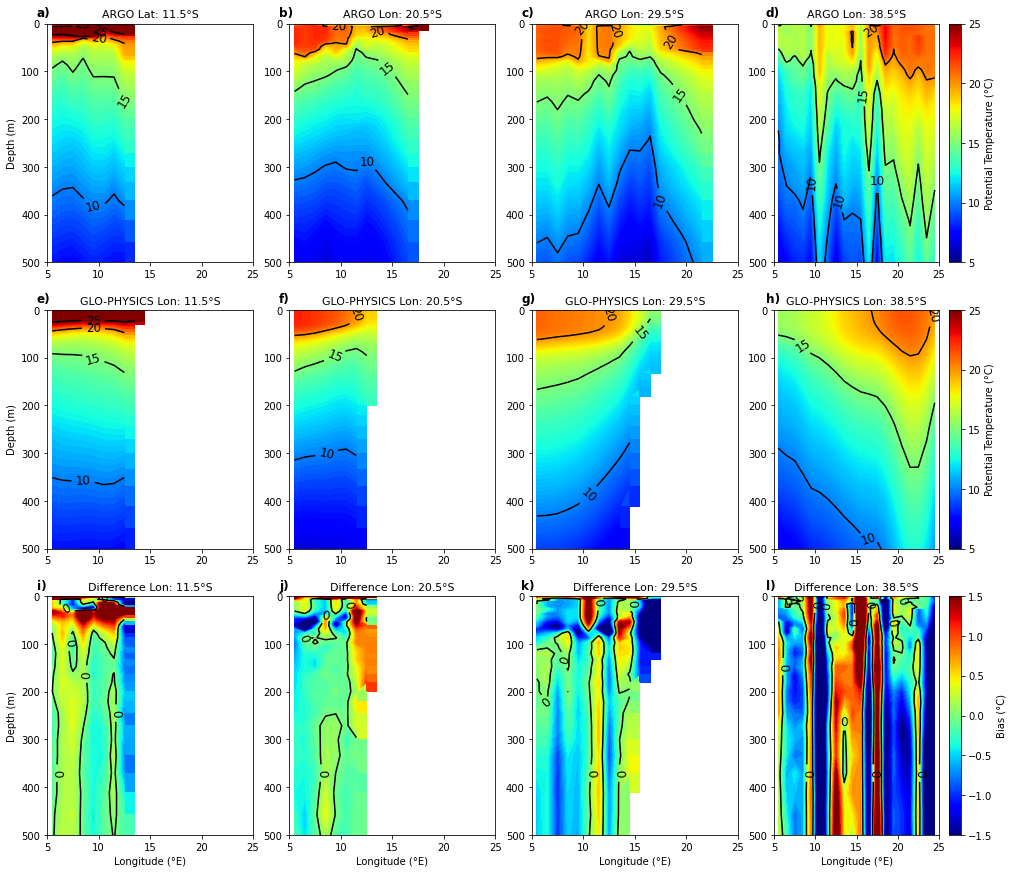

In [ ]:
import string
vmins= [5]*8 + [-1.5]*4 #limites inferiores replicados
vmaxs= [25]*8 + [1.5]*4 #limites superiores replicados
levelsx=[[5,10,15,20,25]]*8 +[[0]]*4 #niveles a mostrar en el colorbar
ticks= np.array([5,10,15,20,25]) #labels para el colorbar de datos
ticks_dif= np.array([-1.5,-1,-0.5,0,0.5,1,1.5]) # ticks para colorbar de diferencia
prof= np.arange(0,600,1) # profundidades argo
prof_M= reanal.depth.values # profundidades modelo
lista_prof_ARGO=[prof_M]*4;lista_prof_ARGOX=[prof_M]*4;lista_prof_M=[prof_M]*4
lista_profs = lista_prof_ARGO + lista_prof_M +lista_prof_ARGOX
xts1=X_t[0,:]; yt1=Y_t[:,0] # coordenadas
lista_yt_ARGO= [xts1]*4;lista_yt_ARGOX= [xts1]*4;lista_yt_M= [xts1]*4
lista_yts=lista_yt_ARGO + lista_yt_M + lista_yt_ARGOX # agregar las tres listas
w=0.17;h=0.15
meses=['ARGO Lat: 11.5°S','ARGO Lon: 20.5°S','ARGO Lon: 29.5°S','ARGO Lon: 38.5°S',
       'GLO-PHYSICS Lon: 11.5°S','GLO-PHYSICS Lon: 20.5°S','GLO-PHYSICS Lon: 29.5°S','GLO-PHYSICS Lon: 38.5°S',
       'Difference Lon: 11.5°S','Difference Lon: 20.5°S','Difference Lon: 29.5°S','Difference Lon: 38.5°S']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.83,w,h],[0.2,0.83,w,h],[0.4,0.83,w,h],[0.6,0.83,w,h],
        [0,0.65,w,h],[0.2,0.65,w,h],[0.4,0.65,w,h],[0.6,0.65,w,h],
        [0,0.47,w,h],[0.2,0.47,w,h],[0.4,0.47,w,h],[0.6,0.47,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
##############################################################################################
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(-0.05,1.03,string.ascii_lowercase[j]+')',fontsize=12, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=11)
  # para la barra de colores
  cbar=ax.pcolormesh(lista_yts[j],lista_profs[j],lista_final_T[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], shading='flat')
  # para generar los contornos suavizados
  ax.contourf(lista_yts[j],lista_profs[j],lista_final_T[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], levels=100)
  cs=ax.contour(lista_yts[j],lista_profs[j],lista_final_T[j], levels=levelsx[j],colors='k')
  plt.clabel(cs,inline=True, fmt='%1.0f',fontsize=12, colors='k')
  ax.set_ylim([0,500]);ax.set_xlim([5,25]);plt.margins(x=0)
  plt.gca().invert_yaxis()
  if j==0:ax.set_ylabel('Depth (m)')
  elif j==3:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Potential Temperature (°C)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==4:ax.set_ylabel('Depth (m)')
  elif j==7:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Potential Temperature (°C)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==8:ax.set_ylabel('Depth (m)');ax.set_xlabel('Longitude (°E)')
  elif j in [9,10]:ax.set_xlabel('Longitude (°E)')
  elif j==11: ax.set_xlabel('Longitude (°E)');cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks_dif);cbar1.set_label('Bias (°C)', rotation=90)
plt.tight_layout()

**Salinidad**

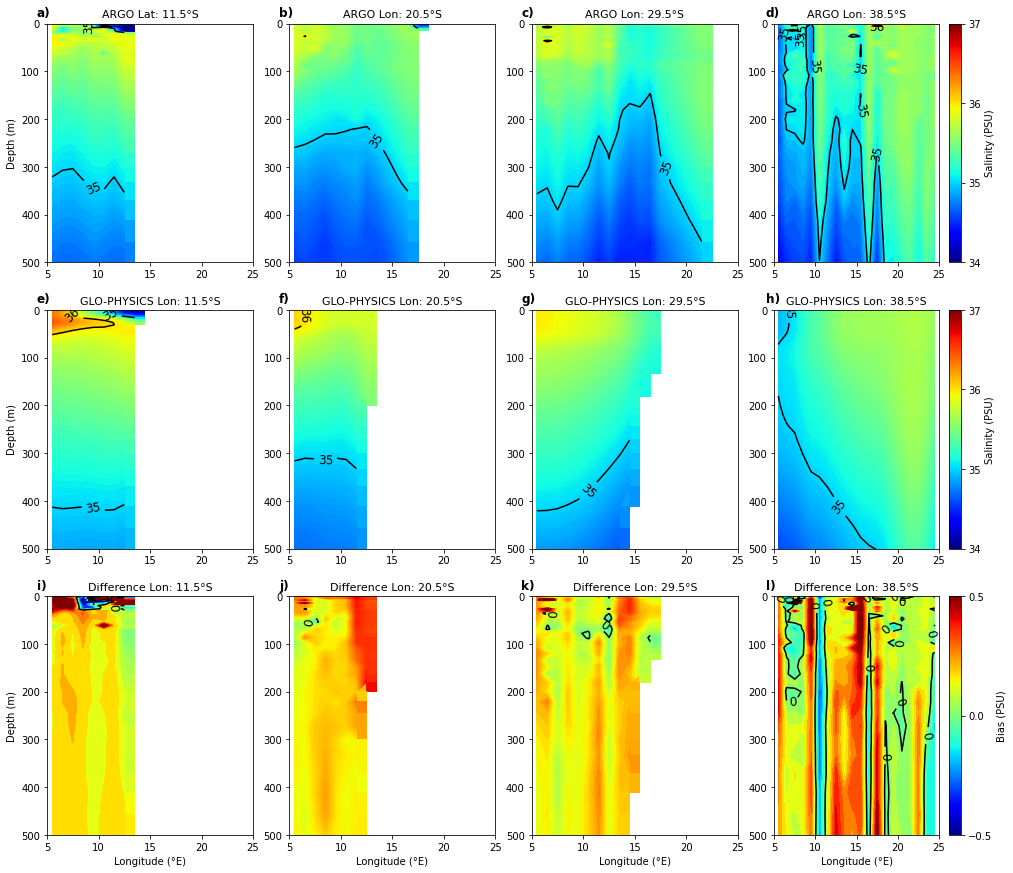

In [ ]:
import string
vmins= [34]*8 + [-0.5]*4 #limites inferiores replicados
vmaxs= [37]*8 + [0.5]*4 #limites superiores replicados
levelsx=[[33,34,35,36]]*8 +[[0]]*4 #niveles a mostrar en el colorbar
ticks= np.array([34,35,36,37]) #labels para el colorbar de datos
ticks_dif= np.array([-0.5,0,0.5]) # ticks para colorbar de diferencia
prof= np.arange(0,600,1) # profundidades argo
prof_M= reanal.depth.values # profundidades modelo
lista_prof_ARGO=[prof_M]*4;lista_prof_ARGOX=[prof_M]*4;lista_prof_M=[prof_M]*4
lista_profs = lista_prof_ARGO + lista_prof_M +lista_prof_ARGOX
xts1=X_t[0,:]; yt1=Y_t[:,0] # coordenadas
lista_yt_ARGO= [xts1]*4;lista_yt_ARGOX= [xts1]*4;lista_yt_M= [xts1]*4
lista_yts=lista_yt_ARGO + lista_yt_M + lista_yt_ARGOX # agregar las tres listas
w=0.17;h=0.15
meses=['ARGO Lat: 11.5°S','ARGO Lon: 20.5°S','ARGO Lon: 29.5°S','ARGO Lon: 38.5°S',
       'GLO-PHYSICS Lon: 11.5°S','GLO-PHYSICS Lon: 20.5°S','GLO-PHYSICS Lon: 29.5°S','GLO-PHYSICS Lon: 38.5°S',
       'Difference Lon: 11.5°S','Difference Lon: 20.5°S','Difference Lon: 29.5°S','Difference Lon: 38.5°S']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.83,w,h],[0.2,0.83,w,h],[0.4,0.83,w,h],[0.6,0.83,w,h],
        [0,0.65,w,h],[0.2,0.65,w,h],[0.4,0.65,w,h],[0.6,0.65,w,h],
        [0,0.47,w,h],[0.2,0.47,w,h],[0.4,0.47,w,h],[0.6,0.47,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
##############################################################################################
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(-0.05,1.03,string.ascii_lowercase[j]+')',fontsize=12, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=11)
  # para la barra de colores
  cbar=ax.pcolormesh(lista_yts[j],lista_profs[j],lista_final_S[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], shading='flat')
  # para generar los contornos suavizados
  ax.contourf(lista_yts[j],lista_profs[j],lista_final_S[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], levels=100)
  cs=ax.contour(lista_yts[j],lista_profs[j],lista_final_S[j], levels=levelsx[j],colors='k')
  plt.clabel(cs,inline=True, fmt='%1.0f',fontsize=12, colors='k')
  ax.set_ylim([0,500]);ax.set_xlim([5,25]);plt.margins(x=0)
  plt.gca().invert_yaxis()
  if j==0:ax.set_ylabel('Depth (m)')
  elif j==3:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Salinity (PSU)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==4:ax.set_ylabel('Depth (m)')
  elif j==7:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Salinity (PSU)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==8:ax.set_ylabel('Depth (m)');ax.set_xlabel('Longitude (°E)')
  elif j in [9,10]:ax.set_xlabel('Longitude (°E)')
  elif j==11: ax.set_xlabel('Longitude (°E)');cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks_dif);cbar1.set_label('Bias (PSU)', rotation=90)
plt.tight_layout()

### Diagramas de Taylor

In [ ]:
STD_D=[];CORRCOEF_D=[];RMSE_D=[]
STD_S=[];CORRCOEF_S=[];RMSE_S=[]
STD_T=[];CORRCOEF_T=[];RMSE_T=[]
for i in range(40):
  ###### DEN ######
  modelo= np.flipud(M_final.D.values[i,:,:]).flatten()
  satelite= A_final.D.values[i,:,:].flatten() # aplicar media en dimension tiempo
  IND = np.invert(np.isnan(satelite) | np.isnan(modelo)) # Sacar los indices que comparten en el espacio
  P = modelo[IND] # Modelo
  A = satelite[IND] # Referencia Era
  DD = np.ma.std(A.ravel()) # Desviacion estandar Referencia
  P = P/DD # Normalizacion por Std referencia
  A = A/DD 
  STD_D.append(np.ma.std(P.ravel()))
  CORRCOEF_D.append(np.ma.corrcoef(P.ravel(), A.ravel()).data[0,1])
  RMSE_D.append(np.sqrt(np.mean((P-A)**2)))
  ###### SAL ######
  modelo= np.flipud(M_final.S.values[i,:,:]).flatten()
  satelite= A_final.S.values[i,:,:].flatten() # aplicar media en dimension tiempo
  IND = np.invert(np.isnan(satelite) | np.isnan(modelo)) # Sacar los indices que comparten en el espacio
  P = modelo[IND] # Modelo
  A = satelite[IND] # Referencia Era
  DD = np.ma.std(A.ravel()) # Desviacion estandar Referencia
  P = P/DD # Normalizacion por Std referencia
  A = A/DD 
  STD_S.append(np.ma.std(P.ravel()))
  CORRCOEF_S.append(np.ma.corrcoef(P.ravel(), A.ravel()).data[0,1])
  RMSE_S.append(np.sqrt(np.mean((P-A)**2)))
  ###### TEMP ######
  modelo= np.flipud(M_final.T.values[i,:,:]).flatten()
  satelite= A_final.T.values[i,:,:].flatten() # aplicar media en dimension tiempo
  IND = np.invert(np.isnan(satelite) | np.isnan(modelo)) # Sacar los indices que comparten en el espacio
  P = modelo[IND] # Modelo
  A = satelite[IND] # Referencia Era
  DD = np.ma.std(A.ravel()) # Desviacion estandar Referencia
  P = P/DD # Normalizacion por Std referencia
  A = A/DD 
  STD_T.append(np.ma.std(P.ravel()))
  CORRCOEF_T.append(np.ma.corrcoef(P.ravel(), A.ravel()).data[0,1])
  RMSE_T.append(np.sqrt(np.mean((P-A)**2)))

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM


Text(1.0, 0.21, 'RMSE')

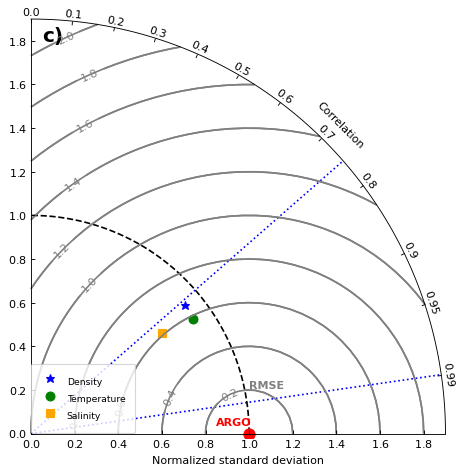

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/'
from taylorDiagram_mod import TaylorDiagram as TaDiM
import numpy as NP
figID_Taylor = plt.figure(num=11, dpi=80)
figID_Taylor.set_size_inches(7., 7.)
TayDia = TaDiM(1, fig=figID_Taylor, rect=111, srange=(0., 1.9), label='ARGO')
pp=[]
ttt=TayDia.add_sample(np.mean(STD_D), np.mean(CORRCOEF_D), marker="*", linestyle='None', color='blue', ms=8);pp.append(ttt)
ttt=TayDia.add_sample(np.mean(STD_T), np.mean(CORRCOEF_T), marker="o", linestyle='None', color='green', ms=8);pp.append(ttt)
ttt=TayDia.add_sample(np.mean(STD_S), np.mean(CORRCOEF_S)+0.1, marker="s", linestyle='None', color='orange', ms=8);pp.append(ttt)
contours = TayDia.add_contours(levels=10, colors='0.5')
contours = TayDia.add_contours(levels=10, colors='0.5')
plt.plot([0,NP.sqrt(1.9**2 -1.25**2)],[0,1.25], color='blue',linestyle=':') # correlacion 0.75
plt.plot([0,NP.sqrt(1.9**2 -0.27**2)],[0,0.27], color='blue',linestyle=':') # correlacion 0.99
TayDia.ax.clabel(contours, inline=1, fontsize=10, fmt='%.1f')
plt.legend(pp, ['Density','Temperature','Salinity'],  prop=dict(size='small'), loc='lower left', borderpad=1.0, ncol=1,handleheight=2.4, labelspacing=0.05) # numpoints=1,
plt.text(0.85,0.04,'ARGO', color='red',weight='bold')
#plt.text(0.85,0.35,'MMM', color='red',weight='bold')
plt.text(0.05,1.8,'c)', color='black',weight='bold', fontsize=18)
plt.text(1.00,0.21,'RMSE', color='gray',weight='bold')

## Validacion - JJA

In [ ]:
JJA= interpolador_capas(dataframe= lista_dfs[2], max_depth= 600, intervalo=1)
JJA

Tamaño de los dataframes generados : 4963
(2982162, 6)


Lon       Lat  Presion_interp   D_interp   T_interp   S_interp
0         5.00000 -37.72900               0  26.359824  12.666845  34.754838
1         5.00000 -37.72900               1  26.361210  12.655938  34.754313
2         5.00000 -37.72900               2  26.362595  12.645030  34.753788
3         5.00000 -37.72900               3  26.363981  12.634122  34.753262
4         5.00000 -37.72900               4  26.365367  12.623215  34.752737
...           ...       ...             ...        ...        ...        ...
2982157  24.98668 -37.11365             596  26.738654  11.604176  35.014437
2982158  24.98668 -37.11365             597  26.738901  11.599839  35.013667
2982159  24.98668 -37.11365             598  26.739154  11.596000  35.013058
2982160  24.98668 -37.11365             599        NaN        NaN        NaN
2982161  24.98668 -37.11365             600        NaN        NaN        NaN

[2982162 rows x 6 columns]

In [ ]:
import scipy
from scipy.interpolate import griddata
ds_final= JJA #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_jan_D = []
datos_jan_T = []
datos_jan_S = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(5+0.5,25+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-40+0.5, -10+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values_D=np.array(capa_x['D_interp'])
  values_T=np.array(capa_x['T_interp'])
  values_S=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0_D=griddata(points,values_D, (grid_x,grid_y),method='linear')
  grid_z0_T=griddata(points,values_T, (grid_x,grid_y),method='linear')
  grid_z0_S=griddata(points,values_S, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur-Norte
  grid_z0_1_D=np.flip(grid_z0_D, axis=0)
  grid_z0_1_T=np.flip(grid_z0_T, axis=0)
  grid_z0_1_S=np.flip(grid_z0_S, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_jan_D.append(grid_z0_1_D);datos_jan_T.append(grid_z0_1_T);datos_jan_S.append(grid_z0_1_S)
datos_D = np.stack(datos_jan_D);datos_T = np.stack(datos_jan_T);datos_S = np.stack(datos_jan_S)

In [ ]:
print(datos_D.shape,datos_T.shape,datos_S.shape)

(600, 30, 20) (600, 30, 20) (600, 30, 20)


In [ ]:
# Modelo data
T_DJF=np.mean(reanal.where(((reanal.month==6)|(reanal.month==7)|(reanal.month==8)), drop=True).CT.values,axis=0)
S_DJF=np.mean(reanal.where(((reanal.month==6)|(reanal.month==7)|(reanal.month==8)), drop=True).SA.values,axis=0)
D_DJF=np.mean(reanal.where(((reanal.month==6)|(reanal.month==7)|(reanal.month==8)), drop=True).D.values,axis=0)
print(T_DJF.shape, S_DJF.shape, D_DJF.shape)

(40, 121, 81) (40, 121, 81) (40, 121, 81)


In [ ]:
# Interpolar a todas las capas para la misma grilla
x1= np.arange(5+0.5, 25+0.5,1)
y1= list(np.arange(-40+0.5, -10+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
dat_D = []
dat_T = []
dat_S = []
for i in range(T_DJF.shape[0]):
  T_X=basemap.interp(datain=np.flipud(T_DJF[i,:,:]), xin=reanal.lon.values,
                       yin=reanal.lat.values,xout=X_t, yout=Y_t, order=1, masked= True)
  D_X=basemap.interp(datain=np.flipud(D_DJF[i,:,:]), xin=reanal.lon.values,
                       yin=reanal.lat.values,xout=X_t, yout=Y_t, order=1, masked= True)
  S_X=basemap.interp(datain=np.flipud(S_DJF[i,:,:]), xin=reanal.lon.values,
                       yin=reanal.lat.values,xout=X_t, yout=Y_t, order=1, masked= True)
  dat_D.append(D_X);dat_T.append(T_X);dat_S.append(S_X)
M_D = np.stack(dat_D);M_T = np.stack(dat_T);M_S = np.stack(dat_S)
print(M_D.shape, M_T.shape, M_S.shape)

(40, 30, 20) (40, 30, 20) (40, 30, 20)


<xarray.Dataset>
Dimensions:  (depth: 40, lat: 30, lon: 20)
Coordinates:
  * lon      (lon) float64 5.5 6.5 7.5 8.5 9.5 10.5 ... 20.5 21.5 22.5 23.5 24.5
  * lat      (lat) float64 -39.5 -38.5 -37.5 -36.5 ... -13.5 -12.5 -11.5 -10.5
  * depth    (depth) float32 0.5058 1.556 2.668 3.856 ... 411.8 457.6 508.6
Data variables:
    T        (depth, lat, lon) float64 12.04 12.31 12.51 12.88 ... nan nan nan
    S        (depth, lat, lon) float64 34.83 34.9 34.96 35.05 ... nan nan nan
    D        (depth, lat, lon) float64 26.37 26.37 26.37 26.37 ... nan nan nan

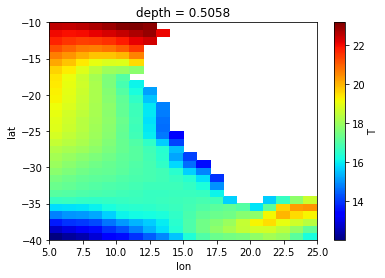

In [ ]:
M_final=dt=xr.Dataset(data_vars={"T":(['depth',"lat","lon"],M_T),"S":(['depth',"lat","lon"],M_S),"D":(['depth',"lat","lon"],M_D)}, 
                coords={"lon": np.arange(5+0.5, 25+0.5,1), 
                        "lat": np.arange(-40+0.5, -10+0.5,1), 
                        "depth": reanal.depth.values})
M_final.T.sel(depth=M_final.depth.values[0]).plot(cmap='jet')
M_final

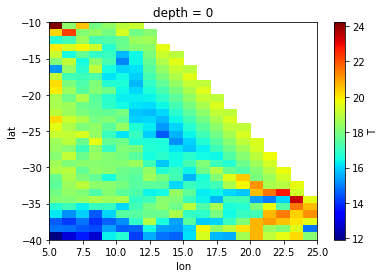

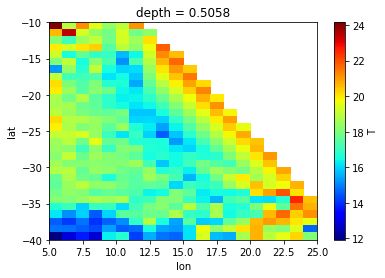

<xarray.Dataset>
Dimensions:  (depth: 40, lat: 30, lon: 20)
Coordinates:
  * lon      (lon) float64 5.5 6.5 7.5 8.5 9.5 10.5 ... 20.5 21.5 22.5 23.5 24.5
  * lat      (lat) float64 -10.5 -11.5 -12.5 -13.5 ... -36.5 -37.5 -38.5 -39.5
  * depth    (depth) float32 0.5058 1.556 2.668 3.856 ... 411.8 457.6 508.6
Data variables:
    T        (depth, lat, lon) float64 24.16 18.9 21.23 ... 12.13 13.64 9.956
    S        (depth, lat, lon) float64 35.85 35.76 35.8 ... 35.09 35.3 34.82
    D        (depth, lat, lon) float64 25.77 25.79 25.72 ... 26.69 26.56 26.85

In [ ]:
A_no_interp=xr.Dataset(data_vars={"T":(['depth',"lat","lon"],datos_T),"S":(['depth',"lat","lon"],datos_S),"D":(['depth',"lat","lon"],datos_D)}, 
                coords={"lon": np.arange(5+0.5, 25+0.5,1), 
                        "lat": np.array(list(np.arange(-40+0.5, -10+0.5,1))[::-1]), 
                        "depth": np.arange(0,600,1)})
A_final=xr.Dataset(data_vars={"T":(['depth',"lat","lon"],datos_T),"S":(['depth',"lat","lon"],datos_S),"D":(['depth',"lat","lon"],datos_D)}, 
                coords={"lon": np.arange(5+0.5, 25+0.5,1), 
                        "lat": np.array(list(np.arange(-40+0.5, -10+0.5,1))[::-1]), 
                        "depth": np.arange(0,600,1)}).interp(depth=reanal.depth.values)
A_no_interp.T.sel(depth=A_no_interp.depth.values[0]).plot(cmap='jet')
plt.show()
A_final.T.sel(depth=A_final.depth.values[0]).plot(cmap='jet')
plt.show()
A_final

### Graficas finales transectas

### Latitudinales

In [ ]:
lista_ARGO_LAT_D=[]; lista_ARGO_LAT_S=[]; lista_ARGO_LAT_T=[]
lista_MODEL_LAT_D=[];lista_MODEL_LAT_S=[];lista_MODEL_LAT_T=[]
lista_ARGOX_LAT_D=[]; lista_ARGOX_LAT_S=[]; lista_ARGOX_LAT_T=[]
# datos_D, datos_S, datos_T = datos reales de argo con 600 niveles
lon_Y= [6.5,9.5,14.5,17.5]
for i in range(4):
  tran_lat_d=A_final.sel(lon=lon_Y[i]).D.values;tran_lat_s=A_final.sel(lon=lon_Y[i]).S.values;tran_lat_t=A_final.sel(lon=lon_Y[i]).T.values;
  tran_lat_M_d= M_final.sel(lon=lon_Y[i]).D.values
  tran_lat_M_s= M_final.sel(lon=lon_Y[i]).S.values
  tran_lat_M_t= M_final.sel(lon=lon_Y[i]).T.values
  tran_lat_dx=A_final.sel(lon=lon_Y[i]).D.values;tran_lat_sx=A_final.sel(lon=lon_Y[i]).S.values;tran_lat_tx=A_final.sel(lon=lon_Y[i]).T.values;
  lista_ARGO_LAT_D.append(tran_lat_d);lista_MODEL_LAT_D.append(np.flip(tran_lat_M_d,axis=1));lista_ARGOX_LAT_D.append(np.flip((M_final.sel(lon=lon_Y[i]).D-A_final.sel(lon=lon_Y[i]).D).values,axis=1))
  lista_ARGO_LAT_S.append(tran_lat_s);lista_MODEL_LAT_S.append(np.flip(tran_lat_M_s,axis=1));lista_ARGOX_LAT_S.append(np.flip((M_final.sel(lon=lon_Y[i]).S-A_final.sel(lon=lon_Y[i]).S).values,axis=1))
  lista_ARGO_LAT_T.append(tran_lat_t);lista_MODEL_LAT_T.append(np.flip(tran_lat_M_t,axis=1));lista_ARGOX_LAT_T.append(np.flip((M_final.sel(lon=lon_Y[i]).T-A_final.sel(lon=lon_Y[i]).T).values,axis=1))
lista_final_D= lista_ARGO_LAT_D+lista_MODEL_LAT_D + lista_ARGOX_LAT_D# acoplar las tres listas 
lista_final_S= lista_ARGO_LAT_S+lista_MODEL_LAT_S+ lista_ARGOX_LAT_S # acoplar las tres listas 
lista_final_T= lista_ARGO_LAT_T+lista_MODEL_LAT_T + lista_ARGOX_LAT_T# acoplar las tres listas 
print(len(lista_final_D),len(lista_final_T),len(lista_final_S))

12 12 12


**Densidad**

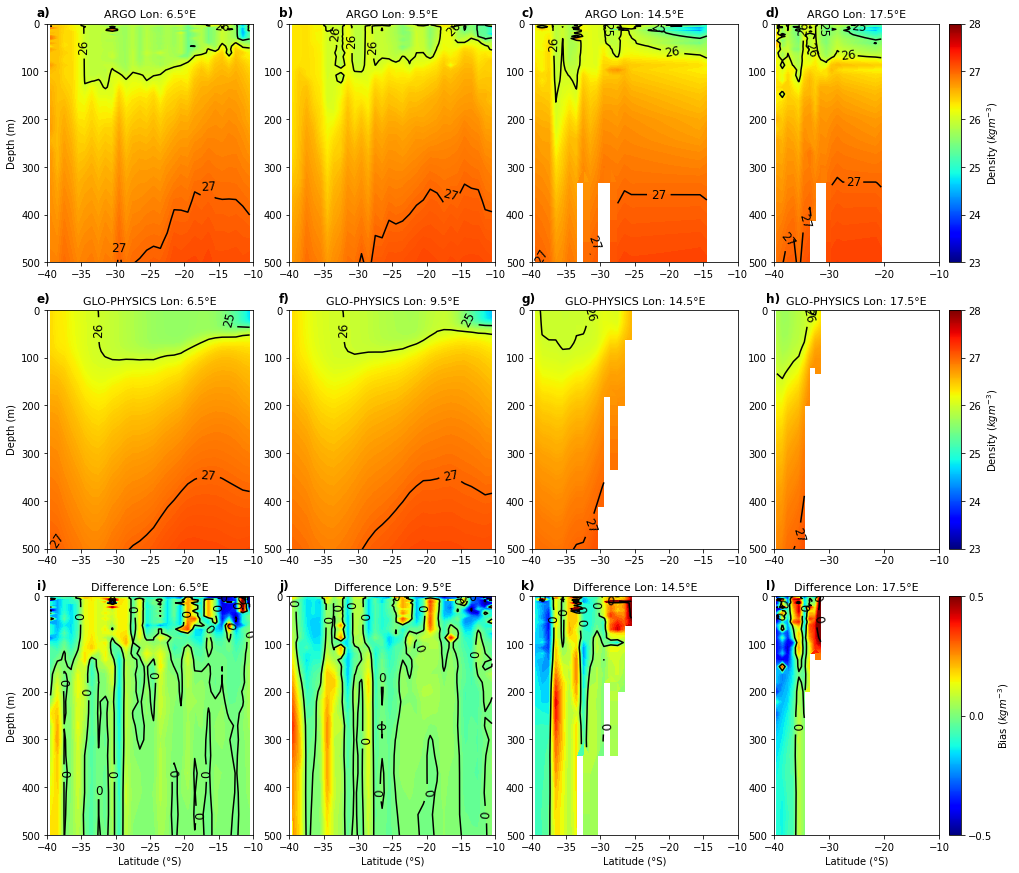

In [ ]:
import string
vmins= [23]*8 + [-0.5]*4 #limites inferiores replicados
vmaxs= [28]*8 + [0.5]*4 #limites superiores replicados
levelsx=[[25.4,26,27]]*8 +[[-0.5,0,0.5]]*4 #niveles a mostrar en el colorbar
ticks= np.array([23,24,25,26,27,28]) #labels para el colorbar de datos
ticks_dif= np.array([-0.5,0,0.5]) # ticks para colorbar de diferencia
prof= np.arange(0,600,1) # profundidades argo
prof_M= reanal.depth.values # profundidades modelo
lista_prof_ARGO=[prof_M]*4;lista_prof_ARGOX=[prof_M]*4;lista_prof_M=[prof_M]*4
lista_profs = lista_prof_ARGO + lista_prof_M +lista_prof_ARGOX
xts1=X_t[0,:]; yt1=Y_t[:,0] # coordenadas
lista_yt_ARGO= [yt1]*4;lista_yt_ARGOX= [yt1]*4;lista_yt_M= [yt1]*4
lista_yts=lista_yt_ARGO + lista_yt_M + lista_yt_ARGOX # agregar las tres listas
w=0.17;h=0.15
meses=['ARGO Lon: 6.5°E','ARGO Lon: 9.5°E','ARGO Lon: 14.5°E','ARGO Lon: 17.5°E',
       'GLO-PHYSICS Lon: 6.5°E','GLO-PHYSICS Lon: 9.5°E','GLO-PHYSICS Lon: 14.5°E','GLO-PHYSICS Lon: 17.5°E',
       'Difference Lon: 6.5°E','Difference Lon: 9.5°E','Difference Lon: 14.5°E','Difference Lon: 17.5°E']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.83,w,h],[0.2,0.83,w,h],[0.4,0.83,w,h],[0.6,0.83,w,h],
        [0,0.65,w,h],[0.2,0.65,w,h],[0.4,0.65,w,h],[0.6,0.65,w,h],
        [0,0.47,w,h],[0.2,0.47,w,h],[0.4,0.47,w,h],[0.6,0.47,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
##############################################################################################
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(-0.05,1.03,string.ascii_lowercase[j]+')',fontsize=12, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=11)
  # para la barra de colores
  cbar=ax.pcolormesh(lista_yts[j],lista_profs[j],lista_final_D[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], shading='flat')
  # para generar los contornos suavizados
  ax.contourf(lista_yts[j],lista_profs[j],lista_final_D[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], levels=100)
  cs=ax.contour(lista_yts[j],lista_profs[j],lista_final_D[j], levels=levelsx[j],colors='k')
  plt.clabel(cs,inline=True, fmt='%1.0f',fontsize=12, colors='k')
  ax.set_ylim([0,500]);ax.set_xlim([-40,-10]);plt.margins(x=0)
  plt.gca().invert_yaxis()
  if j==0:ax.set_ylabel('Depth (m)')
  elif j==3:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Density ($kg m^{-3}$)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==4:ax.set_ylabel('Depth (m)')
  elif j==7:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Density ($kg m^{-3}$)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==8:ax.set_ylabel('Depth (m)');ax.set_xlabel('Latitude (°S)')
  elif j in [9,10]:ax.set_xlabel('Latitude (°S)')
  elif j==11: ax.set_xlabel('Latitude (°S)');cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks_dif);cbar1.set_label('Bias ($kg m^{-3}$)', rotation=90)
plt.tight_layout()

**Temperatura**

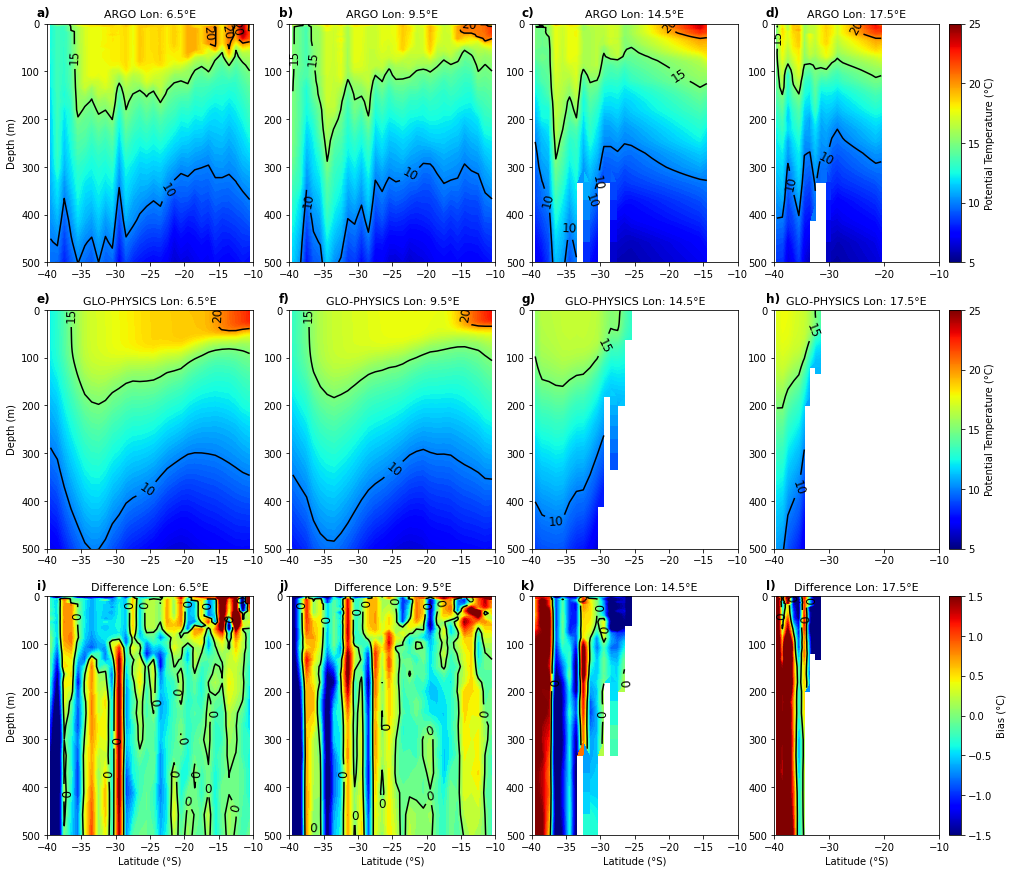

In [ ]:
import string
vmins= [5]*8 + [-1.5]*4 #limites inferiores replicados
vmaxs= [25]*8 + [1.5]*4 #limites superiores replicados
levelsx=[[5,10,15,20,25]]*8 +[[0]]*4 #niveles a mostrar en el colorbar
ticks= np.array([5,10,15,20,25]) #labels para el colorbar de datos
ticks_dif= np.array([-1.5,-1,-0.5,0,0.5,1,1.5]) # ticks para colorbar de diferencia
prof= np.arange(0,600,1) # profundidades argo
prof_M= reanal.depth.values # profundidades modelo
lista_prof_ARGO=[prof_M]*4;lista_prof_ARGOX=[prof_M]*4;lista_prof_M=[prof_M]*4
lista_profs = lista_prof_ARGO + lista_prof_M +lista_prof_ARGOX
xts1=X_t[0,:]; yt1=Y_t[:,0] # coordenadas
lista_yt_ARGO= [yt1]*4;lista_yt_ARGOX= [yt1]*4;lista_yt_M= [yt1]*4
lista_yts=lista_yt_ARGO + lista_yt_M + lista_yt_ARGOX # agregar las tres listas
w=0.17;h=0.15
meses=['ARGO Lon: 6.5°E','ARGO Lon: 9.5°E','ARGO Lon: 14.5°E','ARGO Lon: 17.5°E',
       'GLO-PHYSICS Lon: 6.5°E','GLO-PHYSICS Lon: 9.5°E','GLO-PHYSICS Lon: 14.5°E','GLO-PHYSICS Lon: 17.5°E',
       'Difference Lon: 6.5°E','Difference Lon: 9.5°E','Difference Lon: 14.5°E','Difference Lon: 17.5°E']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.83,w,h],[0.2,0.83,w,h],[0.4,0.83,w,h],[0.6,0.83,w,h],
        [0,0.65,w,h],[0.2,0.65,w,h],[0.4,0.65,w,h],[0.6,0.65,w,h],
        [0,0.47,w,h],[0.2,0.47,w,h],[0.4,0.47,w,h],[0.6,0.47,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
##############################################################################################
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(-0.05,1.03,string.ascii_lowercase[j]+')',fontsize=12, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=11)
  # para la barra de colores
  cbar=ax.pcolormesh(lista_yts[j],lista_profs[j],lista_final_T[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], shading='flat')
  # para generar los contornos suavizados
  ax.contourf(lista_yts[j],lista_profs[j],lista_final_T[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], levels=100)
  cs=ax.contour(lista_yts[j],lista_profs[j],lista_final_T[j], levels=levelsx[j],colors='k')
  plt.clabel(cs,inline=True, fmt='%1.0f',fontsize=12, colors='k')
  ax.set_ylim([0,500]);ax.set_xlim([-40,-10]);plt.margins(x=0)
  plt.gca().invert_yaxis()
  if j==0:ax.set_ylabel('Depth (m)')
  elif j==3:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Potential Temperature (°C)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==4:ax.set_ylabel('Depth (m)')
  elif j==7:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Potential Temperature (°C)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==8:ax.set_ylabel('Depth (m)');ax.set_xlabel('Latitude (°S)')
  elif j in [9,10]:ax.set_xlabel('Latitude (°S)')
  elif j==11: ax.set_xlabel('Latitude (°S)');cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks_dif);cbar1.set_label('Bias (°C)', rotation=90)
plt.tight_layout()

**Salinidad**

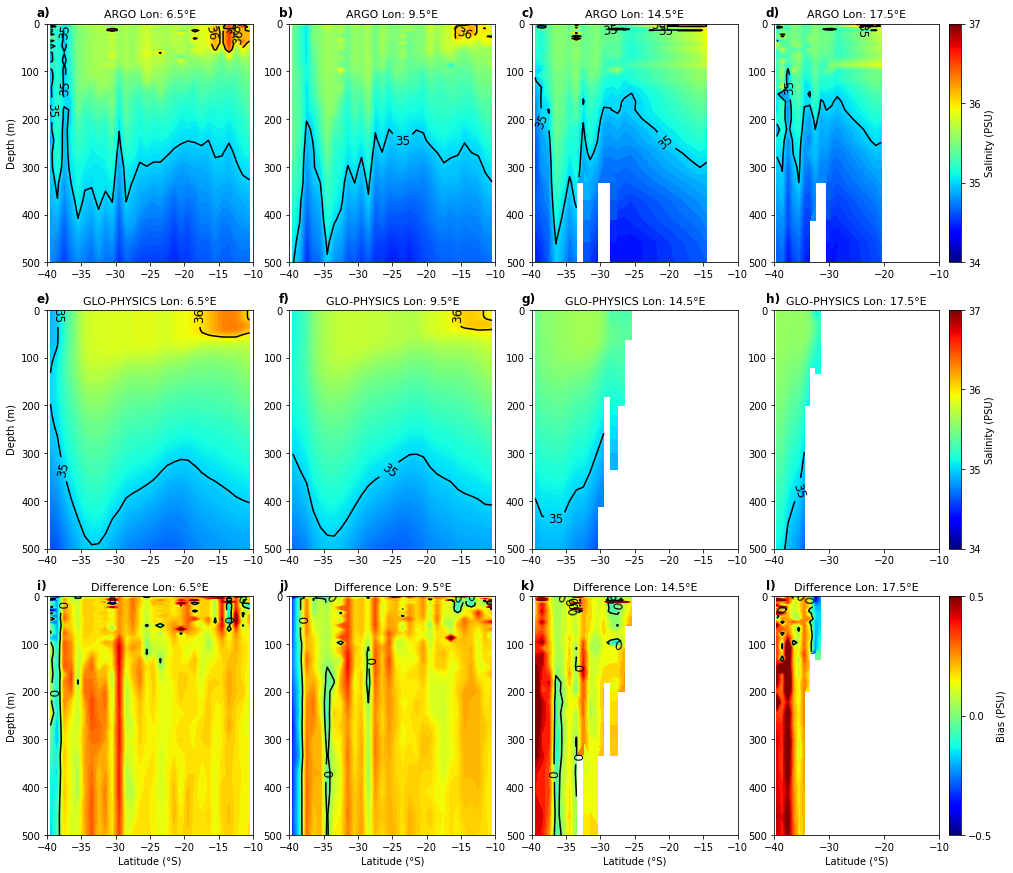

In [ ]:
import string
vmins= [34]*8 + [-0.5]*4 #limites inferiores replicados
vmaxs= [37]*8 + [0.5]*4 #limites superiores replicados
levelsx=[[33,34,35,36]]*8 +[[0]]*4 #niveles a mostrar en el colorbar
ticks= np.array([34,35,36,37]) #labels para el colorbar de datos
ticks_dif= np.array([-0.5,0,0.5]) # ticks para colorbar de diferencia
prof= np.arange(0,600,1) # profundidades argo
prof_M= reanal.depth.values # profundidades modelo
lista_prof_ARGO=[prof_M]*4;lista_prof_ARGOX=[prof_M]*4;lista_prof_M=[prof_M]*4
lista_profs = lista_prof_ARGO + lista_prof_M +lista_prof_ARGOX
xts1=X_t[0,:]; yt1=Y_t[:,0] # coordenadas
lista_yt_ARGO= [yt1]*4;lista_yt_ARGOX= [yt1]*4;lista_yt_M= [yt1]*4
lista_yts=lista_yt_ARGO + lista_yt_M + lista_yt_ARGOX # agregar las tres listas
w=0.17;h=0.15
meses=['ARGO Lon: 6.5°E','ARGO Lon: 9.5°E','ARGO Lon: 14.5°E','ARGO Lon: 17.5°E',
       'GLO-PHYSICS Lon: 6.5°E','GLO-PHYSICS Lon: 9.5°E','GLO-PHYSICS Lon: 14.5°E','GLO-PHYSICS Lon: 17.5°E',
       'Difference Lon: 6.5°E','Difference Lon: 9.5°E','Difference Lon: 14.5°E','Difference Lon: 17.5°E']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.83,w,h],[0.2,0.83,w,h],[0.4,0.83,w,h],[0.6,0.83,w,h],
        [0,0.65,w,h],[0.2,0.65,w,h],[0.4,0.65,w,h],[0.6,0.65,w,h],
        [0,0.47,w,h],[0.2,0.47,w,h],[0.4,0.47,w,h],[0.6,0.47,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
##############################################################################################
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(-0.05,1.03,string.ascii_lowercase[j]+')',fontsize=12, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=11)
  # para la barra de colores
  cbar=ax.pcolormesh(lista_yts[j],lista_profs[j],lista_final_S[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], shading='flat')
  # para generar los contornos suavizados
  ax.contourf(lista_yts[j],lista_profs[j],lista_final_S[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], levels=100)
  cs=ax.contour(lista_yts[j],lista_profs[j],lista_final_S[j], levels=levelsx[j],colors='k')
  plt.clabel(cs,inline=True, fmt='%1.0f',fontsize=12, colors='k')
  ax.set_ylim([0,500]);ax.set_xlim([-40,-10]);plt.margins(x=0)
  plt.gca().invert_yaxis()
  if j==0:ax.set_ylabel('Depth (m)')
  elif j==3:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Salinity (PSU)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==4:ax.set_ylabel('Depth (m)')
  elif j==7:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Salinity (PSU)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==8:ax.set_ylabel('Depth (m)');ax.set_xlabel('Latitude (°S)')
  elif j in [9,10]:ax.set_xlabel('Latitude (°S)')
  elif j==11: ax.set_xlabel('Latitude (°S)');cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks_dif);cbar1.set_label('Bias (PSU)', rotation=90)
plt.tight_layout()

### Longitudinales

In [ ]:
lista_ARGO_LAT_D=[]; lista_ARGO_LAT_S=[]; lista_ARGO_LAT_T=[]
lista_MODEL_LAT_D=[];lista_MODEL_LAT_S=[];lista_MODEL_LAT_T=[]
lista_ARGOX_LAT_D=[]; lista_ARGOX_LAT_S=[]; lista_ARGOX_LAT_T=[]
# datos_D, datos_S, datos_T = datos reales de argo con 600 niveles
lat_Y= [-11.5,-20.5,-29.5,-38.5]
for i in range(4):
  tran_lat_d=A_final.sel(lat=lat_Y[i]).D.values;tran_lat_s=A_final.sel(lat=lat_Y[i]).S.values;tran_lat_t=A_final.sel(lat=lat_Y[i]).T.values;
  tran_lat_M_d= M_final.sel(lat=lat_Y[i]).D.values
  tran_lat_M_s= M_final.sel(lat=lat_Y[i]).S.values
  tran_lat_M_t= M_final.sel(lat=lat_Y[i]).T.values
  tran_lat_dx=A_final.sel(lat=lat_Y[i]).D.values;tran_lat_sx=A_final.sel(lat=lat_Y[i]).S.values;tran_lat_tx=A_final.sel(lat=lat_Y[i]).T.values;
  lista_ARGO_LAT_D.append(tran_lat_d);lista_MODEL_LAT_D.append(tran_lat_M_d);lista_ARGOX_LAT_D.append((M_final.sel(lat=lat_Y[i]).D-A_final.sel(lat=lat_Y[i]).D).values)
  lista_ARGO_LAT_S.append(tran_lat_s);lista_MODEL_LAT_S.append(tran_lat_M_s);lista_ARGOX_LAT_S.append((M_final.sel(lat=lat_Y[i]).S-A_final.sel(lat=lat_Y[i]).S).values)
  lista_ARGO_LAT_T.append(tran_lat_t);lista_MODEL_LAT_T.append(tran_lat_M_t);lista_ARGOX_LAT_T.append((M_final.sel(lat=lat_Y[i]).T-A_final.sel(lat=lat_Y[i]).T).values)
lista_final_D= lista_ARGO_LAT_D+lista_MODEL_LAT_D + lista_ARGOX_LAT_D# acoplar las tres listas 
lista_final_D[0][lista_final_D[0]>27.10728928778205]= 27.10728928778205-0.2
lista_final_S= lista_ARGO_LAT_S+lista_MODEL_LAT_S+ lista_ARGOX_LAT_S # acoplar las tres listas 
lista_final_S[0][lista_final_S[0]>36]= 36-0.4
lista_final_T= lista_ARGO_LAT_T+lista_MODEL_LAT_T + lista_ARGOX_LAT_T# acoplar las tres listas 
print(len(lista_final_D),len(lista_final_T),len(lista_final_S))

12 12 12


**Densidad**

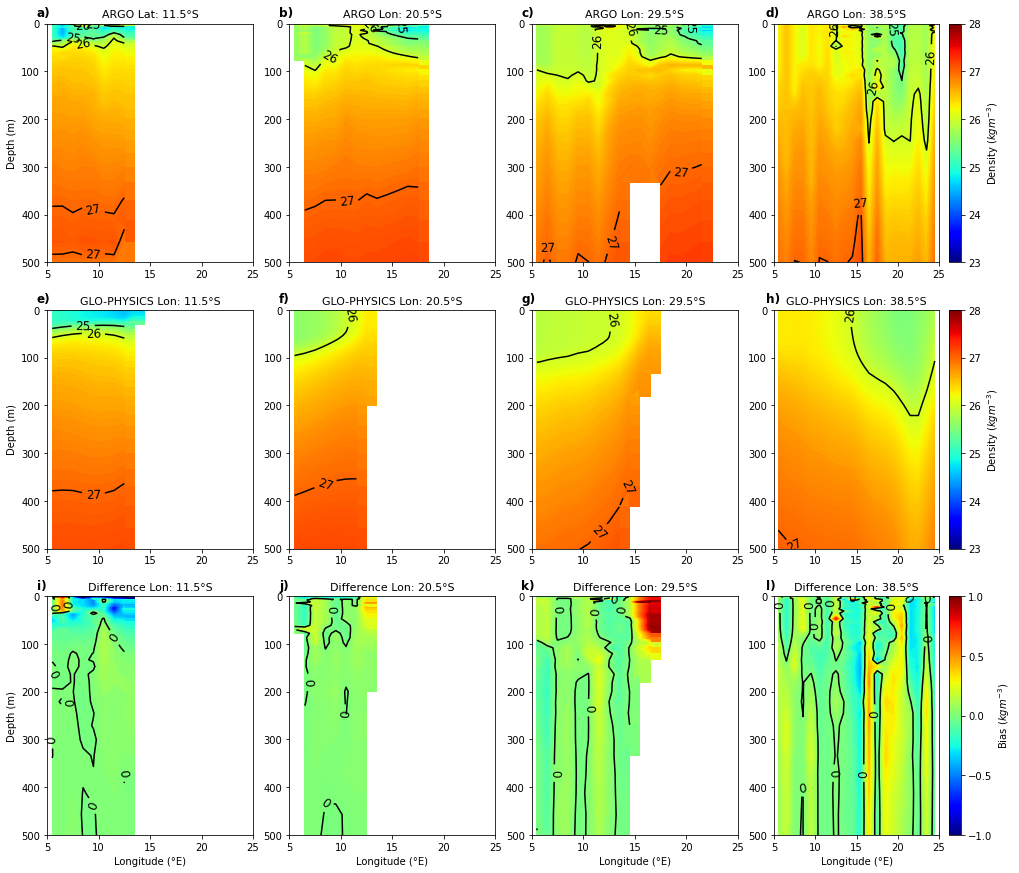

In [63]:
import string
vmins= [23]*8 + [-1]*4 #limites inferiores replicados
vmaxs= [28]*8 + [1]*4 #limites superiores replicados
levelsx=[[25.4,26,27]]*8 +[[0]]*4 #niveles a mostrar en el colorbar
ticks= np.array([23,24,25,26,27,28]) #labels para el colorbar de datos
ticks_dif= np.array([-1,-0.5,0,0.5,1]) # ticks para colorbar de diferencia
prof= np.arange(0,600,1) # profundidades argo
prof_M= reanal.depth.values # profundidades modelo
lista_prof_ARGO=[prof_M]*4;lista_prof_ARGOX=[prof_M]*4;lista_prof_M=[prof_M]*4
lista_profs = lista_prof_ARGO + lista_prof_M +lista_prof_ARGOX
xts1=X_t[0,:]; yt1=Y_t[:,0] # coordenadas
lista_yt_ARGO= [xts1]*4;lista_yt_ARGOX= [xts1]*4;lista_yt_M= [xts1]*4
lista_yts=lista_yt_ARGO + lista_yt_M + lista_yt_ARGOX # agregar las tres listas
w=0.17;h=0.15
meses=['ARGO Lat: 11.5°S','ARGO Lon: 20.5°S','ARGO Lon: 29.5°S','ARGO Lon: 38.5°S',
       'GLO-PHYSICS Lon: 11.5°S','GLO-PHYSICS Lon: 20.5°S','GLO-PHYSICS Lon: 29.5°S','GLO-PHYSICS Lon: 38.5°S',
       'Difference Lon: 11.5°S','Difference Lon: 20.5°S','Difference Lon: 29.5°S','Difference Lon: 38.5°S']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.83,w,h],[0.2,0.83,w,h],[0.4,0.83,w,h],[0.6,0.83,w,h],
        [0,0.65,w,h],[0.2,0.65,w,h],[0.4,0.65,w,h],[0.6,0.65,w,h],
        [0,0.47,w,h],[0.2,0.47,w,h],[0.4,0.47,w,h],[0.6,0.47,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
##############################################################################################
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(-0.05,1.03,string.ascii_lowercase[j]+')',fontsize=12, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=11)
  # para la barra de colores
  cbar=ax.pcolormesh(lista_yts[j],lista_profs[j],lista_final_D[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], shading='flat')
  # para generar los contornos suavizados
  ax.contourf(lista_yts[j],lista_profs[j],lista_final_D[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], levels=100)
  cs=ax.contour(lista_yts[j],lista_profs[j],lista_final_D[j], levels=levelsx[j],colors='k')
  plt.clabel(cs,inline=True, fmt='%1.0f',fontsize=12, colors='k')
  ax.set_ylim([0,500]);ax.set_xlim([5,25]);plt.margins(x=0)
  plt.gca().invert_yaxis()
  if j==0:ax.set_ylabel('Depth (m)')
  elif j==3:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Density ($kg m^{-3}$)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==4:ax.set_ylabel('Depth (m)')
  elif j==7:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Density ($kg m^{-3}$)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==8:ax.set_ylabel('Depth (m)');ax.set_xlabel('Longitude (°E)')
  elif j in [9,10]:ax.set_xlabel('Longitude (°E)')
  elif j==11: ax.set_xlabel('Longitude (°E)');cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks_dif);cbar1.set_label('Bias ($kg m^{-3}$)', rotation=90)
plt.tight_layout()

**Temperatura**

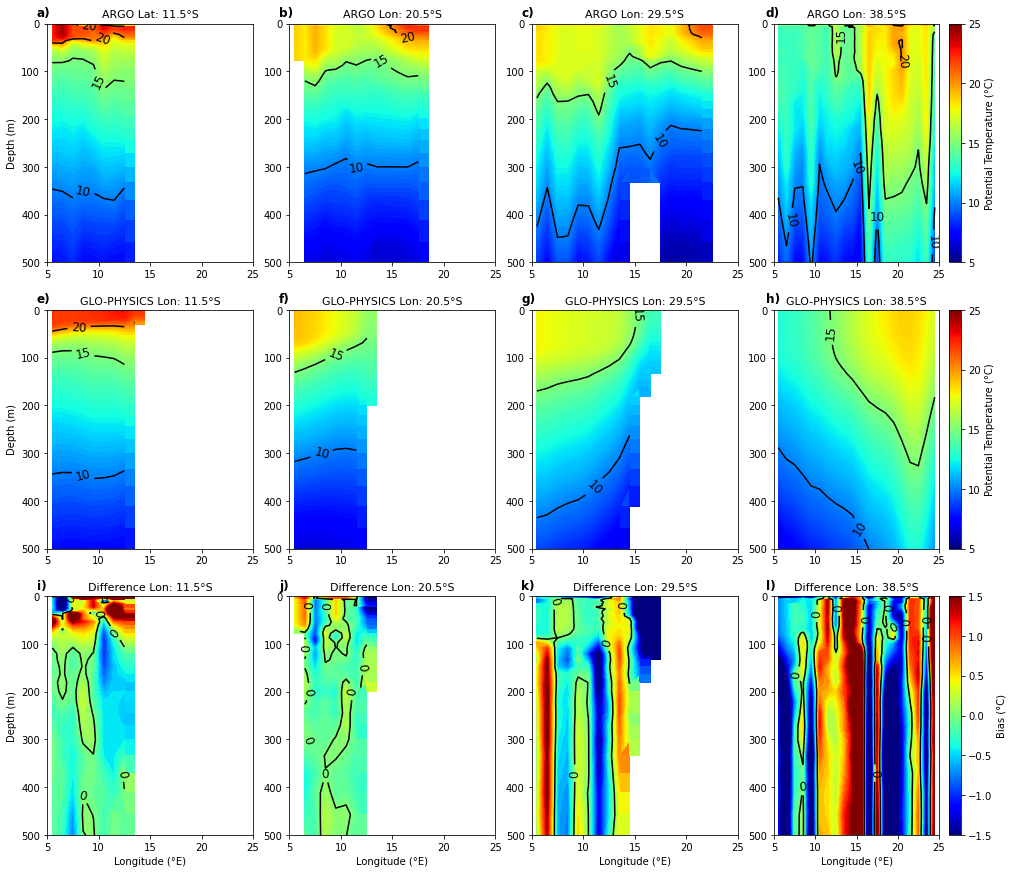

In [64]:
import string
vmins= [5]*8 + [-1.5]*4 #limites inferiores replicados
vmaxs= [25]*8 + [1.5]*4 #limites superiores replicados
levelsx=[[5,10,15,20,25]]*8 +[[0]]*4 #niveles a mostrar en el colorbar
ticks= np.array([5,10,15,20,25]) #labels para el colorbar de datos
ticks_dif= np.array([-1.5,-1,-0.5,0,0.5,1,1.5]) # ticks para colorbar de diferencia
prof= np.arange(0,600,1) # profundidades argo
prof_M= reanal.depth.values # profundidades modelo
lista_prof_ARGO=[prof_M]*4;lista_prof_ARGOX=[prof_M]*4;lista_prof_M=[prof_M]*4
lista_profs = lista_prof_ARGO + lista_prof_M +lista_prof_ARGOX
xts1=X_t[0,:]; yt1=Y_t[:,0] # coordenadas
lista_yt_ARGO= [xts1]*4;lista_yt_ARGOX= [xts1]*4;lista_yt_M= [xts1]*4
lista_yts=lista_yt_ARGO + lista_yt_M + lista_yt_ARGOX # agregar las tres listas
w=0.17;h=0.15
meses=['ARGO Lat: 11.5°S','ARGO Lon: 20.5°S','ARGO Lon: 29.5°S','ARGO Lon: 38.5°S',
       'GLO-PHYSICS Lon: 11.5°S','GLO-PHYSICS Lon: 20.5°S','GLO-PHYSICS Lon: 29.5°S','GLO-PHYSICS Lon: 38.5°S',
       'Difference Lon: 11.5°S','Difference Lon: 20.5°S','Difference Lon: 29.5°S','Difference Lon: 38.5°S']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.83,w,h],[0.2,0.83,w,h],[0.4,0.83,w,h],[0.6,0.83,w,h],
        [0,0.65,w,h],[0.2,0.65,w,h],[0.4,0.65,w,h],[0.6,0.65,w,h],
        [0,0.47,w,h],[0.2,0.47,w,h],[0.4,0.47,w,h],[0.6,0.47,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
##############################################################################################
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(-0.05,1.03,string.ascii_lowercase[j]+')',fontsize=12, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=11)
  # para la barra de colores
  cbar=ax.pcolormesh(lista_yts[j],lista_profs[j],lista_final_T[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], shading='flat')
  # para generar los contornos suavizados
  ax.contourf(lista_yts[j],lista_profs[j],lista_final_T[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], levels=100)
  cs=ax.contour(lista_yts[j],lista_profs[j],lista_final_T[j], levels=levelsx[j],colors='k')
  plt.clabel(cs,inline=True, fmt='%1.0f',fontsize=12, colors='k')
  ax.set_ylim([0,500]);ax.set_xlim([5,25]);plt.margins(x=0)
  plt.gca().invert_yaxis()
  if j==0:ax.set_ylabel('Depth (m)')
  elif j==3:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Potential Temperature (°C)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==4:ax.set_ylabel('Depth (m)')
  elif j==7:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Potential Temperature (°C)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==8:ax.set_ylabel('Depth (m)');ax.set_xlabel('Longitude (°E)')
  elif j in [9,10]:ax.set_xlabel('Longitude (°E)')
  elif j==11: ax.set_xlabel('Longitude (°E)');cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks_dif);cbar1.set_label('Bias (°C)', rotation=90)
plt.tight_layout()

**Salinidad**

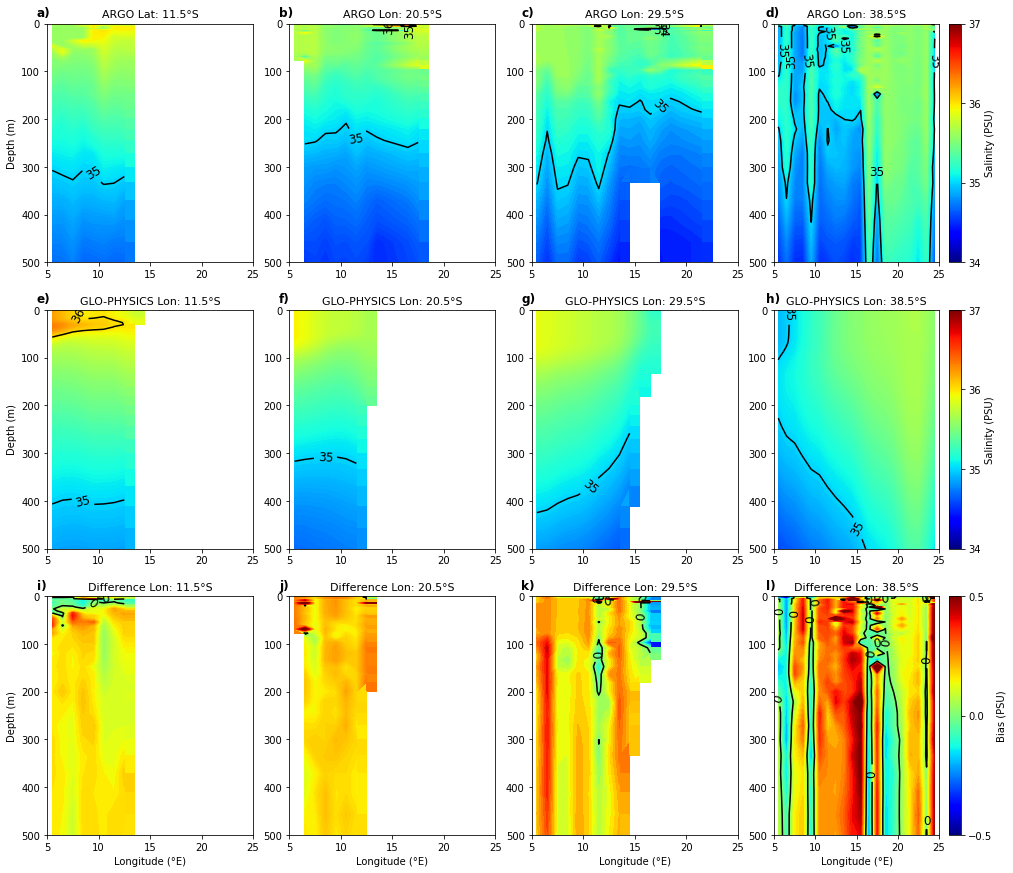

In [65]:
import string
vmins= [34]*8 + [-0.5]*4 #limites inferiores replicados
vmaxs= [37]*8 + [0.5]*4 #limites superiores replicados
levelsx=[[33,34,35,36]]*8 +[[0]]*4 #niveles a mostrar en el colorbar
ticks= np.array([34,35,36,37]) #labels para el colorbar de datos
ticks_dif= np.array([-0.5,0,0.5]) # ticks para colorbar de diferencia
prof= np.arange(0,600,1) # profundidades argo
prof_M= reanal.depth.values # profundidades modelo
lista_prof_ARGO=[prof_M]*4;lista_prof_ARGOX=[prof_M]*4;lista_prof_M=[prof_M]*4
lista_profs = lista_prof_ARGO + lista_prof_M +lista_prof_ARGOX
xts1=X_t[0,:]; yt1=Y_t[:,0] # coordenadas
lista_yt_ARGO= [xts1]*4;lista_yt_ARGOX= [xts1]*4;lista_yt_M= [xts1]*4
lista_yts=lista_yt_ARGO + lista_yt_M + lista_yt_ARGOX # agregar las tres listas
w=0.17;h=0.15
meses=['ARGO Lat: 11.5°S','ARGO Lon: 20.5°S','ARGO Lon: 29.5°S','ARGO Lon: 38.5°S',
       'GLO-PHYSICS Lon: 11.5°S','GLO-PHYSICS Lon: 20.5°S','GLO-PHYSICS Lon: 29.5°S','GLO-PHYSICS Lon: 38.5°S',
       'Difference Lon: 11.5°S','Difference Lon: 20.5°S','Difference Lon: 29.5°S','Difference Lon: 38.5°S']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.83,w,h],[0.2,0.83,w,h],[0.4,0.83,w,h],[0.6,0.83,w,h],
        [0,0.65,w,h],[0.2,0.65,w,h],[0.4,0.65,w,h],[0.6,0.65,w,h],
        [0,0.47,w,h],[0.2,0.47,w,h],[0.4,0.47,w,h],[0.6,0.47,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
##############################################################################################
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(-0.05,1.03,string.ascii_lowercase[j]+')',fontsize=12, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=11)
  # para la barra de colores
  cbar=ax.pcolormesh(lista_yts[j],lista_profs[j],lista_final_S[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], shading='flat')
  # para generar los contornos suavizados
  ax.contourf(lista_yts[j],lista_profs[j],lista_final_S[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], levels=100)
  cs=ax.contour(lista_yts[j],lista_profs[j],lista_final_S[j], levels=levelsx[j],colors='k')
  plt.clabel(cs,inline=True, fmt='%1.0f',fontsize=12, colors='k')
  ax.set_ylim([0,500]);ax.set_xlim([5,25]);plt.margins(x=0)
  plt.gca().invert_yaxis()
  if j==0:ax.set_ylabel('Depth (m)')
  elif j==3:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Salinity (PSU)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==4:ax.set_ylabel('Depth (m)')
  elif j==7:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Salinity (PSU)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==8:ax.set_ylabel('Depth (m)');ax.set_xlabel('Longitude (°E)')
  elif j in [9,10]:ax.set_xlabel('Longitude (°E)')
  elif j==11: ax.set_xlabel('Longitude (°E)');cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks_dif);cbar1.set_label('Bias (PSU)', rotation=90)
plt.tight_layout()

### Diagramas de Taylor

In [66]:
STD_D=[];CORRCOEF_D=[];RMSE_D=[]
STD_S=[];CORRCOEF_S=[];RMSE_S=[]
STD_T=[];CORRCOEF_T=[];RMSE_T=[]
for i in range(40):
  ###### DEN ######
  modelo= np.flipud(M_final.D.values[i,:,:]).flatten()
  satelite= A_final.D.values[i,:,:].flatten() # aplicar media en dimension tiempo
  IND = np.invert(np.isnan(satelite) | np.isnan(modelo)) # Sacar los indices que comparten en el espacio
  P = modelo[IND] # Modelo
  A = satelite[IND] # Referencia Era
  DD = np.ma.std(A.ravel()) # Desviacion estandar Referencia
  P = P/DD # Normalizacion por Std referencia
  A = A/DD 
  STD_D.append(np.ma.std(P.ravel()))
  CORRCOEF_D.append(np.ma.corrcoef(P.ravel(), A.ravel()).data[0,1])
  RMSE_D.append(np.sqrt(np.mean((P-A)**2)))
  ###### SAL ######
  modelo= np.flipud(M_final.S.values[i,:,:]).flatten()
  satelite= A_final.S.values[i,:,:].flatten() # aplicar media en dimension tiempo
  IND = np.invert(np.isnan(satelite) | np.isnan(modelo)) # Sacar los indices que comparten en el espacio
  P = modelo[IND] # Modelo
  A = satelite[IND] # Referencia Era
  DD = np.ma.std(A.ravel()) # Desviacion estandar Referencia
  P = P/DD # Normalizacion por Std referencia
  A = A/DD 
  STD_S.append(np.ma.std(P.ravel()))
  CORRCOEF_S.append(np.ma.corrcoef(P.ravel(), A.ravel()).data[0,1])
  RMSE_S.append(np.sqrt(np.mean((P-A)**2)))
  ###### TEMP ######
  modelo= np.flipud(M_final.T.values[i,:,:]).flatten()
  satelite= A_final.T.values[i,:,:].flatten() # aplicar media en dimension tiempo
  IND = np.invert(np.isnan(satelite) | np.isnan(modelo)) # Sacar los indices que comparten en el espacio
  P = modelo[IND] # Modelo
  A = satelite[IND] # Referencia Era
  DD = np.ma.std(A.ravel()) # Desviacion estandar Referencia
  P = P/DD # Normalizacion por Std referencia
  A = A/DD 
  STD_T.append(np.ma.std(P.ravel()))
  CORRCOEF_T.append(np.ma.corrcoef(P.ravel(), A.ravel()).data[0,1])
  RMSE_T.append(np.sqrt(np.mean((P-A)**2)))

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM


Text(1.0, 0.21, 'RMSE')

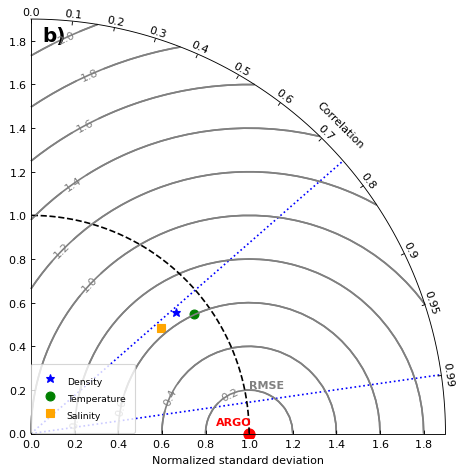

In [67]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/'
from taylorDiagram_mod import TaylorDiagram as TaDiM
import numpy as NP
figID_Taylor = plt.figure(num=11, dpi=80)
figID_Taylor.set_size_inches(7., 7.)
TayDia = TaDiM(1, fig=figID_Taylor, rect=111, srange=(0., 1.9), label='ARGO')
pp=[]
ttt=TayDia.add_sample(np.mean(STD_D), np.mean(CORRCOEF_D)+0.02, marker="*", linestyle='None', color='blue', ms=8);pp.append(ttt)
ttt=TayDia.add_sample(np.mean(STD_T), np.mean(CORRCOEF_T), marker="o", linestyle='None', color='green', ms=8);pp.append(ttt)
ttt=TayDia.add_sample(np.mean(STD_S), np.mean(CORRCOEF_S)+0.07, marker="s", linestyle='None', color='orange', ms=8);pp.append(ttt)
contours = TayDia.add_contours(levels=10, colors='0.5')
contours = TayDia.add_contours(levels=10, colors='0.5')
plt.plot([0,NP.sqrt(1.9**2 -1.25**2)],[0,1.25], color='blue',linestyle=':') # correlacion 0.75
plt.plot([0,NP.sqrt(1.9**2 -0.27**2)],[0,0.27], color='blue',linestyle=':') # correlacion 0.99
TayDia.ax.clabel(contours, inline=1, fontsize=10, fmt='%.1f')
plt.legend(pp, ['Density','Temperature','Salinity'],  prop=dict(size='small'), loc='lower left', borderpad=1.0, ncol=1,handleheight=2.4, labelspacing=0.05) # numpoints=1,
plt.text(0.85,0.04,'ARGO', color='red',weight='bold')
#plt.text(0.85,0.35,'MMM', color='red',weight='bold')
plt.text(0.05,1.8,'b)', color='black',weight='bold', fontsize=18)
plt.text(1.00,0.21,'RMSE', color='gray',weight='bold')

## Validacion-SON

In [68]:
SON= interpolador_capas(dataframe= lista_dfs[3], max_depth= 600, intervalo=1)
SON

Tamaño de los dataframes generados : 4862
(2922062, 6)


Lon     Lat  Presion_interp   D_interp   T_interp   S_interp
0         5.000 -11.221               0  26.161214  18.868757  35.739552
1         5.000 -11.221               1  26.163350  18.833138  35.737326
2         5.000 -11.221               2  26.165486  18.797518  35.735100
3         5.000 -11.221               3  26.167622  18.761898  35.732874
4         5.000 -11.221               4  26.169758  18.726278  35.730648
...         ...     ...             ...        ...        ...        ...
2922057  24.975 -37.064             596        NaN        NaN        NaN
2922058  24.975 -37.064             597        NaN        NaN        NaN
2922059  24.975 -37.064             598        NaN        NaN        NaN
2922060  24.975 -37.064             599        NaN        NaN        NaN
2922061  24.975 -37.064             600        NaN        NaN        NaN

[2922062 rows x 6 columns]

In [69]:
import scipy
from scipy.interpolate import griddata
ds_final= SON #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_jan_D = []
datos_jan_T = []
datos_jan_S = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(5+0.5,25+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-40+0.5, -10+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values_D=np.array(capa_x['D_interp'])
  values_T=np.array(capa_x['T_interp'])
  values_S=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0_D=griddata(points,values_D, (grid_x,grid_y),method='linear')
  grid_z0_T=griddata(points,values_T, (grid_x,grid_y),method='linear')
  grid_z0_S=griddata(points,values_S, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur-Norte
  grid_z0_1_D=np.flip(grid_z0_D, axis=0)
  grid_z0_1_T=np.flip(grid_z0_T, axis=0)
  grid_z0_1_S=np.flip(grid_z0_S, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_jan_D.append(grid_z0_1_D);datos_jan_T.append(grid_z0_1_T);datos_jan_S.append(grid_z0_1_S)
datos_D = np.stack(datos_jan_D);datos_T = np.stack(datos_jan_T);datos_S = np.stack(datos_jan_S)

In [70]:
print(datos_D.shape,datos_T.shape,datos_S.shape)

(600, 30, 20) (600, 30, 20) (600, 30, 20)


In [71]:
# Modelo data
T_DJF=np.mean(reanal.where(((reanal.month==9)|(reanal.month==10)|(reanal.month==11)), drop=True).CT.values,axis=0)
S_DJF=np.mean(reanal.where(((reanal.month==9)|(reanal.month==10)|(reanal.month==11)), drop=True).SA.values,axis=0)
D_DJF=np.mean(reanal.where(((reanal.month==9)|(reanal.month==10)|(reanal.month==11)), drop=True).D.values,axis=0)
print(T_DJF.shape, S_DJF.shape, D_DJF.shape)

(40, 121, 81) (40, 121, 81) (40, 121, 81)


In [72]:
# Interpolar a todas las capas para la misma grilla
x1= np.arange(5+0.5, 25+0.5,1)
y1= list(np.arange(-40+0.5, -10+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
dat_D = []
dat_T = []
dat_S = []
for i in range(T_DJF.shape[0]):
  T_X=basemap.interp(datain=np.flipud(T_DJF[i,:,:]), xin=reanal.lon.values,
                       yin=reanal.lat.values,xout=X_t, yout=Y_t, order=1, masked= True)
  D_X=basemap.interp(datain=np.flipud(D_DJF[i,:,:]), xin=reanal.lon.values,
                       yin=reanal.lat.values,xout=X_t, yout=Y_t, order=1, masked= True)
  S_X=basemap.interp(datain=np.flipud(S_DJF[i,:,:]), xin=reanal.lon.values,
                       yin=reanal.lat.values,xout=X_t, yout=Y_t, order=1, masked= True)
  dat_D.append(D_X);dat_T.append(T_X);dat_S.append(S_X)
M_D = np.stack(dat_D);M_T = np.stack(dat_T);M_S = np.stack(dat_S)
print(M_D.shape, M_T.shape, M_S.shape)

(40, 30, 20) (40, 30, 20) (40, 30, 20)


<xarray.Dataset>
Dimensions:  (depth: 40, lat: 30, lon: 20)
Coordinates:
  * lon      (lon) float64 5.5 6.5 7.5 8.5 9.5 10.5 ... 20.5 21.5 22.5 23.5 24.5
  * lat      (lat) float64 -39.5 -38.5 -37.5 -36.5 ... -13.5 -12.5 -11.5 -10.5
  * depth    (depth) float32 0.5058 1.556 2.668 3.856 ... 411.8 457.6 508.6
Data variables:
    T        (depth, lat, lon) float64 11.78 11.9 12.08 12.27 ... nan nan nan
    S        (depth, lat, lon) float64 34.84 34.88 34.93 35.0 ... nan nan nan
    D        (depth, lat, lon) float64 26.42 26.43 26.44 26.45 ... nan nan nan

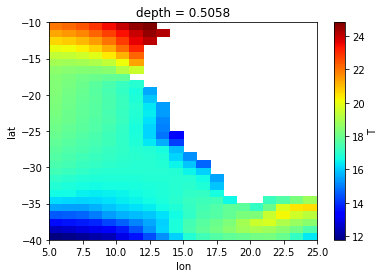

In [73]:
M_final=dt=xr.Dataset(data_vars={"T":(['depth',"lat","lon"],M_T),"S":(['depth',"lat","lon"],M_S),"D":(['depth',"lat","lon"],M_D)}, 
                coords={"lon": np.arange(5+0.5, 25+0.5,1), 
                        "lat": np.arange(-40+0.5, -10+0.5,1), 
                        "depth": reanal.depth.values})
M_final.T.sel(depth=M_final.depth.values[0]).plot(cmap='jet')
M_final

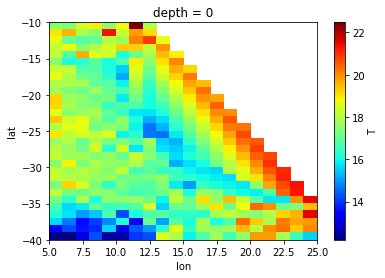

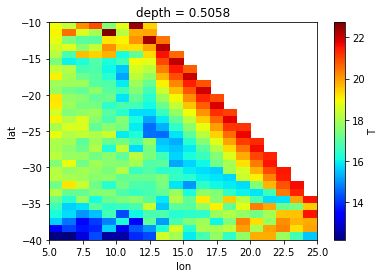

<xarray.Dataset>
Dimensions:  (depth: 40, lat: 30, lon: 20)
Coordinates:
  * lon      (lon) float64 5.5 6.5 7.5 8.5 9.5 10.5 ... 20.5 21.5 22.5 23.5 24.5
  * lat      (lat) float64 -10.5 -11.5 -12.5 -13.5 ... -36.5 -37.5 -38.5 -39.5
  * depth    (depth) float32 0.5058 1.556 2.668 3.856 ... 411.8 457.6 508.6
Data variables:
    T        (depth, lat, lon) float64 18.9 18.34 20.18 ... 11.23 9.874 8.315
    S        (depth, lat, lon) float64 35.86 35.77 35.97 ... 34.94 34.78 34.57
    D        (depth, lat, lon) float64 25.83 25.9 25.57 ... 26.72 26.83 26.94

In [74]:
A_no_interp=xr.Dataset(data_vars={"T":(['depth',"lat","lon"],datos_T),"S":(['depth',"lat","lon"],datos_S),"D":(['depth',"lat","lon"],datos_D)}, 
                coords={"lon": np.arange(5+0.5, 25+0.5,1), 
                        "lat": np.array(list(np.arange(-40+0.5, -10+0.5,1))[::-1]), 
                        "depth": np.arange(0,600,1)})
A_final=xr.Dataset(data_vars={"T":(['depth',"lat","lon"],datos_T),"S":(['depth',"lat","lon"],datos_S),"D":(['depth',"lat","lon"],datos_D)}, 
                coords={"lon": np.arange(5+0.5, 25+0.5,1), 
                        "lat": np.array(list(np.arange(-40+0.5, -10+0.5,1))[::-1]), 
                        "depth": np.arange(0,600,1)}).interp(depth=reanal.depth.values)
A_no_interp.T.sel(depth=A_no_interp.depth.values[0]).plot(cmap='jet')
plt.show()
A_final.T.sel(depth=A_final.depth.values[0]).plot(cmap='jet')
plt.show()
A_final

### Graficas finales transectas

### Latitudinales

In [75]:
lista_ARGO_LAT_D=[]; lista_ARGO_LAT_S=[]; lista_ARGO_LAT_T=[]
lista_MODEL_LAT_D=[];lista_MODEL_LAT_S=[];lista_MODEL_LAT_T=[]
lista_ARGOX_LAT_D=[]; lista_ARGOX_LAT_S=[]; lista_ARGOX_LAT_T=[]
# datos_D, datos_S, datos_T = datos reales de argo con 600 niveles
lon_Y= [6.5,9.5,14.5,17.5]
for i in range(4):
  tran_lat_d=A_final.sel(lon=lon_Y[i]).D.values;tran_lat_s=A_final.sel(lon=lon_Y[i]).S.values;tran_lat_t=A_final.sel(lon=lon_Y[i]).T.values;
  tran_lat_M_d= M_final.sel(lon=lon_Y[i]).D.values
  tran_lat_M_s= M_final.sel(lon=lon_Y[i]).S.values
  tran_lat_M_t= M_final.sel(lon=lon_Y[i]).T.values
  tran_lat_dx=A_final.sel(lon=lon_Y[i]).D.values;tran_lat_sx=A_final.sel(lon=lon_Y[i]).S.values;tran_lat_tx=A_final.sel(lon=lon_Y[i]).T.values;
  lista_ARGO_LAT_D.append(tran_lat_d);lista_MODEL_LAT_D.append(np.flip(tran_lat_M_d,axis=1));lista_ARGOX_LAT_D.append(np.flip((M_final.sel(lon=lon_Y[i]).D-A_final.sel(lon=lon_Y[i]).D).values,axis=1))
  lista_ARGO_LAT_S.append(tran_lat_s);lista_MODEL_LAT_S.append(np.flip(tran_lat_M_s,axis=1));lista_ARGOX_LAT_S.append(np.flip((M_final.sel(lon=lon_Y[i]).S-A_final.sel(lon=lon_Y[i]).S).values,axis=1))
  lista_ARGO_LAT_T.append(tran_lat_t);lista_MODEL_LAT_T.append(np.flip(tran_lat_M_t,axis=1));lista_ARGOX_LAT_T.append(np.flip((M_final.sel(lon=lon_Y[i]).T-A_final.sel(lon=lon_Y[i]).T).values,axis=1))
lista_final_D= lista_ARGO_LAT_D+lista_MODEL_LAT_D + lista_ARGOX_LAT_D# acoplar las tres listas 
lista_final_S= lista_ARGO_LAT_S+lista_MODEL_LAT_S+ lista_ARGOX_LAT_S # acoplar las tres listas 
lista_final_T= lista_ARGO_LAT_T+lista_MODEL_LAT_T + lista_ARGOX_LAT_T# acoplar las tres listas 
print(len(lista_final_D),len(lista_final_T),len(lista_final_S))

12 12 12


**Densidad**

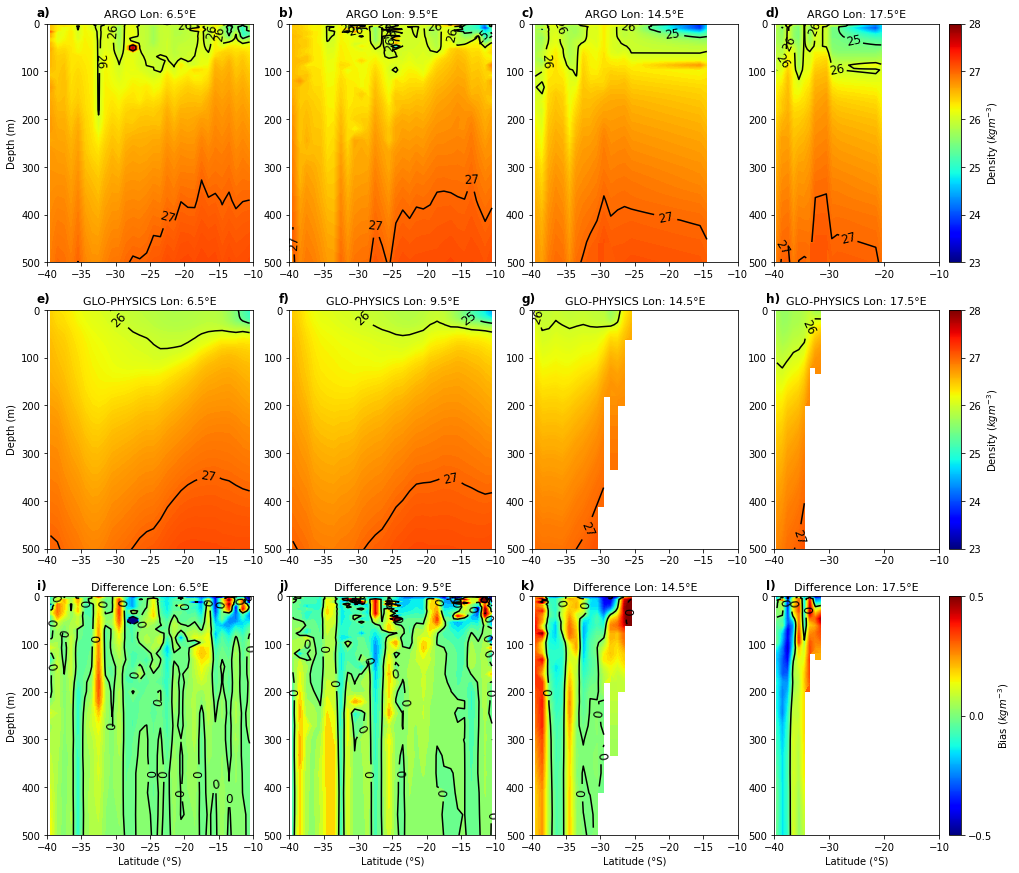

In [76]:
import string
vmins= [23]*8 + [-0.5]*4 #limites inferiores replicados
vmaxs= [28]*8 + [0.5]*4 #limites superiores replicados
levelsx=[[25.4,26,27]]*8 +[[-0.5,0,0.5]]*4 #niveles a mostrar en el colorbar
ticks= np.array([23,24,25,26,27,28]) #labels para el colorbar de datos
ticks_dif= np.array([-0.5,0,0.5]) # ticks para colorbar de diferencia
prof= np.arange(0,600,1) # profundidades argo
prof_M= reanal.depth.values # profundidades modelo
lista_prof_ARGO=[prof_M]*4;lista_prof_ARGOX=[prof_M]*4;lista_prof_M=[prof_M]*4
lista_profs = lista_prof_ARGO + lista_prof_M +lista_prof_ARGOX
xts1=X_t[0,:]; yt1=Y_t[:,0] # coordenadas
lista_yt_ARGO= [yt1]*4;lista_yt_ARGOX= [yt1]*4;lista_yt_M= [yt1]*4
lista_yts=lista_yt_ARGO + lista_yt_M + lista_yt_ARGOX # agregar las tres listas
w=0.17;h=0.15
meses=['ARGO Lon: 6.5°E','ARGO Lon: 9.5°E','ARGO Lon: 14.5°E','ARGO Lon: 17.5°E',
       'GLO-PHYSICS Lon: 6.5°E','GLO-PHYSICS Lon: 9.5°E','GLO-PHYSICS Lon: 14.5°E','GLO-PHYSICS Lon: 17.5°E',
       'Difference Lon: 6.5°E','Difference Lon: 9.5°E','Difference Lon: 14.5°E','Difference Lon: 17.5°E']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.83,w,h],[0.2,0.83,w,h],[0.4,0.83,w,h],[0.6,0.83,w,h],
        [0,0.65,w,h],[0.2,0.65,w,h],[0.4,0.65,w,h],[0.6,0.65,w,h],
        [0,0.47,w,h],[0.2,0.47,w,h],[0.4,0.47,w,h],[0.6,0.47,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
##############################################################################################
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(-0.05,1.03,string.ascii_lowercase[j]+')',fontsize=12, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=11)
  # para la barra de colores
  cbar=ax.pcolormesh(lista_yts[j],lista_profs[j],lista_final_D[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], shading='flat')
  # para generar los contornos suavizados
  ax.contourf(lista_yts[j],lista_profs[j],lista_final_D[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], levels=100)
  cs=ax.contour(lista_yts[j],lista_profs[j],lista_final_D[j], levels=levelsx[j],colors='k')
  plt.clabel(cs,inline=True, fmt='%1.0f',fontsize=12, colors='k')
  ax.set_ylim([0,500]);ax.set_xlim([-40,-10]);plt.margins(x=0)
  plt.gca().invert_yaxis()
  if j==0:ax.set_ylabel('Depth (m)')
  elif j==3:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Density ($kg m^{-3}$)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==4:ax.set_ylabel('Depth (m)')
  elif j==7:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Density ($kg m^{-3}$)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==8:ax.set_ylabel('Depth (m)');ax.set_xlabel('Latitude (°S)')
  elif j in [9,10]:ax.set_xlabel('Latitude (°S)')
  elif j==11: ax.set_xlabel('Latitude (°S)');cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks_dif);cbar1.set_label('Bias ($kg m^{-3}$)', rotation=90)
plt.tight_layout()

**Temperatura**

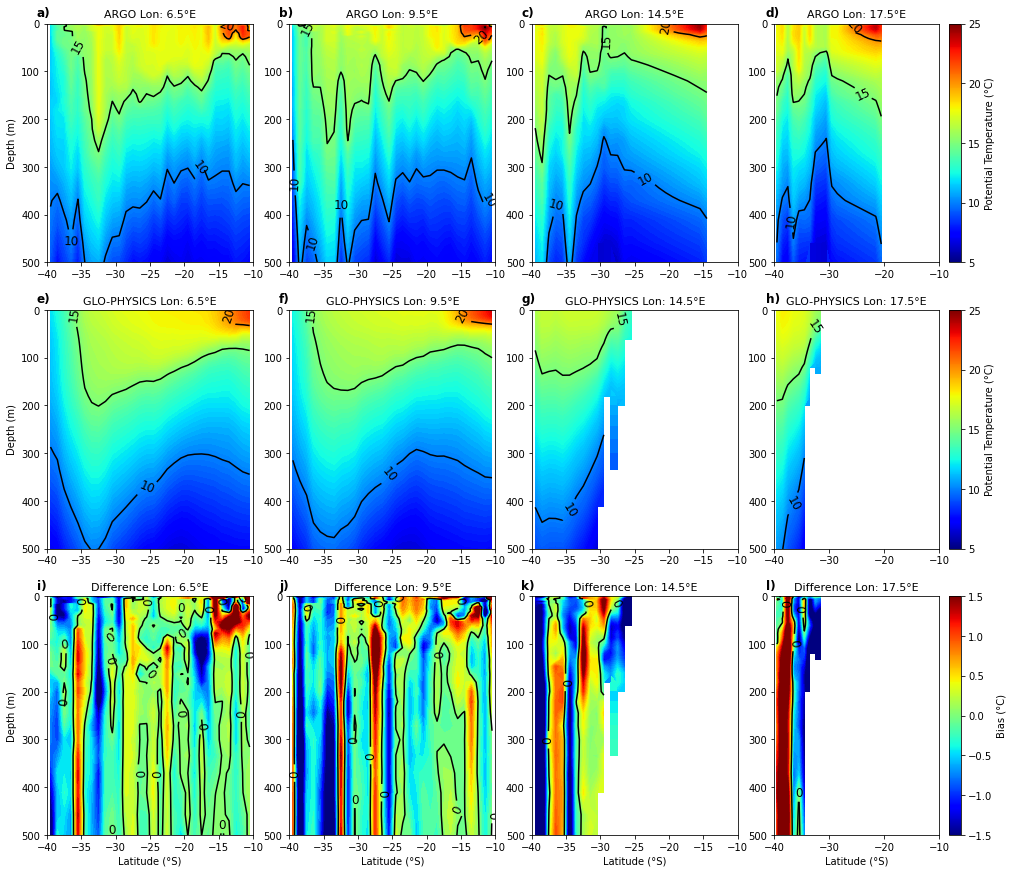

In [77]:
import string
vmins= [5]*8 + [-1.5]*4 #limites inferiores replicados
vmaxs= [25]*8 + [1.5]*4 #limites superiores replicados
levelsx=[[5,10,15,20,25]]*8 +[[0]]*4 #niveles a mostrar en el colorbar
ticks= np.array([5,10,15,20,25]) #labels para el colorbar de datos
ticks_dif= np.array([-1.5,-1,-0.5,0,0.5,1,1.5]) # ticks para colorbar de diferencia
prof= np.arange(0,600,1) # profundidades argo
prof_M= reanal.depth.values # profundidades modelo
lista_prof_ARGO=[prof_M]*4;lista_prof_ARGOX=[prof_M]*4;lista_prof_M=[prof_M]*4
lista_profs = lista_prof_ARGO + lista_prof_M +lista_prof_ARGOX
xts1=X_t[0,:]; yt1=Y_t[:,0] # coordenadas
lista_yt_ARGO= [yt1]*4;lista_yt_ARGOX= [yt1]*4;lista_yt_M= [yt1]*4
lista_yts=lista_yt_ARGO + lista_yt_M + lista_yt_ARGOX # agregar las tres listas
w=0.17;h=0.15
meses=['ARGO Lon: 6.5°E','ARGO Lon: 9.5°E','ARGO Lon: 14.5°E','ARGO Lon: 17.5°E',
       'GLO-PHYSICS Lon: 6.5°E','GLO-PHYSICS Lon: 9.5°E','GLO-PHYSICS Lon: 14.5°E','GLO-PHYSICS Lon: 17.5°E',
       'Difference Lon: 6.5°E','Difference Lon: 9.5°E','Difference Lon: 14.5°E','Difference Lon: 17.5°E']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.83,w,h],[0.2,0.83,w,h],[0.4,0.83,w,h],[0.6,0.83,w,h],
        [0,0.65,w,h],[0.2,0.65,w,h],[0.4,0.65,w,h],[0.6,0.65,w,h],
        [0,0.47,w,h],[0.2,0.47,w,h],[0.4,0.47,w,h],[0.6,0.47,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
##############################################################################################
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(-0.05,1.03,string.ascii_lowercase[j]+')',fontsize=12, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=11)
  # para la barra de colores
  cbar=ax.pcolormesh(lista_yts[j],lista_profs[j],lista_final_T[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], shading='flat')
  # para generar los contornos suavizados
  ax.contourf(lista_yts[j],lista_profs[j],lista_final_T[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], levels=100)
  cs=ax.contour(lista_yts[j],lista_profs[j],lista_final_T[j], levels=levelsx[j],colors='k')
  plt.clabel(cs,inline=True, fmt='%1.0f',fontsize=12, colors='k')
  ax.set_ylim([0,500]);ax.set_xlim([-40,-10]);plt.margins(x=0)
  plt.gca().invert_yaxis()
  if j==0:ax.set_ylabel('Depth (m)')
  elif j==3:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Potential Temperature (°C)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==4:ax.set_ylabel('Depth (m)')
  elif j==7:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Potential Temperature (°C)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==8:ax.set_ylabel('Depth (m)');ax.set_xlabel('Latitude (°S)')
  elif j in [9,10]:ax.set_xlabel('Latitude (°S)')
  elif j==11: ax.set_xlabel('Latitude (°S)');cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks_dif);cbar1.set_label('Bias (°C)', rotation=90)
plt.tight_layout()

**Salinidad**

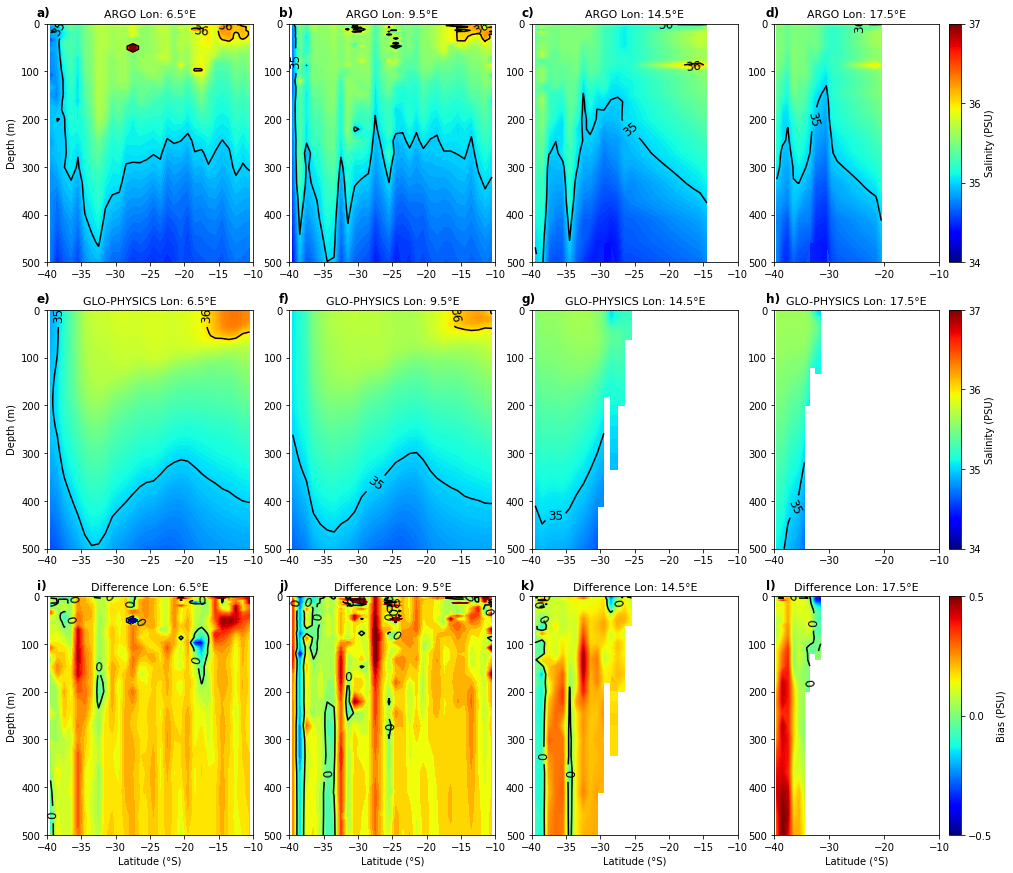

In [78]:
import string
vmins= [34]*8 + [-0.5]*4 #limites inferiores replicados
vmaxs= [37]*8 + [0.5]*4 #limites superiores replicados
levelsx=[[33,34,35,36]]*8 +[[0]]*4 #niveles a mostrar en el colorbar
ticks= np.array([34,35,36,37]) #labels para el colorbar de datos
ticks_dif= np.array([-0.5,0,0.5]) # ticks para colorbar de diferencia
prof= np.arange(0,600,1) # profundidades argo
prof_M= reanal.depth.values # profundidades modelo
lista_prof_ARGO=[prof_M]*4;lista_prof_ARGOX=[prof_M]*4;lista_prof_M=[prof_M]*4
lista_profs = lista_prof_ARGO + lista_prof_M +lista_prof_ARGOX
xts1=X_t[0,:]; yt1=Y_t[:,0] # coordenadas
lista_yt_ARGO= [yt1]*4;lista_yt_ARGOX= [yt1]*4;lista_yt_M= [yt1]*4
lista_yts=lista_yt_ARGO + lista_yt_M + lista_yt_ARGOX # agregar las tres listas
w=0.17;h=0.15
meses=['ARGO Lon: 6.5°E','ARGO Lon: 9.5°E','ARGO Lon: 14.5°E','ARGO Lon: 17.5°E',
       'GLO-PHYSICS Lon: 6.5°E','GLO-PHYSICS Lon: 9.5°E','GLO-PHYSICS Lon: 14.5°E','GLO-PHYSICS Lon: 17.5°E',
       'Difference Lon: 6.5°E','Difference Lon: 9.5°E','Difference Lon: 14.5°E','Difference Lon: 17.5°E']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.83,w,h],[0.2,0.83,w,h],[0.4,0.83,w,h],[0.6,0.83,w,h],
        [0,0.65,w,h],[0.2,0.65,w,h],[0.4,0.65,w,h],[0.6,0.65,w,h],
        [0,0.47,w,h],[0.2,0.47,w,h],[0.4,0.47,w,h],[0.6,0.47,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
##############################################################################################
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(-0.05,1.03,string.ascii_lowercase[j]+')',fontsize=12, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=11)
  # para la barra de colores
  cbar=ax.pcolormesh(lista_yts[j],lista_profs[j],lista_final_S[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], shading='flat')
  # para generar los contornos suavizados
  ax.contourf(lista_yts[j],lista_profs[j],lista_final_S[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], levels=100)
  cs=ax.contour(lista_yts[j],lista_profs[j],lista_final_S[j], levels=levelsx[j],colors='k')
  plt.clabel(cs,inline=True, fmt='%1.0f',fontsize=12, colors='k')
  ax.set_ylim([0,500]);ax.set_xlim([-40,-10]);plt.margins(x=0)
  plt.gca().invert_yaxis()
  if j==0:ax.set_ylabel('Depth (m)')
  elif j==3:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Salinity (PSU)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==4:ax.set_ylabel('Depth (m)')
  elif j==7:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Salinity (PSU)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==8:ax.set_ylabel('Depth (m)');ax.set_xlabel('Latitude (°S)')
  elif j in [9,10]:ax.set_xlabel('Latitude (°S)')
  elif j==11: ax.set_xlabel('Latitude (°S)');cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks_dif);cbar1.set_label('Bias (PSU)', rotation=90)
plt.tight_layout()

### Longitudinales

In [79]:
lista_ARGO_LAT_D=[]; lista_ARGO_LAT_S=[]; lista_ARGO_LAT_T=[]
lista_MODEL_LAT_D=[];lista_MODEL_LAT_S=[];lista_MODEL_LAT_T=[]
lista_ARGOX_LAT_D=[]; lista_ARGOX_LAT_S=[]; lista_ARGOX_LAT_T=[]
# datos_D, datos_S, datos_T = datos reales de argo con 600 niveles
lat_Y= [-11.5,-20.5,-29.5,-38.5]
for i in range(4):
  tran_lat_d=A_final.sel(lat=lat_Y[i]).D.values;tran_lat_s=A_final.sel(lat=lat_Y[i]).S.values;tran_lat_t=A_final.sel(lat=lat_Y[i]).T.values;
  tran_lat_M_d= M_final.sel(lat=lat_Y[i]).D.values
  tran_lat_M_s= M_final.sel(lat=lat_Y[i]).S.values
  tran_lat_M_t= M_final.sel(lat=lat_Y[i]).T.values
  tran_lat_dx=A_final.sel(lat=lat_Y[i]).D.values;tran_lat_sx=A_final.sel(lat=lat_Y[i]).S.values;tran_lat_tx=A_final.sel(lat=lat_Y[i]).T.values;
  lista_ARGO_LAT_D.append(tran_lat_d);lista_MODEL_LAT_D.append(tran_lat_M_d);lista_ARGOX_LAT_D.append((M_final.sel(lat=lat_Y[i]).D-A_final.sel(lat=lat_Y[i]).D).values)
  lista_ARGO_LAT_S.append(tran_lat_s);lista_MODEL_LAT_S.append(tran_lat_M_s);lista_ARGOX_LAT_S.append((M_final.sel(lat=lat_Y[i]).S-A_final.sel(lat=lat_Y[i]).S).values)
  lista_ARGO_LAT_T.append(tran_lat_t);lista_MODEL_LAT_T.append(tran_lat_M_t);lista_ARGOX_LAT_T.append((M_final.sel(lat=lat_Y[i]).T-A_final.sel(lat=lat_Y[i]).T).values)
lista_final_D= lista_ARGO_LAT_D+lista_MODEL_LAT_D + lista_ARGOX_LAT_D# acoplar las tres listas 
lista_final_D[0][lista_final_D[0]>27.10728928778205]= 27.10728928778205-0.2
lista_final_S= lista_ARGO_LAT_S+lista_MODEL_LAT_S+ lista_ARGOX_LAT_S # acoplar las tres listas 
lista_final_S[0][lista_final_S[0]>36]= 36-0.4
lista_final_T= lista_ARGO_LAT_T+lista_MODEL_LAT_T + lista_ARGOX_LAT_T# acoplar las tres listas 
print(len(lista_final_D),len(lista_final_T),len(lista_final_S))

12 12 12


**Densidad**

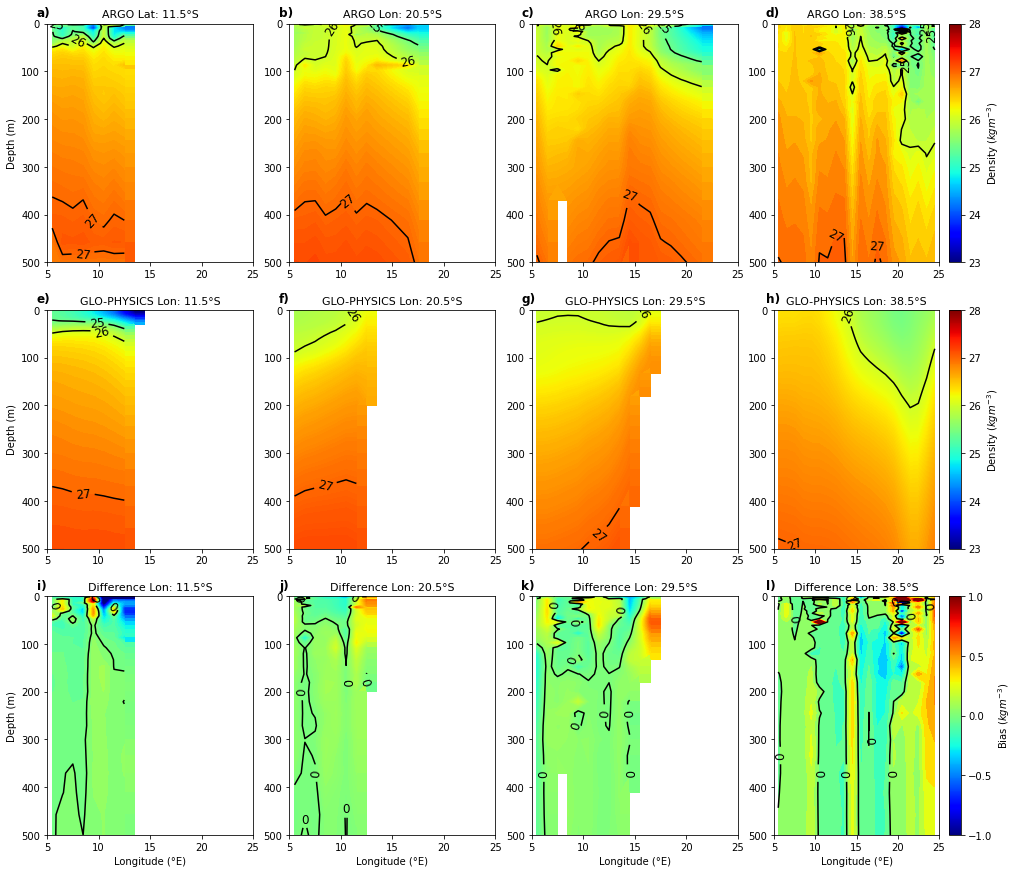

In [80]:
import string
vmins= [23]*8 + [-1]*4 #limites inferiores replicados
vmaxs= [28]*8 + [1]*4 #limites superiores replicados
levelsx=[[25.4,26,27]]*8 +[[0]]*4 #niveles a mostrar en el colorbar
ticks= np.array([23,24,25,26,27,28]) #labels para el colorbar de datos
ticks_dif= np.array([-1,-0.5,0,0.5,1]) # ticks para colorbar de diferencia
prof= np.arange(0,600,1) # profundidades argo
prof_M= reanal.depth.values # profundidades modelo
lista_prof_ARGO=[prof_M]*4;lista_prof_ARGOX=[prof_M]*4;lista_prof_M=[prof_M]*4
lista_profs = lista_prof_ARGO + lista_prof_M +lista_prof_ARGOX
xts1=X_t[0,:]; yt1=Y_t[:,0] # coordenadas
lista_yt_ARGO= [xts1]*4;lista_yt_ARGOX= [xts1]*4;lista_yt_M= [xts1]*4
lista_yts=lista_yt_ARGO + lista_yt_M + lista_yt_ARGOX # agregar las tres listas
w=0.17;h=0.15
meses=['ARGO Lat: 11.5°S','ARGO Lon: 20.5°S','ARGO Lon: 29.5°S','ARGO Lon: 38.5°S',
       'GLO-PHYSICS Lon: 11.5°S','GLO-PHYSICS Lon: 20.5°S','GLO-PHYSICS Lon: 29.5°S','GLO-PHYSICS Lon: 38.5°S',
       'Difference Lon: 11.5°S','Difference Lon: 20.5°S','Difference Lon: 29.5°S','Difference Lon: 38.5°S']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.83,w,h],[0.2,0.83,w,h],[0.4,0.83,w,h],[0.6,0.83,w,h],
        [0,0.65,w,h],[0.2,0.65,w,h],[0.4,0.65,w,h],[0.6,0.65,w,h],
        [0,0.47,w,h],[0.2,0.47,w,h],[0.4,0.47,w,h],[0.6,0.47,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
##############################################################################################
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(-0.05,1.03,string.ascii_lowercase[j]+')',fontsize=12, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=11)
  # para la barra de colores
  cbar=ax.pcolormesh(lista_yts[j],lista_profs[j],lista_final_D[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], shading='flat')
  # para generar los contornos suavizados
  ax.contourf(lista_yts[j],lista_profs[j],lista_final_D[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], levels=100)
  cs=ax.contour(lista_yts[j],lista_profs[j],lista_final_D[j], levels=levelsx[j],colors='k')
  plt.clabel(cs,inline=True, fmt='%1.0f',fontsize=12, colors='k')
  ax.set_ylim([0,500]);ax.set_xlim([5,25]);plt.margins(x=0)
  plt.gca().invert_yaxis()
  if j==0:ax.set_ylabel('Depth (m)')
  elif j==3:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Density ($kg m^{-3}$)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==4:ax.set_ylabel('Depth (m)')
  elif j==7:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Density ($kg m^{-3}$)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==8:ax.set_ylabel('Depth (m)');ax.set_xlabel('Longitude (°E)')
  elif j in [9,10]:ax.set_xlabel('Longitude (°E)')
  elif j==11: ax.set_xlabel('Longitude (°E)');cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks_dif);cbar1.set_label('Bias ($kg m^{-3}$)', rotation=90)
plt.tight_layout()

**Temperatura**

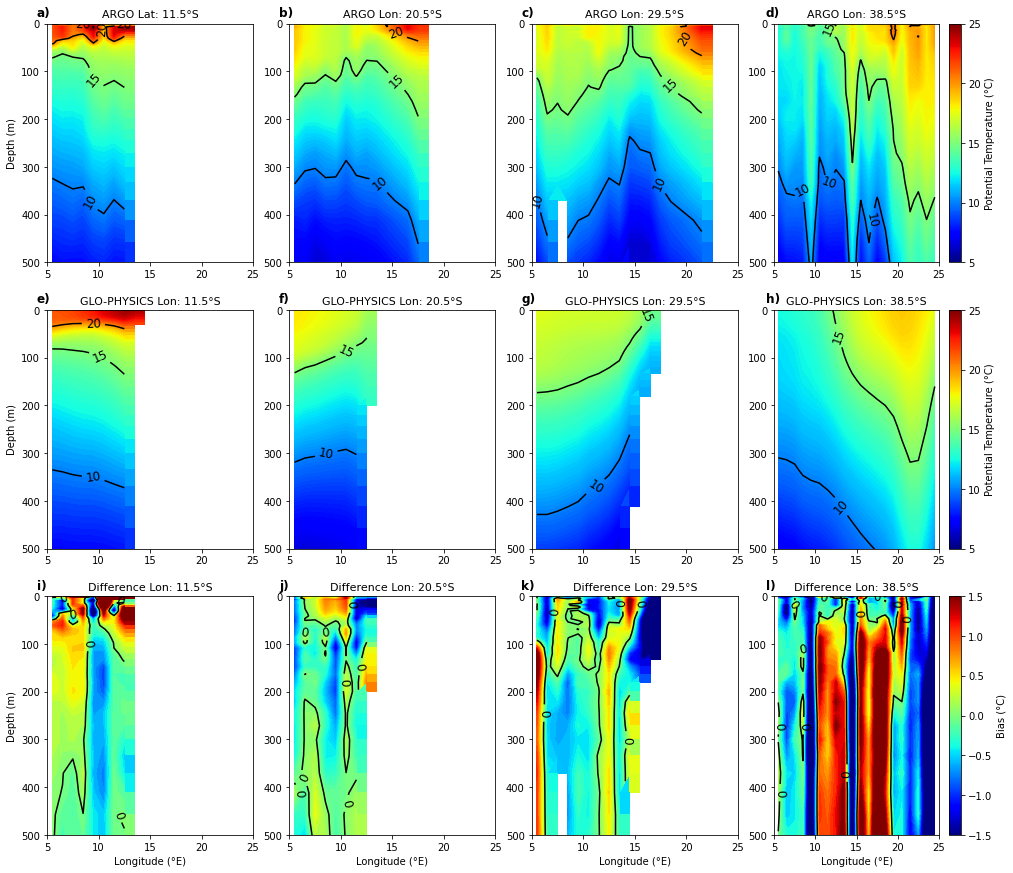

In [81]:
import string
vmins= [5]*8 + [-1.5]*4 #limites inferiores replicados
vmaxs= [25]*8 + [1.5]*4 #limites superiores replicados
levelsx=[[5,10,15,20,25]]*8 +[[0]]*4 #niveles a mostrar en el colorbar
ticks= np.array([5,10,15,20,25]) #labels para el colorbar de datos
ticks_dif= np.array([-1.5,-1,-0.5,0,0.5,1,1.5]) # ticks para colorbar de diferencia
prof= np.arange(0,600,1) # profundidades argo
prof_M= reanal.depth.values # profundidades modelo
lista_prof_ARGO=[prof_M]*4;lista_prof_ARGOX=[prof_M]*4;lista_prof_M=[prof_M]*4
lista_profs = lista_prof_ARGO + lista_prof_M +lista_prof_ARGOX
xts1=X_t[0,:]; yt1=Y_t[:,0] # coordenadas
lista_yt_ARGO= [xts1]*4;lista_yt_ARGOX= [xts1]*4;lista_yt_M= [xts1]*4
lista_yts=lista_yt_ARGO + lista_yt_M + lista_yt_ARGOX # agregar las tres listas
w=0.17;h=0.15
meses=['ARGO Lat: 11.5°S','ARGO Lon: 20.5°S','ARGO Lon: 29.5°S','ARGO Lon: 38.5°S',
       'GLO-PHYSICS Lon: 11.5°S','GLO-PHYSICS Lon: 20.5°S','GLO-PHYSICS Lon: 29.5°S','GLO-PHYSICS Lon: 38.5°S',
       'Difference Lon: 11.5°S','Difference Lon: 20.5°S','Difference Lon: 29.5°S','Difference Lon: 38.5°S']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.83,w,h],[0.2,0.83,w,h],[0.4,0.83,w,h],[0.6,0.83,w,h],
        [0,0.65,w,h],[0.2,0.65,w,h],[0.4,0.65,w,h],[0.6,0.65,w,h],
        [0,0.47,w,h],[0.2,0.47,w,h],[0.4,0.47,w,h],[0.6,0.47,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
##############################################################################################
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(-0.05,1.03,string.ascii_lowercase[j]+')',fontsize=12, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=11)
  # para la barra de colores
  cbar=ax.pcolormesh(lista_yts[j],lista_profs[j],lista_final_T[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], shading='flat')
  # para generar los contornos suavizados
  ax.contourf(lista_yts[j],lista_profs[j],lista_final_T[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], levels=100)
  cs=ax.contour(lista_yts[j],lista_profs[j],lista_final_T[j], levels=levelsx[j],colors='k')
  plt.clabel(cs,inline=True, fmt='%1.0f',fontsize=12, colors='k')
  ax.set_ylim([0,500]);ax.set_xlim([5,25]);plt.margins(x=0)
  plt.gca().invert_yaxis()
  if j==0:ax.set_ylabel('Depth (m)')
  elif j==3:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Potential Temperature (°C)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==4:ax.set_ylabel('Depth (m)')
  elif j==7:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Potential Temperature (°C)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==8:ax.set_ylabel('Depth (m)');ax.set_xlabel('Longitude (°E)')
  elif j in [9,10]:ax.set_xlabel('Longitude (°E)')
  elif j==11: ax.set_xlabel('Longitude (°E)');cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks_dif);cbar1.set_label('Bias (°C)', rotation=90)
plt.tight_layout()

**Salinidad**

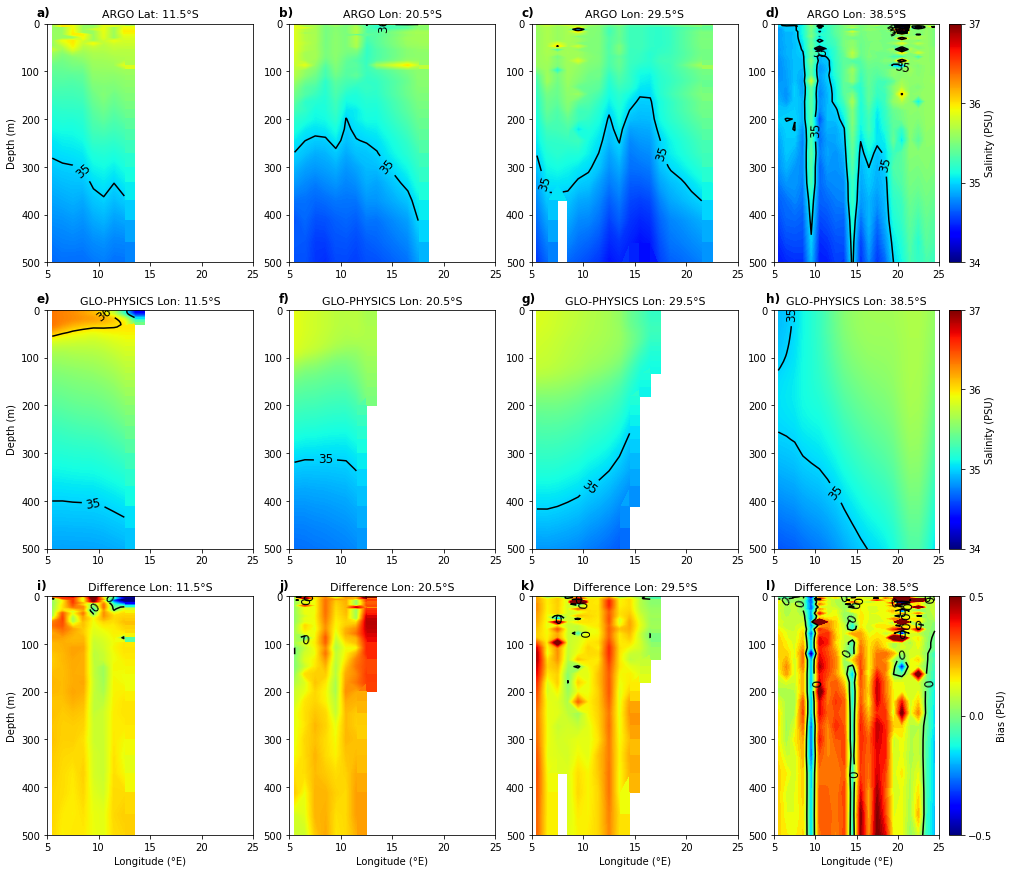

In [83]:
import string
vmins= [34]*8 + [-0.5]*4 #limites inferiores replicados
vmaxs= [37]*8 + [0.5]*4 #limites superiores replicados
levelsx=[[33,34,35,36]]*8 +[[0]]*4 #niveles a mostrar en el colorbar
ticks= np.array([34,35,36,37]) #labels para el colorbar de datos
ticks_dif= np.array([-0.5,0,0.5]) # ticks para colorbar de diferencia
prof= np.arange(0,600,1) # profundidades argo
prof_M= reanal.depth.values # profundidades modelo
lista_prof_ARGO=[prof_M]*4;lista_prof_ARGOX=[prof_M]*4;lista_prof_M=[prof_M]*4
lista_profs = lista_prof_ARGO + lista_prof_M +lista_prof_ARGOX
xts1=X_t[0,:]; yt1=Y_t[:,0] # coordenadas
lista_yt_ARGO= [xts1]*4;lista_yt_ARGOX= [xts1]*4;lista_yt_M= [xts1]*4
lista_yts=lista_yt_ARGO + lista_yt_M + lista_yt_ARGOX # agregar las tres listas
w=0.17;h=0.15
meses=['ARGO Lat: 11.5°S','ARGO Lon: 20.5°S','ARGO Lon: 29.5°S','ARGO Lon: 38.5°S',
       'GLO-PHYSICS Lon: 11.5°S','GLO-PHYSICS Lon: 20.5°S','GLO-PHYSICS Lon: 29.5°S','GLO-PHYSICS Lon: 38.5°S',
       'Difference Lon: 11.5°S','Difference Lon: 20.5°S','Difference Lon: 29.5°S','Difference Lon: 38.5°S']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.83,w,h],[0.2,0.83,w,h],[0.4,0.83,w,h],[0.6,0.83,w,h],
        [0,0.65,w,h],[0.2,0.65,w,h],[0.4,0.65,w,h],[0.6,0.65,w,h],
        [0,0.47,w,h],[0.2,0.47,w,h],[0.4,0.47,w,h],[0.6,0.47,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
##############################################################################################
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(-0.05,1.03,string.ascii_lowercase[j]+')',fontsize=12, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=11)
  # para la barra de colores
  cbar=ax.pcolormesh(lista_yts[j],lista_profs[j],lista_final_S[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], shading='flat')
  # para generar los contornos suavizados
  ax.contourf(lista_yts[j],lista_profs[j],lista_final_S[j],cmap='jet',vmin=vmins[j], vmax=vmaxs[j], levels=500)
  cs=ax.contour(lista_yts[j],lista_profs[j],lista_final_S[j], levels=levelsx[j],colors='k')
  plt.clabel(cs,inline=True, fmt='%1.0f',fontsize=12, colors='k')
  ax.set_ylim([0,500]);ax.set_xlim([5,25]);plt.margins(x=0)
  plt.gca().invert_yaxis()
  if j==0:ax.set_ylabel('Depth (m)')
  elif j==3:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Salinity (PSU)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==4:ax.set_ylabel('Depth (m)')
  elif j==7:cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks);cbar1.set_label('Salinity (PSU)', rotation=90);#ax.set_xlabel('Latitude (°S)')
  elif j==8:ax.set_ylabel('Depth (m)');ax.set_xlabel('Longitude (°E)')
  elif j in [9,10]:ax.set_xlabel('Longitude (°E)')
  elif j==11: ax.set_xlabel('Longitude (°E)');cbar1=plt.colorbar(cbar, ax=ax, ticks=ticks_dif);cbar1.set_label('Bias (PSU)', rotation=90)
plt.tight_layout()

### Diagramas de Taylor

In [84]:
STD_D=[];CORRCOEF_D=[];RMSE_D=[]
STD_S=[];CORRCOEF_S=[];RMSE_S=[]
STD_T=[];CORRCOEF_T=[];RMSE_T=[]
for i in range(40):
  ###### DEN ######
  modelo= np.flipud(M_final.D.values[i,:,:]).flatten()
  satelite= A_final.D.values[i,:,:].flatten() # aplicar media en dimension tiempo
  IND = np.invert(np.isnan(satelite) | np.isnan(modelo)) # Sacar los indices que comparten en el espacio
  P = modelo[IND] # Modelo
  A = satelite[IND] # Referencia Era
  DD = np.ma.std(A.ravel()) # Desviacion estandar Referencia
  P = P/DD # Normalizacion por Std referencia
  A = A/DD 
  STD_D.append(np.ma.std(P.ravel()))
  CORRCOEF_D.append(np.ma.corrcoef(P.ravel(), A.ravel()).data[0,1])
  RMSE_D.append(np.sqrt(np.mean((P-A)**2)))
  ###### SAL ######
  modelo= np.flipud(M_final.S.values[i,:,:]).flatten()
  satelite= A_final.S.values[i,:,:].flatten() # aplicar media en dimension tiempo
  IND = np.invert(np.isnan(satelite) | np.isnan(modelo)) # Sacar los indices que comparten en el espacio
  P = modelo[IND] # Modelo
  A = satelite[IND] # Referencia Era
  DD = np.ma.std(A.ravel()) # Desviacion estandar Referencia
  P = P/DD # Normalizacion por Std referencia
  A = A/DD 
  STD_S.append(np.ma.std(P.ravel()))
  CORRCOEF_S.append(np.ma.corrcoef(P.ravel(), A.ravel()).data[0,1])
  RMSE_S.append(np.sqrt(np.mean((P-A)**2)))
  ###### TEMP ######
  modelo= np.flipud(M_final.T.values[i,:,:]).flatten()
  satelite= A_final.T.values[i,:,:].flatten() # aplicar media en dimension tiempo
  IND = np.invert(np.isnan(satelite) | np.isnan(modelo)) # Sacar los indices que comparten en el espacio
  P = modelo[IND] # Modelo
  A = satelite[IND] # Referencia Era
  DD = np.ma.std(A.ravel()) # Desviacion estandar Referencia
  P = P/DD # Normalizacion por Std referencia
  A = A/DD 
  STD_T.append(np.ma.std(P.ravel()))
  CORRCOEF_T.append(np.ma.corrcoef(P.ravel(), A.ravel()).data[0,1])
  RMSE_T.append(np.sqrt(np.mean((P-A)**2)))

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM


Text(1.0, 0.21, 'RMSE')

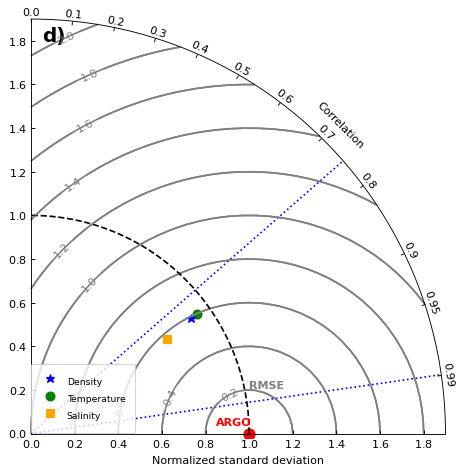

In [85]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/'
from taylorDiagram_mod import TaylorDiagram as TaDiM
import numpy as NP
figID_Taylor = plt.figure(num=11, dpi=80)
figID_Taylor.set_size_inches(7., 7.)
TayDia = TaDiM(1, fig=figID_Taylor, rect=111, srange=(0., 1.9), label='ARGO')
pp=[]
ttt=TayDia.add_sample(np.mean(STD_D), np.mean(CORRCOEF_D)+0.1, marker="*", linestyle='None', color='blue', ms=8);pp.append(ttt)
ttt=TayDia.add_sample(np.mean(STD_T), np.mean(CORRCOEF_T), marker="o", linestyle='None', color='green', ms=8);pp.append(ttt)
ttt=TayDia.add_sample(np.mean(STD_S), np.mean(CORRCOEF_S)+0.13, marker="s", linestyle='None', color='orange', ms=8);pp.append(ttt)
contours = TayDia.add_contours(levels=10, colors='0.5')
contours = TayDia.add_contours(levels=10, colors='0.5')
plt.plot([0,NP.sqrt(1.9**2 -1.25**2)],[0,1.25], color='blue',linestyle=':') # correlacion 0.75
plt.plot([0,NP.sqrt(1.9**2 -0.27**2)],[0,0.27], color='blue',linestyle=':') # correlacion 0.99
TayDia.ax.clabel(contours, inline=1, fontsize=10, fmt='%.1f')
plt.legend(pp, ['Density','Temperature','Salinity'],  prop=dict(size='small'), loc='lower left', borderpad=1.0, ncol=1,handleheight=2.4, labelspacing=0.05) # numpoints=1,
plt.text(0.85,0.04,'ARGO', color='red',weight='bold')
#plt.text(0.85,0.35,'MMM', color='red',weight='bold')
plt.text(0.05,1.8,'d)', color='black',weight='bold', fontsize=18)
plt.text(1.00,0.21,'RMSE', color='gray',weight='bold')